# CLIENT PROJECT

   #                Project Name: Bank GoodCredit | Category: Banking - Risk           

# Business Case:
   Bank GoodCredit aims to predict credit scores for its current credit card customers, which will indicate each customer’s creditworthiness and assist the bank in mitigating credit default risks. The target variable, `Bad_label`, categorizes customers as `0` for those with a good credit history and `1` for those with a bad credit history (specifically, falling into the 30 days past due (30 DPD) or worse bucket). The benchmark model achieves a Gini coefficient of 37.9%, reflecting its performance in classifying customers based on credit risk.

# Project goal :
I built a predictive model using the provided data.
1. `Data Exploration Insights:`
   Upon exploring the data, several insights were uncovered regarding the variables and their relationships. After thorough analysis, decisions were made regarding data preprocessing, feature selection, and handling of missing values to ensure the quality and relevance of the data for modeling purposes.

2. `Feature Matrix - List of Features Selected with Gain:`
   The feature matrix includes a selection of variables that exhibit high information gain or importance for predicting the `Bad_label` target variable. These features were chosen based on their ability to significantly contribute to the model's predictive power in determining creditworthiness.

3. `Model Evaluation - Gini and Rank Ordering:`
   The model was evaluated using the Gini coefficient to measure its discriminatory power in distinguishing between customers with good and bad credit histories. Additionally, the rank ordering metric was employed to assess the model's ability to accurately rank customers based on their predicted probabilities of default, thereby aiding in risk management decisions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("client_sample_data.csv")

In [3]:
data.drop("Unnamed: 0",axis=1,inplace=True) # remove the unwanted columns an data

In [4]:
data

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0       26-Oct-15        20219  10-Sep-15          6            1  20-May-15   
1       27-Aug-15         8497  13-Aug-15          4            1  29-Jun-12   
2       17-Jul-15         7705  13-Jul-15          0            1  26-Dec-13   
3       16-Dec-15        13921  19-Nov-15          6            1  19-Sep-13   
4       16-Sep-15         9182  10-Sep-15         10            1  29-Apr-05   
...           ...          ...        ...        ...          ...        ...   
460442  01-Jun-15         1158  11-May-15         10            1  04-Jul-12   
460443  10-Jul-15         2830  29-Jun-15         10            1  20-Dec-13   
460444  18-Jun-15         1834  11-May-15          5            1  07-Jan-08   
460445  30-Sep-15        19123  17-Sep-15         10            1  13-Nov-10   
460446  03-Sep-15         3778  31-Aug-15         10            1  31-Dec-12   

       last_paymt_dt  closed_dt reporting_dt  high_credit_amt  ...  \
0          02-Jul-15        NaN    31-Jul-15          29500.0  ...   
1          04-Sep-12  04-Sep-12    05-Jun-14         120000.0  ...   
2          15-May-15        NaN    31-May-15          66595.0  ...   
3          02-Jan-15        NaN    31-Jul-15          30900.0  ...   
4                NaN  16-Jun-09    31-Jan-11          18700.0  ...   
...              ...        ...          ...              ...  ...   
460442     23-Mar-15        NaN    31-Mar-15         140849.0  ...   
460443     13-Apr-15        NaN    08-May-15          23124.0  ...   
460444     08-Jan-10  08-Jan-10    31-Jan-10          50000.0  ...   
460445     06-Jun-15        NaN    18-Aug-15          10864.0  ...   
460446     14-Jul-15        NaN    31-Jul-15          30074.0  ...   

        feature_74  feature_75 feature_76  feature_77 feature_78 feature_79  \
0              NaN  0000-00-00        0.0  97176XXXXX        1.0          N   
1              NaN  0000-00-00        0.0  98739XXXXX        1.0          N   
2              NaN  0000-00-00        0.0  99662XXXXX        1.0          N   
3              NaN  0000-00-00        0.0       XXXXX        1.0          N   
4              NaN  0000-00-00        0.0  94030XXXXX        1.0          N   
...            ...         ...        ...         ...        ...        ...   
460442         NaN  0000-00-00        0.0  93921XXXXX        1.0          N   
460443         NaN  0000-00-00        0.0       XXXXX        1.0          N   
460444         NaN  0000-00-00        0.0  82851XXXXX        1.0          N   
460445         NaN  0000-00-00        0.0  98992XXXXX        1.0          N   
460446         NaN  0000-00-00        0.0       XXXXX        1.0          N   

        Bad_label  enquiry_dt enq_purpose  enq_amt  
0               0   20-Jul-15           5        1  
1               0   23-Dec-14          10     1000  
2               0   17-Jun-15           5   149000  
3               0   18-Nov-13          13    43500  
4               0   09-Aug-07           0    60000  
...           ...         ...         ...      ...  
460442          0   24-Jun-14          10    10000  
460443          0   24-Apr-15          10    10000  
460444          0   15-Jan-11           5   275000  
460445          0   01-Oct-10          10     1000  
460446          0   18-Aug-09           6    50000  

[460447 rows x 105 columns]

In [5]:
pd.set_option("display.max_columns",None) # display the all columns on data

# Basic checks on data

In [6]:
data.head(10)

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0  26-Oct-15        20219  10-Sep-15          6            1  20-May-15   
1  27-Aug-15         8497  13-Aug-15          4            1  29-Jun-12   
2  17-Jul-15         7705  13-Jul-15          0            1  26-Dec-13   
3  16-Dec-15        13921  19-Nov-15          6            1  19-Sep-13   
4  16-Sep-15         9182  10-Sep-15         10            1  29-Apr-05   
5  15-Sep-15         9148  31-Aug-15         10            1  26-Jul-13   
6  04-Jun-15         6713  01-Jun-15          7            1  18-Jan-13   
7  13-Aug-15        17049  09-Jul-15          5            1  07-Apr-14   
8  08-Jul-15         2747  22-Jun-15          2            3  18-Feb-08   
9  26-Sep-15         9717  31-Aug-15          2            1  19-Feb-13   

  last_paymt_dt  closed_dt reporting_dt  high_credit_amt  cur_balance_amt  \
0     02-Jul-15        NaN    31-Jul-15          29500.0            17700   
1     04-Sep-12  04-Sep-12    05-Jun-14         120000.0                0   
2     15-May-15        NaN    31-May-15          66595.0             4885   
3     02-Jan-15        NaN    31-Jul-15          30900.0                0   
4           NaN  16-Jun-09    31-Jan-11          18700.0                0   
5     14-May-15        NaN    08-Jun-15           4015.0                1   
6           NaN  26-Aug-13    31-Aug-13          34800.0                0   
7     01-May-15        NaN    31-May-15         300000.0           236032   
8     01-Feb-13  04-Feb-13    30-Sep-13        3543256.0                0   
9           NaN        NaN    31-Jul-15         721000.0           662873   

   amt_past_due                                    paymenthistory1  \
0           NaN                                    """000000000"""   
1           NaN                                 """000STDSTDSTD"""   
2           NaN  """STDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDS...   
3           NaN  """000XXXXXXXXXXXX0000000000000000000000000000...   
4           NaN                                 """000XXXXXX000"""   
5           NaN  """000000000000000000000000000000000000XXX0000...   
6           NaN                        """000STDSTDSTDSTDSTDSTD"""   
7           NaN   """000000000000000000000000000000000000000000"""   
8           NaN  """0000000000000000000000000000000000000000000...   
9           NaN  """STDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDS...   

                                     paymenthistory2 paymt_str_dt  \
0                                                NaN    01-Jul-15   
1                                                NaN    01-Sep-12   
2                                                NaN    01-May-15   
3                              """000000027000000"""    01-Jul-15   
4                                                NaN    01-Jun-09   
5                                    """000000000"""    01-Jun-15   
6                                                NaN    01-Aug-13   
7                                                NaN    01-May-15   
8  """0000000000000000000000000000000000000000000...    01-Feb-13   
9         """STDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTD"""    01-Jul-15   

  paymt_end_dt  creditlimit  cashlimit rateofinterest  paymentfrequency  \
0    01-May-15          NaN        NaN            NaN               NaN   
1    01-Jun-12          NaN        NaN            NaN               NaN   
2    01-Dec-13          NaN        NaN          10.15               NaN   
3    01-Sep-13          NaN        NaN            NaN               NaN   
4    01-Mar-09          NaN        NaN            NaN               NaN   
5    01-Oct-13          NaN        NaN            NaN               NaN   
6    01-Feb-13          NaN        NaN            NaN               NaN   
7    01-Apr-14          NaN        NaN            NaN               NaN   
8    01-Mar-10          NaN        NaN            NaN               NaN   
9    01-Feb-13          NaN        NaN          

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460447 entries, 0 to 460446
Columns: 105 entries, dt_opened to enq_amt
dtypes: float64(39), int64(7), object(59)
memory usage: 368.9+ MB


In [8]:
data_null_percent = data.isnull().sum()/len(data)*100 # calculate the null value percentage an data

In [9]:
data_null_percent.sort_values(ascending=False).head(50)# sorting the null values percentage in ascending order

feature_61             99.945705
feature_18             99.895102
feature_10             99.888804
feature_74             99.851883
amt_past_due           99.509173
feature_49             99.463130
feature_9              94.429109
feature_8              94.429109
feature_17             93.902664
feature_57             91.554946
feature_73             89.312125
rateofinterest         87.204608
cashlimit              83.324248
actualpaymentamount    80.375592
creditlimit            75.756602
feature_48             72.346437
paymentfrequency       66.712781
feature_13             61.690271
paymenthistory2        54.716395
closed_dt              52.631899
feature_45             52.282239
feature_53             45.348759
feature_51             45.129407
feature_14             33.939194
feature_36             30.069693
feature_37             30.069693
feature_38             30.069693
feature_27             15.594846
last_paymt_dt          13.843287
feature_3              10.441593
feature_2 

In [10]:
drop_column=["feature_61","feature_18","feature_10","feature_74","amt_past_due","feature_49","feature_9","feature_8","feature_17","feature_57",
             "feature_73","rateofinterest","cashlimit","feature_48","actualpaymentamount"] 

In [11]:
data.drop(drop_column,axis=1,inplace=True) #drop the above 70% of null values an data

In [12]:
data.isnull().sum().sort_values(ascending=False).head(50) 

creditlimit         348819
paymentfrequency    307177
feature_13          284051
paymenthistory2     251940
closed_dt           242342
feature_45          240732
feature_53          208807
feature_51          207797
feature_14          156272
feature_36          138455
feature_37          138455
feature_38          138455
feature_27           71806
last_paymt_dt        63741
feature_2            48078
feature_3            48078
high_credit_amt      25026
feature_24           14146
feature_46            2446
opened_dt              962
feature_16             600
feature_15             370
feature_39             288
feature_50             288
feature_42             288
feature_71             288
feature_43             288
feature_44             288
feature_41             288
feature_40             288
feature_54             288
feature_52             288
feature_34             288
feature_55             288
feature_56             288
feature_58             288
feature_59             288
f

In [13]:
len(data.isnull().sum())

90

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460447 entries, 0 to 460446
Data columns (total 90 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   dt_opened         460447 non-null  object 
 1   customer_no       460447 non-null  int64  
 2   upload_dt         460447 non-null  object 
 3   acct_type         460447 non-null  int64  
 4   owner_indic       460447 non-null  int64  
 5   opened_dt         459485 non-null  object 
 6   last_paymt_dt     396706 non-null  object 
 7   closed_dt         218105 non-null  object 
 8   reporting_dt      460447 non-null  object 
 9   high_credit_amt   435421 non-null  float64
 10  cur_balance_amt   460447 non-null  int64  
 11  paymenthistory1   460447 non-null  object 
 12  paymenthistory2   208507 non-null  object 
 13  paymt_str_dt      460441 non-null  object 
 14  paymt_end_dt      460441 non-null  object 
 15  creditlimit       111628 non-null  float64
 16  paymentfrequency  15

In [15]:
data.drop_duplicates(inplace=True) # drop the all duplicate values an data

In [16]:
data.duplicated().any()

False

In [17]:
data.describe(include="all") # describing  the all data points in data_set

dt_opened    customer_no  upload_dt      acct_type    owner_indic  \
count      460443  460443.000000     460443  460443.000000  460443.000000   
unique        197            NaN         75            NaN            NaN   
top     16-Nov-15            NaN  21-Apr-15            NaN            NaN   
freq        10386            NaN      13810            NaN            NaN   
mean          NaN   11084.184451        NaN       8.315403       1.134870   
std           NaN    6522.753985        NaN       5.531861       0.593795   
min           NaN       1.000000        NaN       0.000000       1.000000   
25%           NaN    6013.000000        NaN       5.000000       1.000000   
50%           NaN   10536.000000        NaN      10.000000       1.000000   
75%           NaN   16253.000000        NaN      10.000000       1.000000   
max           NaN   23896.000000        NaN      59.000000       4.000000   

        opened_dt last_paymt_dt  closed_dt reporting_dt  high_credit_amt  \
count      459481        396702     218101       460443     4.354170e+05   
unique       6070          4405       4700         1819              NaN   
top     13-Apr-12     05-Mar-15  05-Mar-12    31-Jul-15              NaN   
freq         1402          4019        918        28634              NaN   
mean          NaN           NaN        NaN          NaN     2.232479e+05   
std           NaN           NaN        NaN          NaN     1.441588e+06   
min           NaN           NaN        NaN          NaN     1.000000e+00   
25%           NaN           NaN        NaN          NaN     2.499000e+04   
50%           NaN           NaN        NaN          NaN     5.000000e+04   
75%           NaN           NaN        NaN          NaN     1.362420e+05   
max           NaN           NaN        NaN          NaN     1.800000e+08   

        cur_balance_amt                                    paymenthistory1  \
count      4.604430e+05                                             460443   
unique              NaN                                              16280   
top                 NaN  """0000000000000000000000000000000000000000000...   
freq                NaN                                             112859   
mean       8.960615e+04                                                NaN   
std        8.555915e+05                                                NaN   
min       -4.410220e+06                                                NaN   
25%        0.000000e+00                                                NaN   
50%        0.000000e+00                                                NaN   
75%        1.741500e+04                                                NaN   
max        1.360100e+08                                                NaN   

                                          paymenthistory2 paymt_str_dt  \
count                                              208507       460437   
unique                                              10526          230   
top     """0000000000000000000000000000000000000000000...    01-Jul-15   
freq                                                51018        37590   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

       paymt_end_dt   creditlimit  paymentfrequency entry_time  \
count        460437  1.116280e+05     153268.000000     460155   
unique          231           NaN               NaN        296   
top       01-Oct-12           NaN               NaN  19-Aug-15   
freq          13133           NaN               NaN       3839   
mean          

In [18]:
num_col = data.select_dtypes(np.number) #select the all numerical columns  an data 

In [19]:
data.head(4) 

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0  26-Oct-15        20219  10-Sep-15          6            1  20-May-15   
1  27-Aug-15         8497  13-Aug-15          4            1  29-Jun-12   
2  17-Jul-15         7705  13-Jul-15          0            1  26-Dec-13   
3  16-Dec-15        13921  19-Nov-15          6            1  19-Sep-13   

  last_paymt_dt  closed_dt reporting_dt  high_credit_amt  cur_balance_amt  \
0     02-Jul-15        NaN    31-Jul-15          29500.0            17700   
1     04-Sep-12  04-Sep-12    05-Jun-14         120000.0                0   
2     15-May-15        NaN    31-May-15          66595.0             4885   
3     02-Jan-15        NaN    31-Jul-15          30900.0                0   

                                     paymenthistory1        paymenthistory2  \
0                                    """000000000"""                    NaN   
1                                 """000STDSTDSTD"""                    NaN   
2  """STDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDS...                    NaN   
3  """000XXXXXXXXXXXX0000000000000000000000000000...  """000000027000000"""   

  paymt_str_dt paymt_end_dt  creditlimit  paymentfrequency entry_time  \
0    01-Jul-15    01-May-15          NaN               NaN  08-Sep-15   
1    01-Sep-12    01-Jun-12          NaN               NaN  11-Aug-15   
2    01-May-15    01-Dec-13          NaN               NaN  09-Jul-15   
3    01-Jul-15    01-Sep-13          NaN               NaN  18-Nov-15   

         feature_1  feature_2  feature_3  feature_4   feature_5  feature_6  \
0  Platinum Deligh  09-Sep-15      729.0        1.0  Card Setup       14.0   
1  Platinum Maxima  11-Aug-15      760.0        3.0  Card Setup       14.0   
2  Platinum Maxima  09-Jul-15      734.0        1.0  Card Setup       14.0   
3  Platinum Maxima  18-Nov-15      686.0        3.0  Card Setup       14.0   

   feature_7 feature_11 feature_12 feature_13  feature_14 feature_15  \
0    89000.0          Y        PD1        PD3        12.0       SA03   
1   202000.0          Y        PM1        NaN         NaN       SA03   
2   120000.0          Y        PM1        NaN         NaN       HA06   
3    76000.0          Y        PM1        NaN         NaN       AM01   

  feature_16  feature_19  feature_20 feature_21  feature_22 feature_23  \
0       S002         1.0  BOIPKXXXXX  05-May-90  97176XXXXX          N   
1       AS16         1.0  AEYPKXXXXX  16-Aug-74  98739XXXXX          N   
2       S203         1.0  AUDPKXXXXX  20-Oct-82  99662XXXXX          N   
3       SP01         1.0  AGMPTXXXXX  22-Aug-84  99986XXXXX          N   

     feature_24  feature_25  feature_26     feature_27  \
0  @OUTLOOK.COM         1.0         0.0       Graduate   
1  @YAHOO.CO.IN         1.0         0.0  Post-Graduate   
2    @GMAIL.COM         1.0         3.0            NaN   
3    @GMAIL.COM         1.0         0.0       Graduate   

                 feature_28  feature_29  feature_30  feature_31 feature_32  \
0                 New Delhi    110009.0      2009.0         0.0      Rente   
1                 New Delhi    110032.0      1985.0         0.0       Self   
2  Hyderabad / Secunderabad    500008.0      2013.0         0.0       Self   
3                 Ahmedabad    380001.0      2000.0         1.0      Paren   

  feature_33  feature_34  feature_35      feature_36  \
0          N         1.0         1.0             MNC   
1          Y         2.0     50000.0             NaN   
2          Y         1.0     30000.0  Public Ltd Co.   
3          Y         1.0         1.0  Proprietorship   

                   feature_37     feature_38  feature_39  feature_40  \
0  Banking/Financial Services        MANAGER      2009.0         1.0   
1                         NaN            NaN         0.0         0.0   
2  Banking/Financial Services  SALES MANAGER      2010.0         4.0   
3                      Others        MANAGER      2010.0         1.0   

   feature_41  feature_42 featur

In [20]:
data.drop(["creditlimit","paymentfrequency","feature_13","paymenthistory2","closed_dt"],axis=1,inplace=True)
 #drop the use less columns an data

In [21]:
data.isnull().sum().sort_values(ascending=False).head(50) # handling the null values below 50% null values

feature_45         240730
feature_53         208807
feature_51         207797
feature_14         156268
feature_37         138451
feature_38         138451
feature_36         138451
feature_27          71806
last_paymt_dt       63741
feature_3           48078
feature_2           48078
high_credit_amt     25026
feature_24          14146
feature_46           2446
opened_dt             962
feature_16            600
feature_15            370
feature_71            288
feature_43            288
feature_41            288
feature_44            288
feature_66            288
feature_40            288
feature_39            288
feature_67            288
feature_68            288
feature_42            288
feature_65            288
feature_50            288
feature_52            288
feature_72            288
feature_54            288
feature_55            288
feature_56            288
feature_58            288
feature_59            288
feature_60            288
feature_62            288
feature_63  

In [22]:
data["feature_24"] = data["feature_24"].fillna(data["feature_24"].mode()[0]) #handling the nullvalues replacing with the mode value

In [23]:
data["feature_45"] = data["feature_45"].fillna(data["feature_45"].mode()[0])#handling the nullvalues replacing with the mode value

In [24]:
data["feature_53"] = data["feature_53"].fillna(data["feature_53"].mode()[0])#handling the nullvalues replacing with the mode value

In [25]:
data["feature_51"] = data["feature_51"].fillna(data["feature_51"].mode()[0])#handling the nullvalues replacing with the mode value

In [26]:
cat_col = data.select_dtypes(include="object") #seperting the categerical columns an data

In [27]:
cat_columns = list(cat_col.columns)

In [28]:
for i in cat_columns:
    data[i] = data[i].fillna(data[i].mode()[0]) #handing the  null values with fill na with categerical data

In [29]:
num_col = data.select_dtypes(np.number)

In [30]:
for i in num_col.columns:
    data[i]= data[i].fillna(data[i].median())#handing the  null values with numerical data,replacing with median

In [31]:
num_col.columns

Index(['customer_no', 'acct_type', 'owner_indic', 'high_credit_amt',
       'cur_balance_amt', 'feature_3', 'feature_4', 'feature_6', 'feature_7',
       'feature_14', 'feature_19', 'feature_25', 'feature_26', 'feature_29',
       'feature_30', 'feature_31', 'feature_34', 'feature_35', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_44', 'feature_52',
       'feature_55', 'feature_56', 'feature_64', 'feature_65', 'feature_66',
       'feature_67', 'feature_68', 'feature_69', 'feature_71', 'feature_76',
       'feature_78', 'Bad_label', 'enq_purpose', 'enq_amt'],
      dtype='object')

In [32]:
data.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0  26-Oct-15        20219  10-Sep-15          6            1  20-May-15   
1  27-Aug-15         8497  13-Aug-15          4            1  29-Jun-12   
2  17-Jul-15         7705  13-Jul-15          0            1  26-Dec-13   
3  16-Dec-15        13921  19-Nov-15          6            1  19-Sep-13   
4  16-Sep-15         9182  10-Sep-15         10            1  29-Apr-05   

  last_paymt_dt reporting_dt  high_credit_amt  cur_balance_amt  \
0     02-Jul-15    31-Jul-15          29500.0            17700   
1     04-Sep-12    05-Jun-14         120000.0                0   
2     15-May-15    31-May-15          66595.0             4885   
3     02-Jan-15    31-Jul-15          30900.0                0   
4     05-Mar-15    31-Jan-11          18700.0                0   

                                     paymenthistory1 paymt_str_dt  \
0                                    """000000000"""    01-Jul-15   
1                                 """000STDSTDSTD"""    01-Sep-12   
2  """STDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDS...    01-May-15   
3  """000XXXXXXXXXXXX0000000000000000000000000000...    01-Jul-15   
4                                 """000XXXXXX000"""    01-Jun-09   

  paymt_end_dt entry_time        feature_1  feature_2  feature_3  feature_4  \
0    01-May-15  08-Sep-15  Platinum Deligh  09-Sep-15      729.0        1.0   
1    01-Jun-12  11-Aug-15  Platinum Maxima  11-Aug-15      760.0        3.0   
2    01-Dec-13  09-Jul-15  Platinum Maxima  09-Jul-15      734.0        1.0   
3    01-Sep-13  18-Nov-15  Platinum Maxima  18-Nov-15      686.0        3.0   
4    01-Mar-09  09-Sep-15  Platinum Maxima  09-Sep-15      757.0        1.0   

    feature_5  feature_6  feature_7 feature_11 feature_12  feature_14  \
0  Card Setup       14.0    89000.0          Y        PD1        12.0   
1  Card Setup       14.0   202000.0          Y        PM1        12.0   
2  Card Setup       14.0   120000.0          Y        PM1        12.0   
3  Card Setup       14.0    76000.0          Y        PM1        12.0   
4  Card Setup       14.0   416000.0          Y        PM1         0.0   

  feature_15 feature_16  feature_19  feature_20 feature_21  feature_22  \
0       SA03       S002         1.0  BOIPKXXXXX  05-May-90  97176XXXXX   
1       SA03       AS16         1.0  AEYPKXXXXX  16-Aug-74  98739XXXXX   
2       HA06       S203         1.0  AUDPKXXXXX  20-Oct-82  99662XXXXX   
3       AM01       SP01         1.0  AGMPTXXXXX  22-Aug-84  99986XXXXX   
4       MA25       TMS1         1.0  ABDPAXXXXX  10-Apr-60  94030XXXXX   

  feature_23     feature_24  feature_25  feature_26     feature_27  \
0          N   @OUTLOOK.COM         1.0         0.0       Graduate   
1          N   @YAHOO.CO.IN         1.0         0.0  Post-Graduate   
2          N     @GMAIL.COM         1.0         3.0       Graduate   
3          N     @GMAIL.COM         1.0         0.0       Graduate   
4          N  @VIDARBHA.ORG         1.0         0.0       Graduate   

                     feature_28  feature_29  feature_30  feature_31  \
0                     New Delhi    110009.0      2009.0         0.0   
1                     New Delhi    110032.0      1985.0         0.0   
2      Hyderabad / Secunderabad    500008.0      2013.0         0.0   
3                     Ahmedabad    380001.0      2000.0         1.0   
4  Mumbai / Navi Mumbai / Thane    400072.0      2011.0         0.0   

  feature_32 feature_33  feature_34  feature_35        feature_36  \
0      Rente          N         1.0         1.0               MNC   
1       Self          Y         2.0     50000.0  Private Ltd. Co.   
2       Self          Y         1.0     30000.0    Public Ltd Co.   
3      Paren          Y         1.0         1.0    Proprietorship   
4       Self          Y         2.0     45000.0  Private Ltd. Co.   

                   feature_37     feature_38  feature_39  feature_40  \
0  Banking/Financial Services        MANAGER  

In [33]:
sample_data = data.sample(frac=0.1,random_state = 50) # these is for visualization purpose

In [34]:
sample_data.to_csv('Final_clint.csv',index=False)

In [35]:
sample_data=pd.read_csv('Final_clint.csv')

In [36]:
sample_data.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0  01-Sep-15        17963  07-Aug-15         10            1  02-Jul-08   
1  31-Dec-15         6017  21-Dec-15         10            1  02-Jul-06   
2  31-Dec-15        14853  07-Dec-15         10            1  29-Jul-13   
3  05-Oct-15        19329  26-Aug-15         10            1  31-Aug-07   
4  15-Dec-15        13832  17-Aug-15          6            1  21-May-11   

  last_paymt_dt reporting_dt  high_credit_amt  cur_balance_amt  \
0     15-Jan-14    30-Jun-15          24994.0                0   
1     14-Jan-08    28-Feb-13          16974.0               -1   
2     21-Oct-15    31-Oct-15          42949.0             5328   
3     05-Mar-15    31-Dec-13          88925.0                0   
4     05-Feb-12    31-May-13          11800.0                0   

                                     paymenthistory1 paymt_str_dt  \
0  """0000000000000000000000000000000000000000000...    01-Jun-15   
1  """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...    01-Mar-12   
2  """0000000000000000000000000000000000000000000...    01-Oct-15   
3                                          """000"""    01-Oct-07   
4               """000000STDSTDSTDXXXSTDSTDSTDSTD"""    01-Mar-12   

  paymt_end_dt entry_time        feature_1  feature_2  feature_3  feature_4  \
0    01-Jul-12  04-Aug-15  Platinum Deligh  19-Aug-15      723.0        2.0   
1    01-Apr-09  18-Dec-15  Titanium Deligh  18-Dec-15      747.0        1.0   
2    01-Jul-13  04-Dec-15  Platinum Maxima  19-Aug-15      723.0        2.0   
3    01-Oct-07  21-Aug-15  Platinum Deligh  19-Aug-15      723.0        2.0   
4    01-Jun-11  16-Aug-15  Platinum Maxima  16-Aug-15      690.0        3.0   

    feature_5  feature_6  feature_7 feature_11 feature_12  feature_14  \
0  Card Setup       14.0    78000.0          N        PD1        12.0   
1  Card Setup       14.0    89000.0          Y        TD1         0.0   
2  Card Setup       14.0    59000.0          Y        PM1        12.0   
3  Card Setup       14.0    55000.0          Y        PD1        12.0   
4  Card Setup       14.0    84000.0          Y        PM1        12.0   

  feature_15 feature_16  feature_19  feature_20 feature_21  feature_22  \
0       SA05       MA01         1.0  BRPPSXXXXX  12-Nov-78  97177XXXXX   
1       HA03       VA03         1.0  AFKPDXXXXX  18-Apr-76  99893XXXXX   
2       SA43       AS33         1.0  AWQPKXXXXX  12-Mar-83  99109XXXXX   
3       CD01       D135         1.0  AHEPAXXXXX  01-Oct-82  99903XXXXX   
4       HA06       S203         1.0  BGNPKXXXXX  09-May-83  90002XXXXX   

  feature_23    feature_24  feature_25  feature_26     feature_27  \
0          N  @YAHOO.CO.IN         1.0         2.0       Graduate   
1          N    @GMAIL.COM         1.0         0.0       Graduate   
2          N    @GMAIL.COM         1.0         0.0       Graduate   
3          Y    @GMAIL.COM         1.0         0.0  Post-Graduate   
4          Y    @GMAIL.COM         1.0         0.0  Post-Graduate   

                 feature_28  feature_29  feature_30  feature_31 feature_32  \
0                 New Delhi    110064.0      1994.0         0.0       Self   
1  Hyderabad / Secunderabad    500011.0      2015.0         7.0      Rente   
2                 New Delhi    110092.0      2013.0        12.0      Rente   
3                 New Delhi    110059.0      2013.0         0.0       Self   
4  Hyderabad / Secunderabad    500010.0      2012.0         0.0      Paren   

  feature_33  feature_34  feature_35        feature_36  \
0          Y         1.0     30894.0    Public Ltd Co.   
1          Y         1.0     85000.0    Public Ltd Co.   
2          N         2.0         1.0  Private Ltd. Co.   
3          Y         1.0     30867.0  Private Ltd. Co.   
4          Y         1.0     35000.0  Private Ltd. Co.   

                   feature_37       feature_38  feature_39  feature_40  \
0  Banking/Financial Services    CAD EXECUTIVE      2014.0         1.0   


In [37]:
num_col_sam_data = sample_data.select_dtypes(np.number)

In [38]:
cat_col_sam_data = sample_data.select_dtypes(include="object")

In [39]:
num_col_sam_data

customer_no  acct_type  owner_indic  high_credit_amt  cur_balance_amt  \
0            17963         10            1          24994.0                0   
1             6017         10            1          16974.0               -1   
2            14853         10            1          42949.0             5328   
3            19329         10            1          88925.0                0   
4            13832          6            1          11800.0                0   
...            ...        ...          ...              ...              ...   
46039         2503          5            1         533000.0           511167   
46040        15217          6            1          33300.0                0   
46041         3486         10            1         111176.0           109286   
46042         3914          6            1          15000.0                0   
46043         9970         10            1          50000.0            15499   

       feature_3  feature_4  feature_6  feature_7  feature_14  feature_19  \
0          723.0        2.0       14.0    78000.0        12.0         1.0   
1          747.0        1.0       14.0    89000.0         0.0         1.0   
2          723.0        2.0       14.0    59000.0        12.0         1.0   
3          723.0        2.0       14.0    55000.0        12.0         1.0   
4          690.0        3.0       14.0    84000.0        12.0         1.0   
...          ...        ...        ...        ...         ...         ...   
46039      740.0        3.0       14.0    54000.0        12.0         1.0   
46040      746.0        1.0       14.0    92000.0        12.0         1.0   
46041      739.0        3.0       14.0   150000.0         0.0         1.0   
46042      689.0        1.0       14.0    95000.0         0.0         1.0   
46043      730.0        3.0       14.0   111000.0        12.0         1.0   

       feature_25  feature_26  feature_29  feature_30  feature_31  feature_34  \
0             1.0         2.0    110064.0      1994.0         0.0         1.0   
1             1.0         0.0    500011.0      2015.0         7.0         1.0   
2             1.0         0.0    110092.0      2013.0        12.0         2.0   
3             1.0         0.0    110059.0      2013.0         0.0         1.0   
4             1.0         0.0    500010.0      2012.0         0.0         1.0   
...           ...         ...         ...         ...         ...         ...   
46039         1.0         3.0    110059.0      1980.0         0.0         1.0   
46040         1.0         0.0    380061.0      2012.0         0.0         2.0   
46041         1.0         3.0    500054.0      2005.0         0.0         1.0   
46042         1.0         2.0    500003.0      1975.0         0.0         1.0   
46043         1.0         0.0    560026.0      1973.0         0.0         1.0   

       feature_35  feature_39  feature_40  feature_41  feature_42  feature_44  \
0         30894.0      2014.0         1.0         1.0         0.0    122001.0   
1         85000.0      2014.0         4.0        11.0         0.0    500016.0   
2             1.0         0.0         0.0         0.0         0.0    110092.0   
3         30867.0      2013.0        12.0        11.0         0.0    110075.0   
4         35000.0      2010.0         3.0         9.0         0.0    500034.0   
...           ...         ...         ...         ...         ...         ...   
46039     36422.0      2014.0         5.0         8.0         0.0    201301.0   
46040         1.0         0.0         0.0         0.0         0.0    380061.0   
46041     35000.0      2006.0         4.0         8.0         0.0    500016.0   
46042         1.0      2014.0         2.0        11.0         0.0    500003.0   
46043     73861.0      2006.0         7.0        11.0         0.0    560103.0   

       feature_52  feature_55  feature_56  feature_64  feature_65  feature_66  \
0             0.0         1.0        10.0        10.0       157.0    110064.0   
1        2000

In [40]:
cat_col_sam_data

dt_opened  upload_dt  opened_dt last_paymt_dt reporting_dt  \
0      01-Sep-15  07-Aug-15  02-Jul-08     15-Jan-14    30-Jun-15   
1      31-Dec-15  21-Dec-15  02-Jul-06     14-Jan-08    28-Feb-13   
2      31-Dec-15  07-Dec-15  29-Jul-13     21-Oct-15    31-Oct-15   
3      05-Oct-15  26-Aug-15  31-Aug-07     05-Mar-15    31-Dec-13   
4      15-Dec-15  17-Aug-15  21-May-11     05-Feb-12    31-May-13   
...          ...        ...        ...           ...          ...   
46039  02-Jul-15  08-Jun-15  23-Jan-15     06-Apr-15    30-Apr-15   
46040  25-Jun-15  22-Jun-15  23-Jun-14     05-May-15    31-May-15   
46041  11-Aug-15  02-Jul-15  21-Nov-13     28-May-15    07-Jun-15   
46042  14-Sep-15  04-Sep-15  23-Oct-14     05-Mar-15    31-Jul-15   
46043  30-Sep-15  04-Sep-15  24-Mar-15     10-Jul-15    06-Aug-15   

                                         paymenthistory1 paymt_str_dt  \
0      """0000000000000000000000000000000000000000000...    01-Jun-15   
1      """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...    01-Mar-12   
2      """0000000000000000000000000000000000000000000...    01-Oct-15   
3                                              """000"""    01-Oct-07   
4                   """000000STDSTDSTDXXXSTDSTDSTDSTD"""    01-Mar-12   
...                                                  ...          ...   
46039                                 """000000000000"""    01-Apr-15   
46040                                          """STD"""    01-May-15   
46041  """0000000000000000000000000000000000000000000...    01-Jun-15   
46042               """000000000000000000000000000000"""    01-Jul-15   
46043                              """000000000000000"""    01-Aug-15   

      paymt_end_dt entry_time        feature_1  feature_2   feature_5  \
0        01-Jul-12  04-Aug-15  Platinum Deligh  19-Aug-15  Card Setup   
1        01-Apr-09  18-Dec-15  Titanium Deligh  18-Dec-15  Card Setup   
2        01-Jul-13  04-Dec-15  Platinum Maxima  19-Aug-15  Card Setup   
3        01-Oct-07  21-Aug-15  Platinum Deligh  19-Aug-15  Card Setup   
4        01-Jun-11  16-Aug-15  Platinum Maxima  16-Aug-15  Card Setup   
...            ...        ...              ...        ...         ...   
46039    01-Jan-15  06-Jun-15  Titanium Deligh  06-Jun-15  Card Setup   
46040    01-May-15  19-Jun-15  Platinum Deligh  19-Jun-15  Card Setup   
46041    01-Dec-13  29-Jun-15  Titanium Deligh  29-Jun-15  Card Setup   
46042    01-Oct-14  31-Aug-15  Titanium Deligh  31-Aug-15  Card Setup   
46043    01-Apr-15  01-Sep-15  Platinum Maxima  01-Sep-15  Card Setup   

      feature_11 feature_12 feature_15 feature_16  feature_20 feature_21  \
0              N        PD1       SA05       MA01  BRPPSXXXXX  12-Nov-78   
1              Y        TD1       HA03       VA03  AFKPDXXXXX  18-Apr-76   
2              Y        PM1       SA43       AS33  AWQPKXXXXX  12-Mar-83   
3              Y        PD1       CD01       D135  AHEPAXXXXX  01-Oct-82   
4              Y        PM1       HA06       S203  BGNPKXXXXX  09-May-83   
...          ...        ...        ...        ...         ...        ...   
46039          Y        TD1       SA05       MA01  ADIPRXXXXX  06-Jul-74   
46040          Y        PD1       MA03       RM04  ANSPPXXXXX  01-Jun-86   
46041          Y        TD1       AC01       H006  AQFPBXXXXX  12-Aug-77   
46042          Y        TD1       HA08       VRP2  AANPEXXXXX  10-Oct-75   
46043          Y        PM1       BA05       IC01  BANPSXXXXX  18-Feb-73   

       feature_22 feature_23    feature_24     feature_27  \
0      97177XXXXX          N  @YAHOO.CO.IN       Graduate   
1      99893XXXXX          N    @GMAIL.COM       Graduate   
2      99109XXXXX          N    @GMAIL.COM       Graduate   
3      99903XXXXX          Y    @GMAIL.COM  Post-Graduate   
4      90002XXXXX          Y    @GMAIL.COM  Post-Graduate   
...           ...        ...           ...            ...   
46039  99710XXXXX          N    @GMAIL.COM       Graduate   
46040  98799XXXXX      

In [41]:
num1 = ["high_credit_amt","feature_7","feature_29"]
num2 = ["feature_30","feature_35","feature_39","feature_44"]
num3 = ["feature_52","feature_66","feature_69","feature_65"]

In [42]:
num4 = ["acct_type","owner_indic","feature_4","feature_14","feature_19"]
num5 = ["feature_25","feature_26","feature_31","feature_34","feature_40"]
num6 = ["feature_41","feature_42","feature_55","feature_56","feature_64"]
num7 = ["feature_67","feature_68","feature_71","feature_76","feature_78","enq_purpose"]

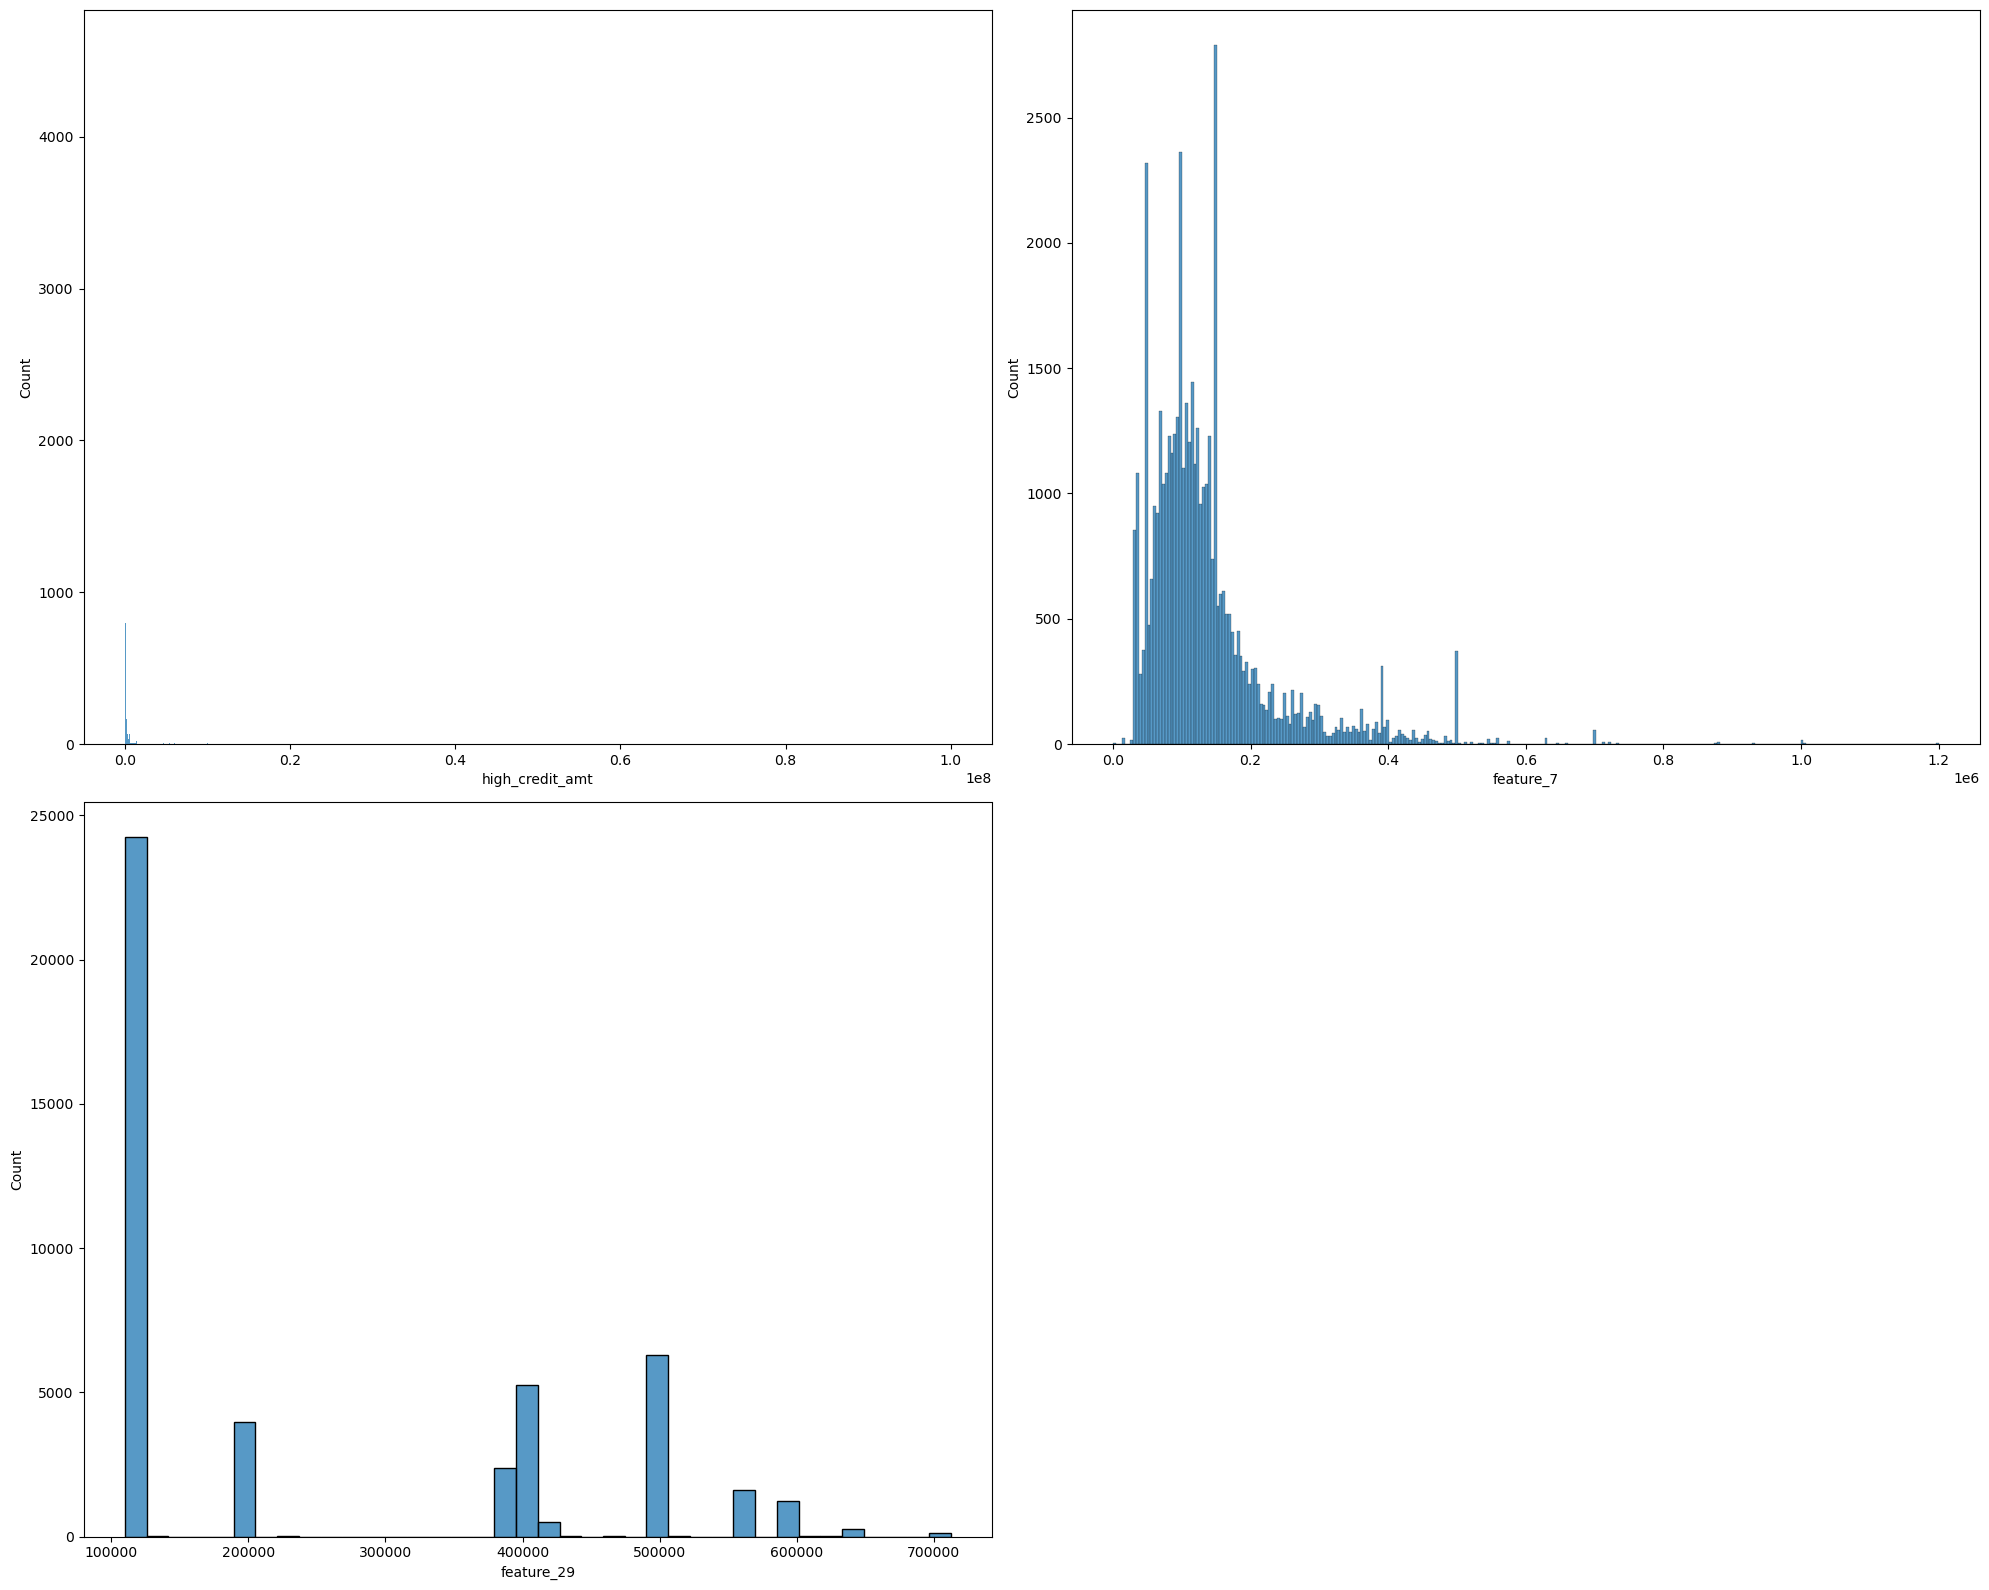

In [43]:
plt.figure(figsize = (20,16))
n = 1
for i in num1:
    plt.subplot(2,2,n)
    sns.histplot(sample_data[i])
    n+=1
plt.tight_layout()
plt.show()

* The high_credit_amt column the 0.0 value more then 800 times present the sample_data
* The feature_7 column have skew type of distribution
* The feature_9 column the 100000 present more then 24000 and some other values or have unique values

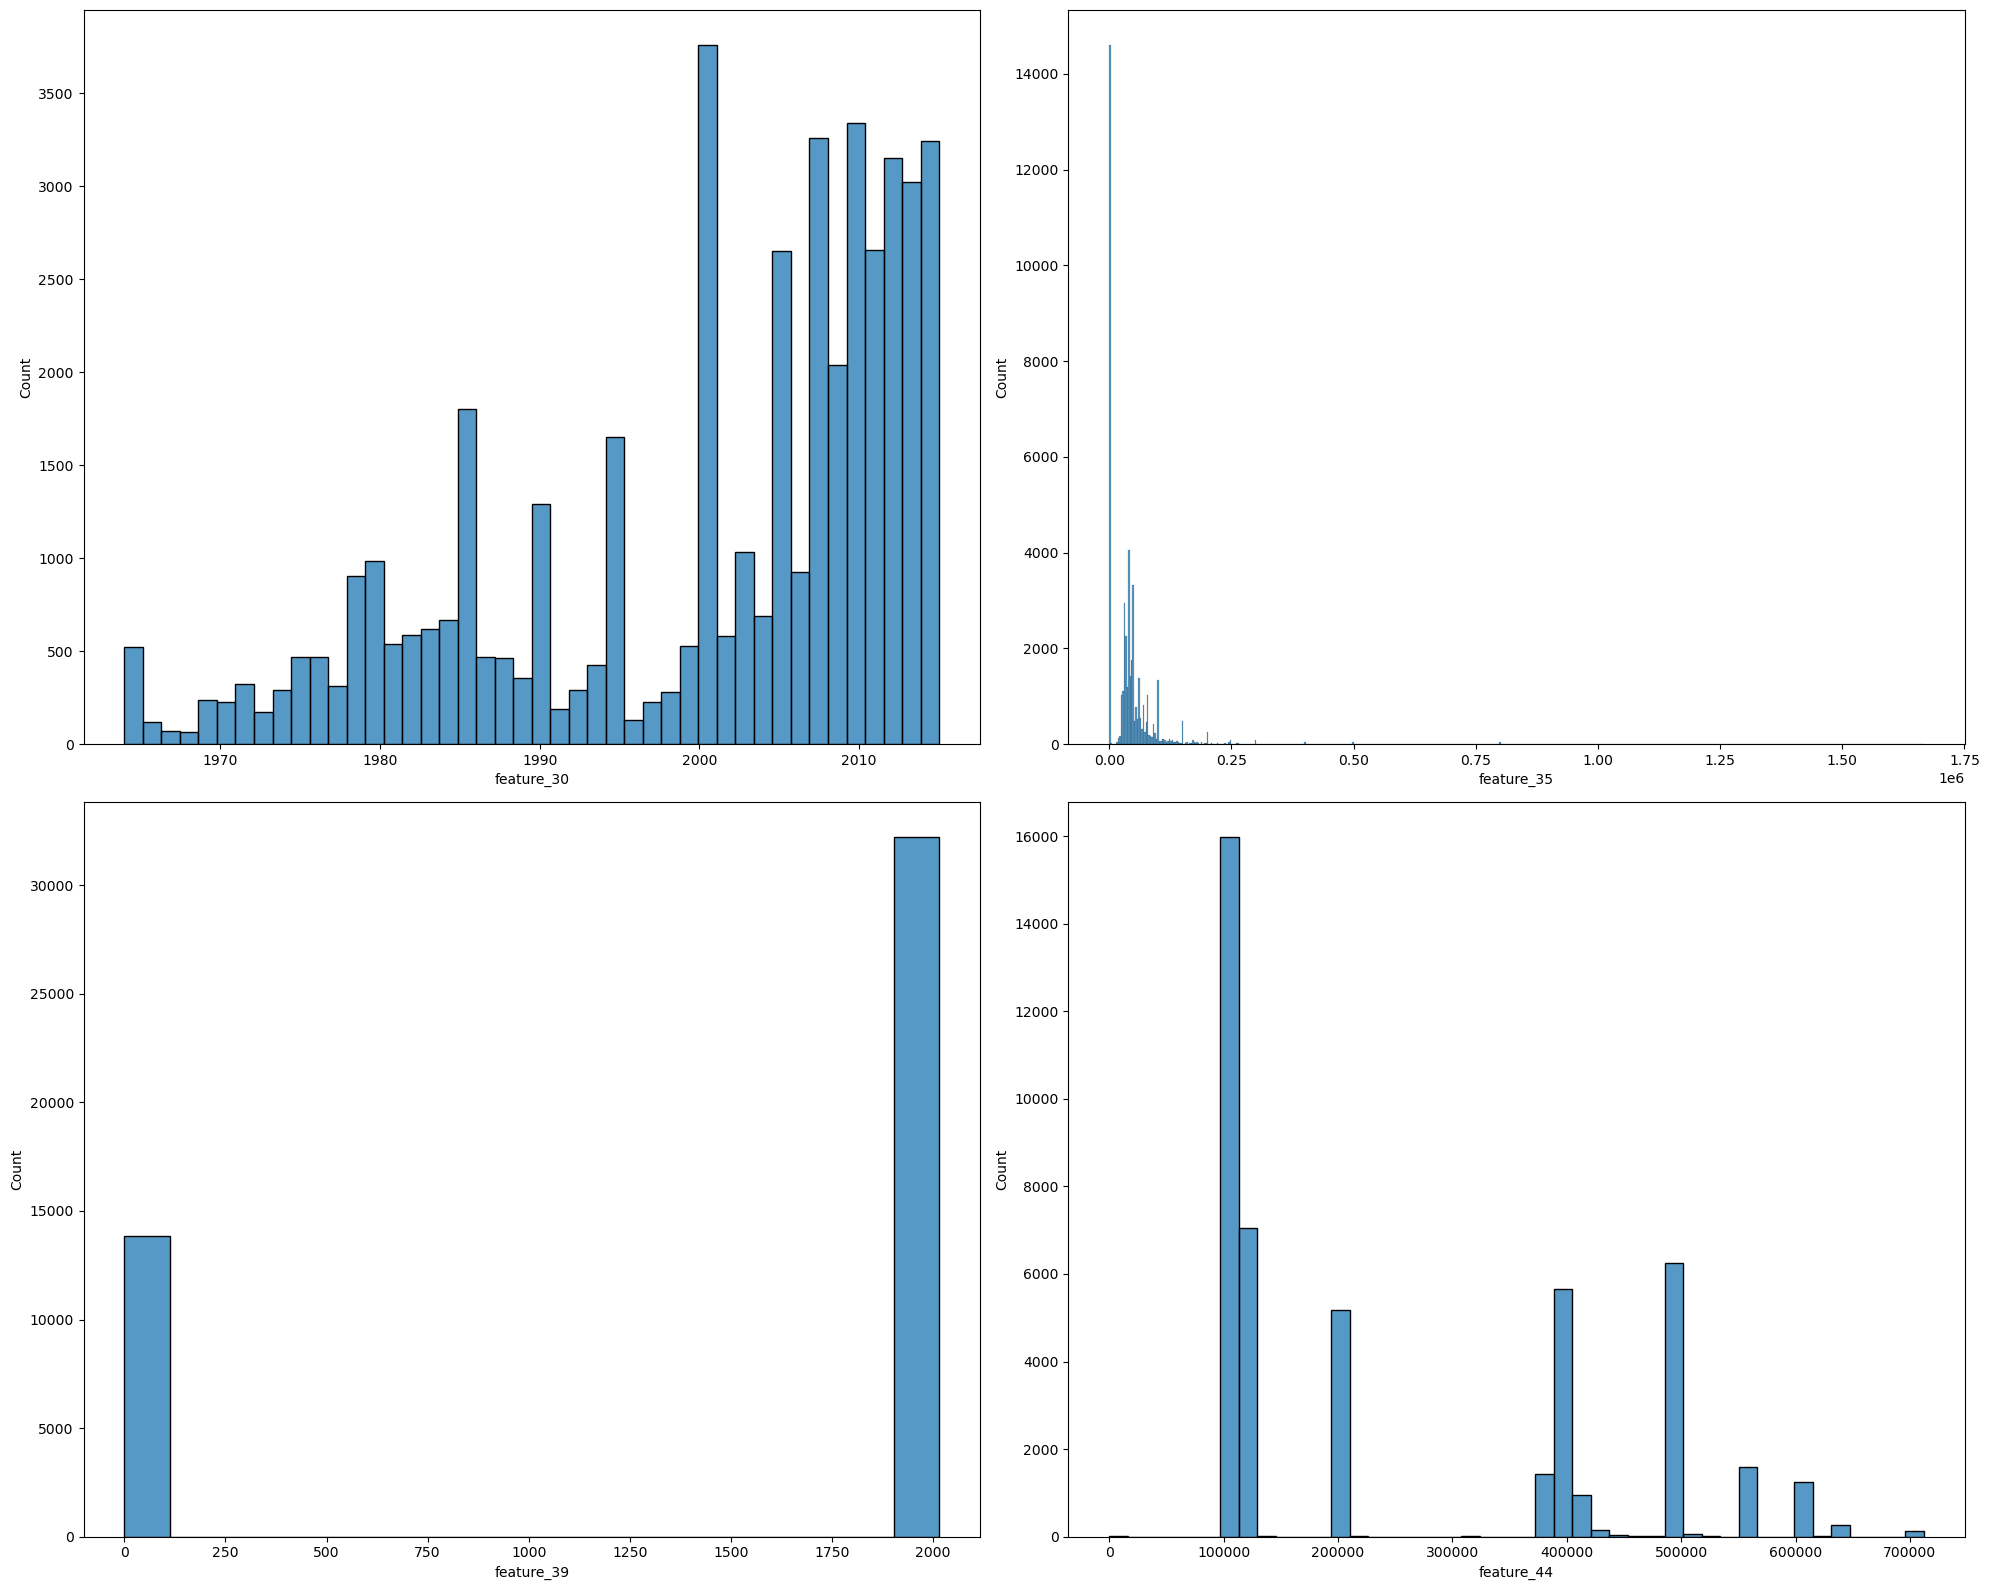

In [44]:
plt.figure(figsize = (20,16))
n = 1
for i in num2:
    plt.subplot(2,2,n)
    sns.histplot(sample_data[i])
    n+=1
plt.tight_layout()
plt.show()

* The feature_30 column the years have a linearity it increasing like positive linearity
* The feature_35 column the most of the data point present the range BW 0.00 to 0.25
* The feature_39 column the have only to points 0,20000 the 2000 have present more then 350000
* The feature_44 column the range BW 100000 to 200000 the most of the data present

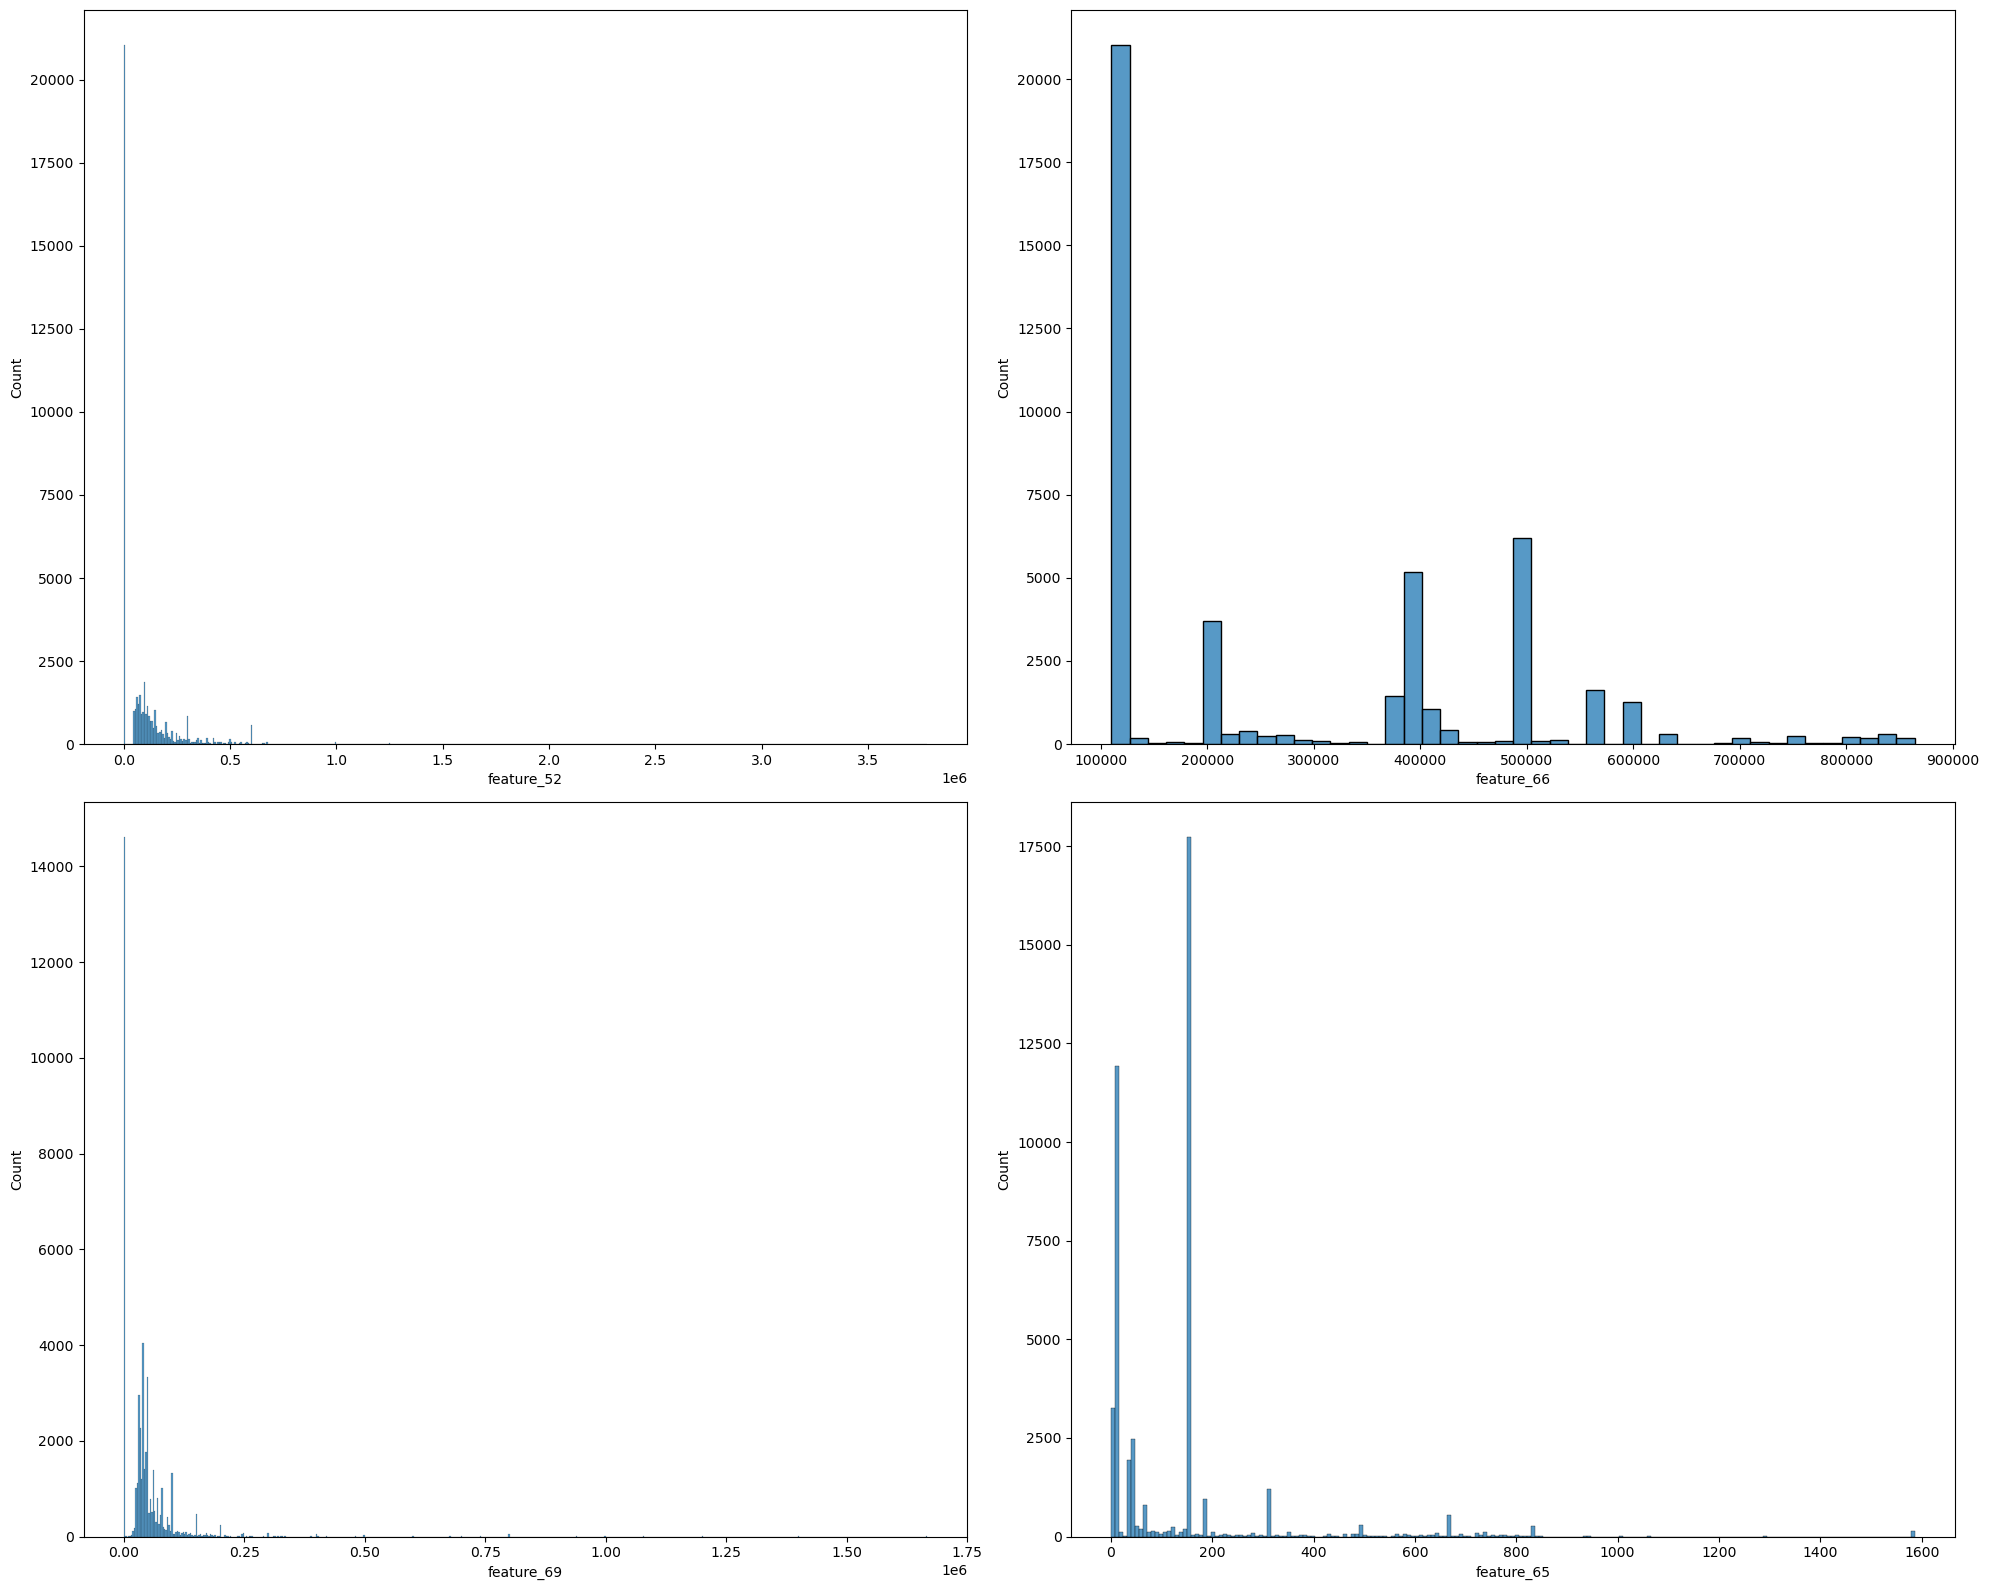

In [45]:
plt.figure(figsize = (20,16))
n = 1
for i in num3:
    plt.subplot(2,2,n)
    sns.histplot(sample_data[i])
    n+=1
plt.tight_layout()
plt.show()

* THe feature_52 column like a skew distribution and the point 0.0 present more then 20000 times
* THe feature_56 column the value 100000 present more then 20000 times 
* THe feature_69 column like a skew distribution and the point 0.0 present more then 14000 times
* THe feature_65 column the have so much of outliers and the datas are present the range BW 0 to 200

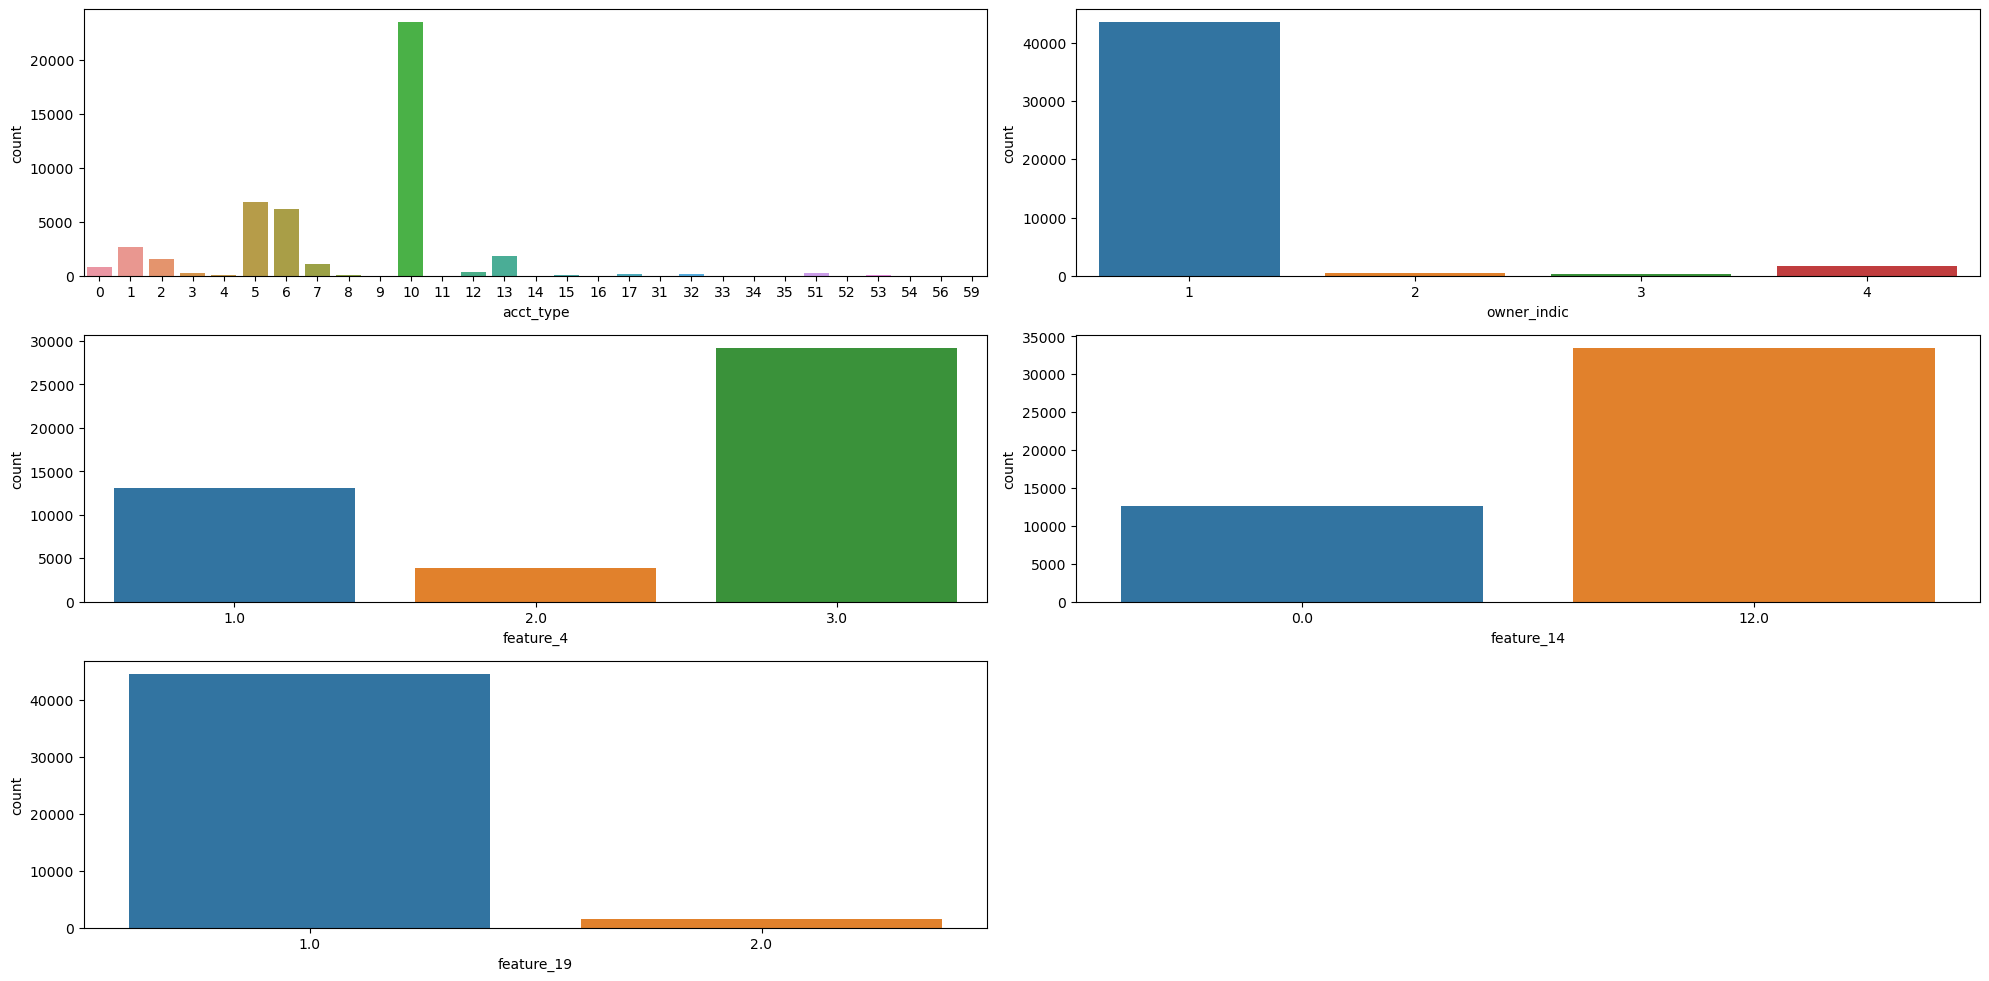

In [46]:
plt.figure(figsize = (20,16))
n = 1
for i in num4:
    plt.subplot(5,2,n)
    sns.countplot(x = sample_data[i])
    n+=1
plt.tight_layout()
plt.show()

* the acct_type column the value 10 present more then 20000
* the owner_indic the 1 value present more then 40000
* the feature_4 they have 3 unique value but the 3.0 have high values
* the feature_14 have 2 unique value such as 0,12 the 12 present more then 30000 times
* the feature_19 the 1 present more the 40000 times

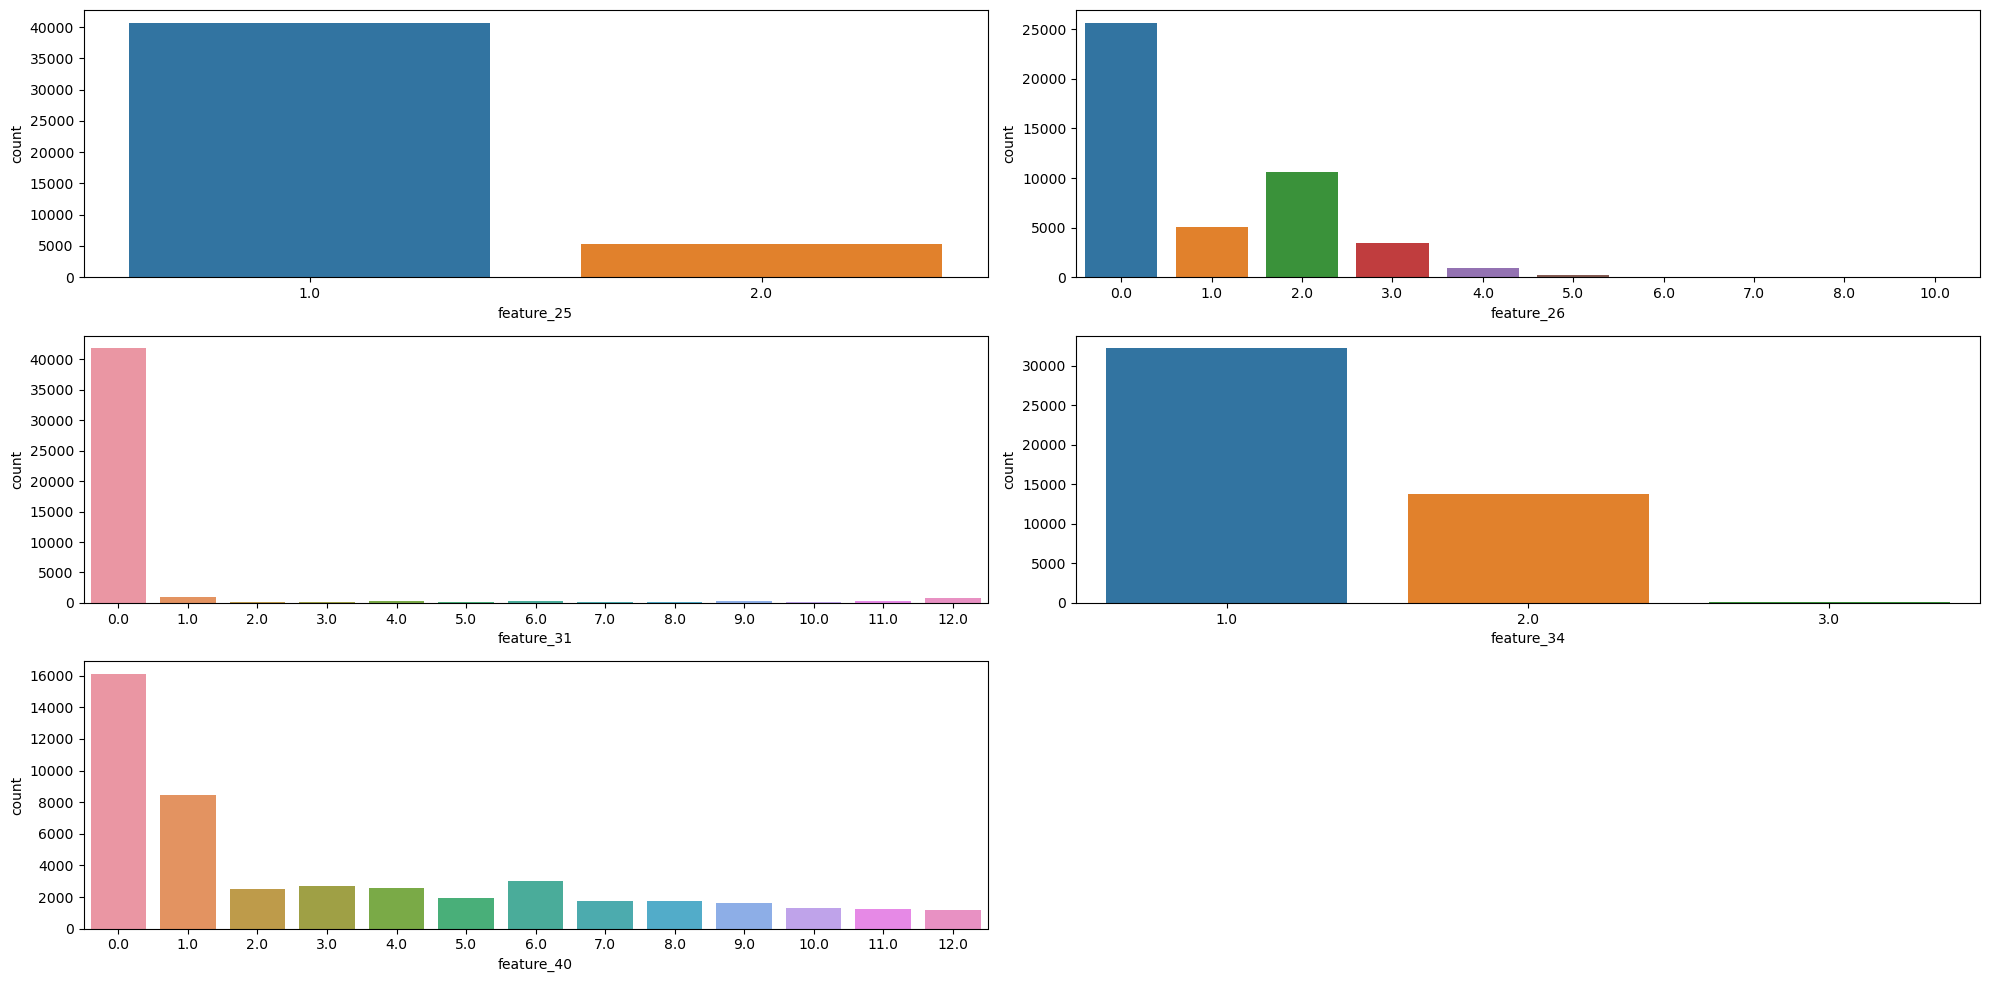

In [47]:
plt.figure(figsize = (20,16))
n = 1
for i in num5:
    plt.subplot(5,2,n)
    sns.countplot(x = sample_data[i])
    n+=1
plt.tight_layout()
plt.show()

* the column feature_25 have two unique value 1,2 but the one have high values on the data
* the feature_26 the 0.0 present more then 25000
* the feature_31 the 0.0 present more then 40000
* the feature_34 the 1 present more times on the data
* the feature_40 the 0 value have 16000 data

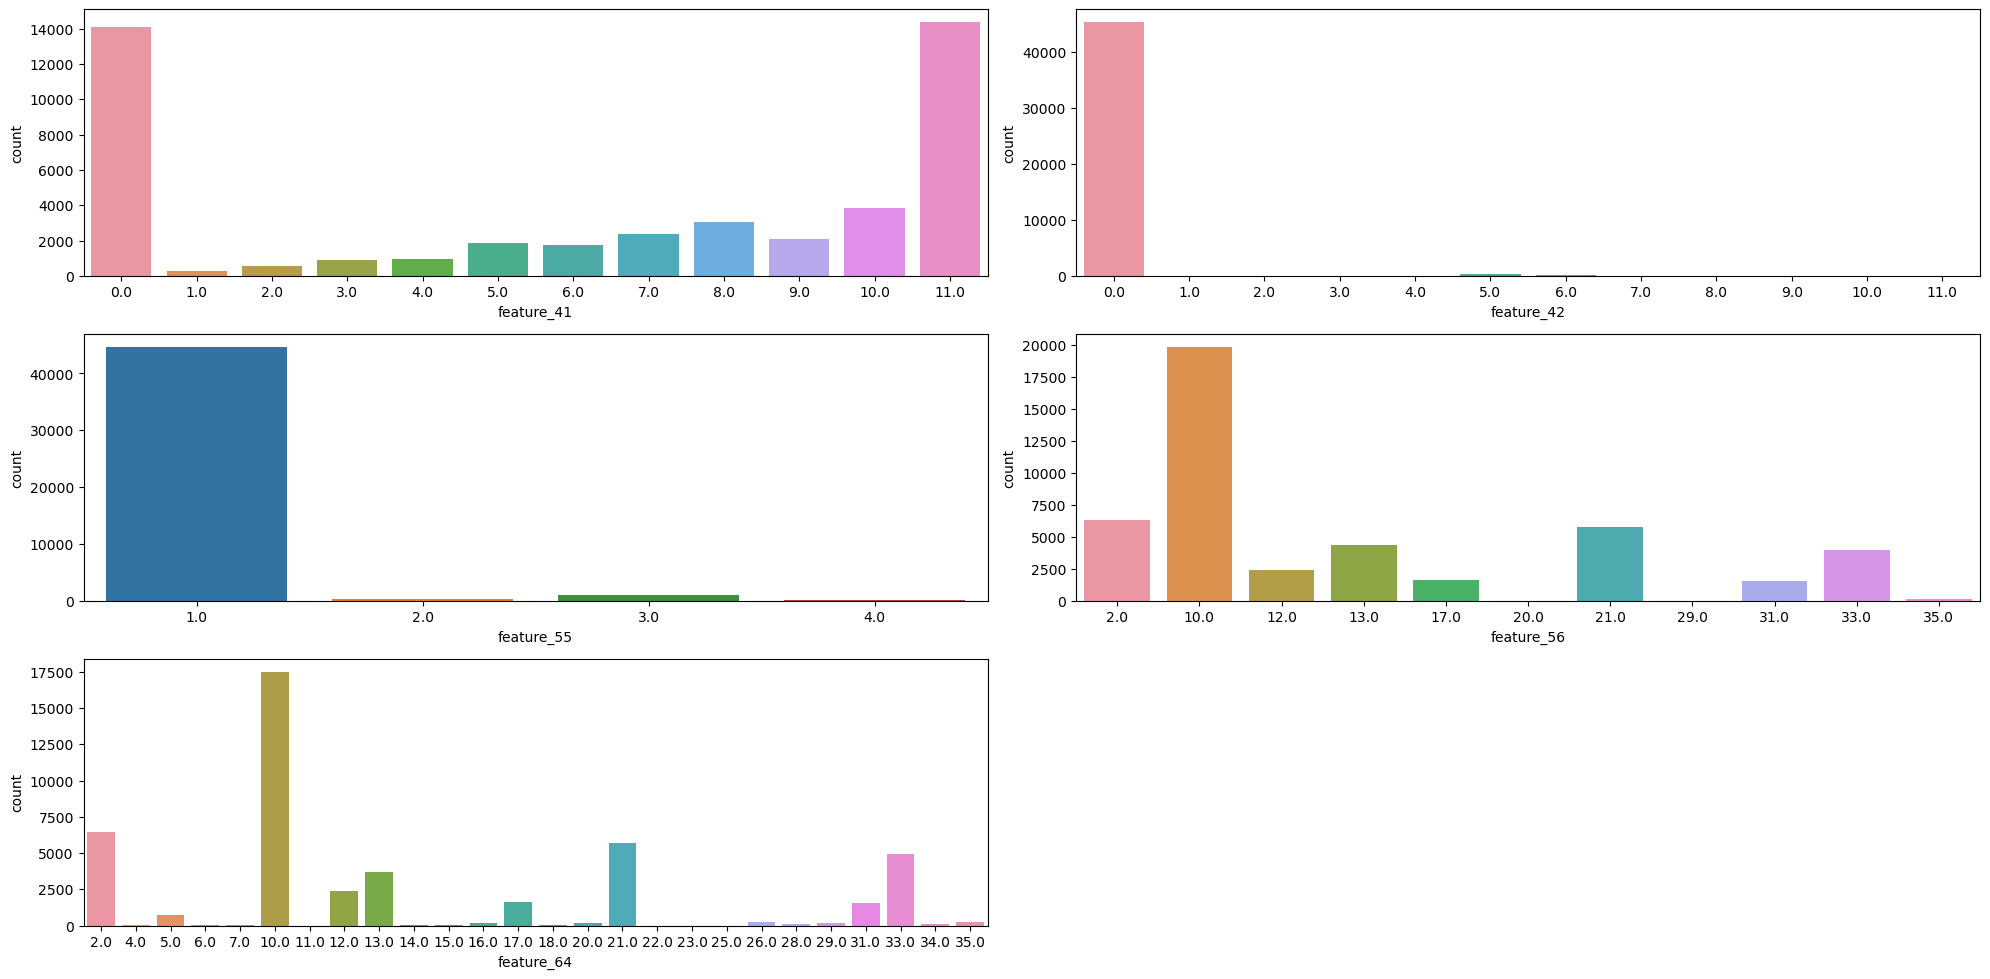

In [48]:
plt.figure(figsize = (20,16))
n = 1
for i in num6:
    plt.subplot(5,2,n)
    sns.countplot(x = sample_data[i])
    n+=1
plt.tight_layout()
plt.show()

* the column feature_41 have two high value 0,11 but the one have high values on the data
* the feature_56 the 10 present more then 19000
* the feature_42 the 0.0 present more then 40000
* the feature_55 the 1 present more times on the data
* the feature_64 the 10 value have 17500 data

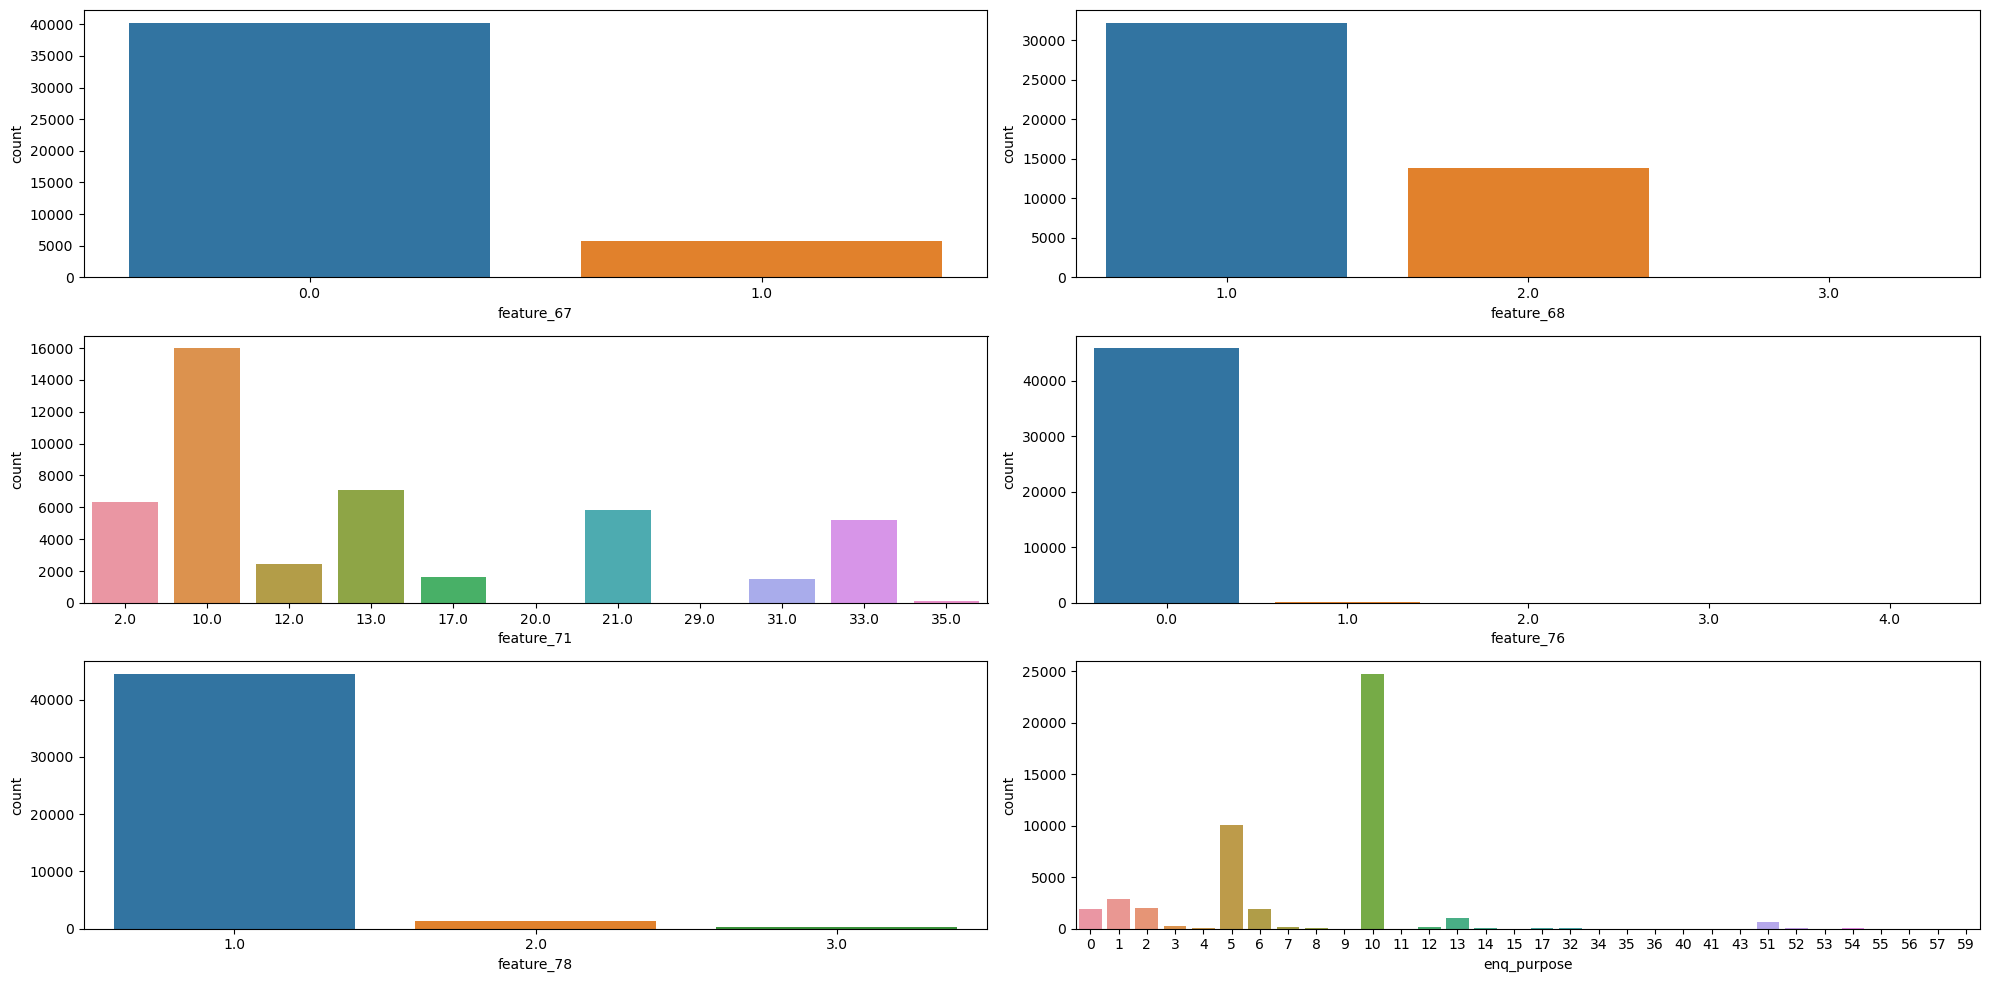

In [49]:
plt.figure(figsize = (20,16))
n = 1
for i in num7:
    plt.subplot(5,2,n)
    sns.countplot(x = sample_data[i])
    n+=1
plt.tight_layout()
plt.show()

* the column feature_67 have two unique value 0.0,1.0 but the 0.0 have high values on the data
* the euq_purpose the 10.0 present more then 25000
* the feature_71 the 10.0 present more then 15000
* the feature_76 the 0.0 present more then 40000
* the feature_68 the 1 present more times on the data
* the feature_78 the 1.0 value have 40000 data

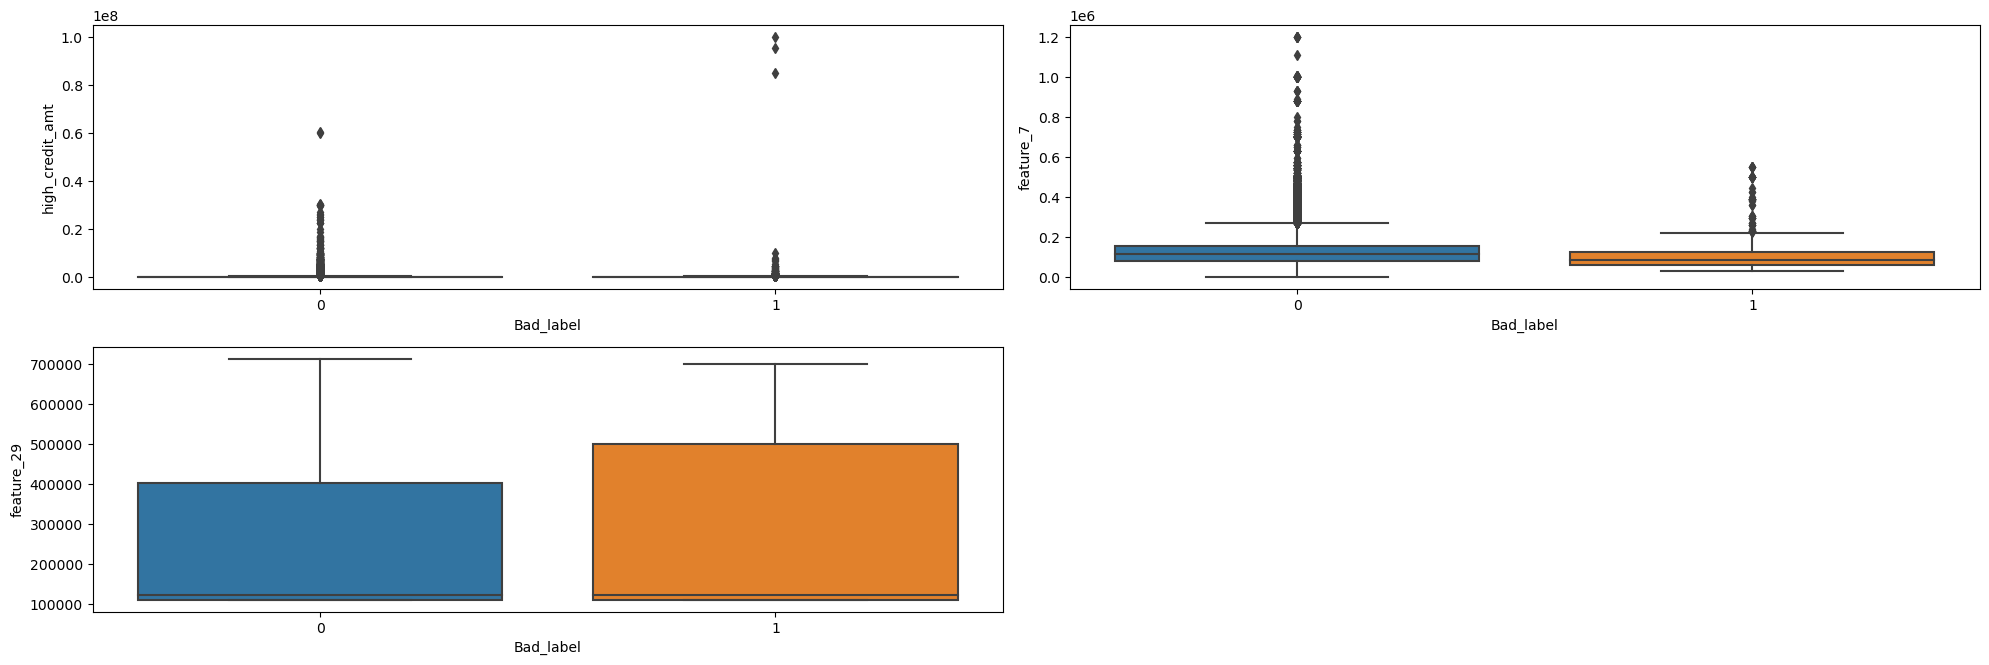

In [50]:
plt.figure(figsize = (20,16))
n = 1
for i in num1:
    plt.subplot(5,2,n)
    sns.boxplot(y = sample_data[i] ,x = sample_data["Bad_label"])
    n+=1
plt.tight_layout()
plt.show()

* the high_credit_amt have 2 values 0,1 the one have outliers
* the feature_7 the 0 have high value present on the data
* the featrue_29 the have stable values

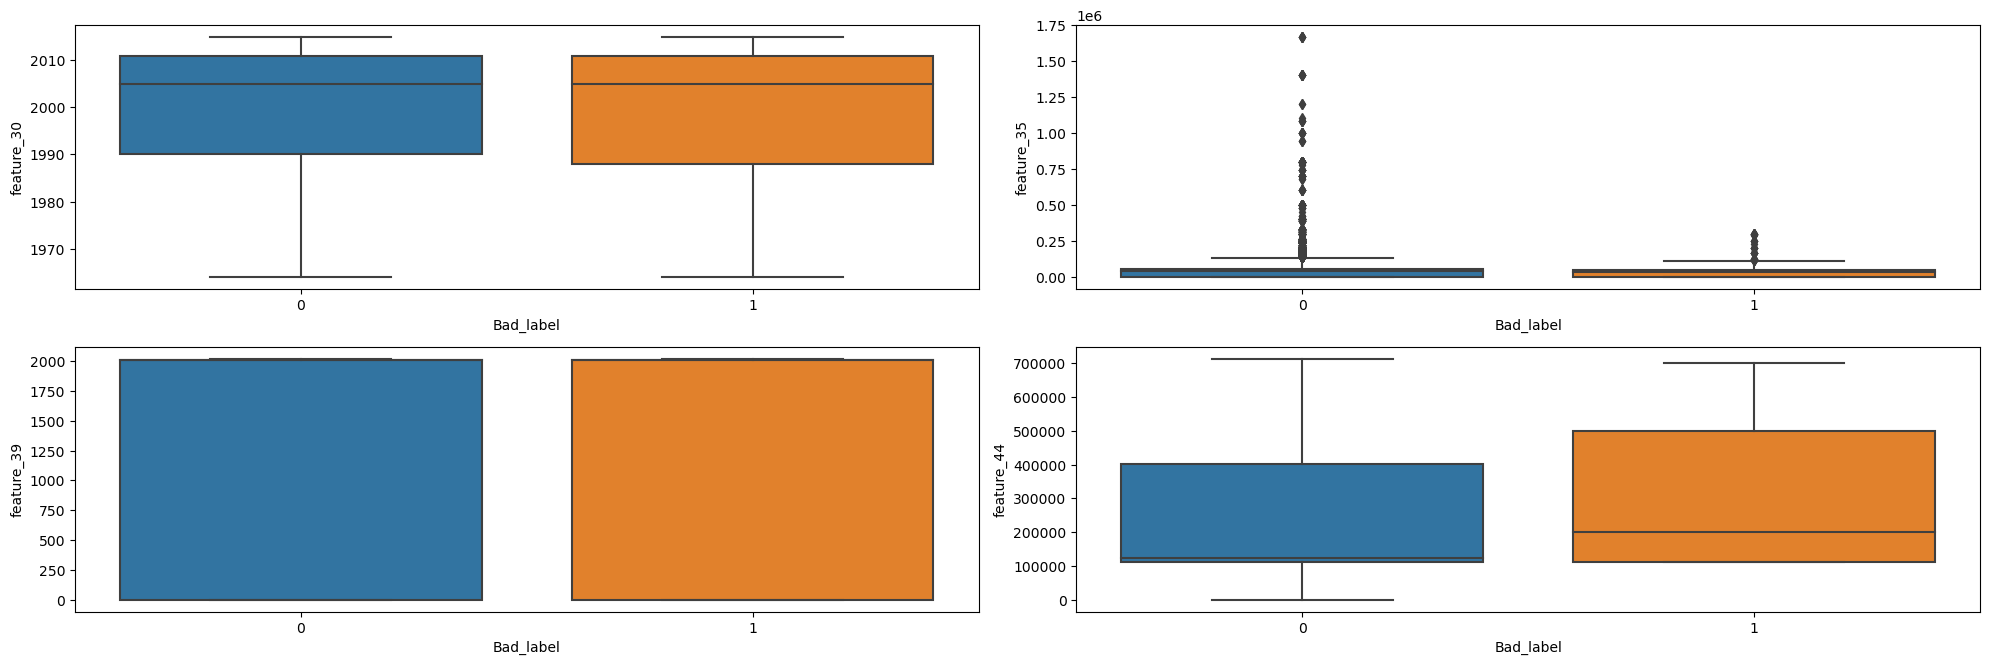

In [51]:
plt.figure(figsize = (20,16))
n = 1
for i in num2:
    plt.subplot(5,2,n)
    sns.boxplot(y = sample_data[i] ,x = sample_data["Bad_label"])
    n+=1
plt.tight_layout()
plt.show()

* the featrue_30 the have stable values
* the featrue_39 the have stable values
* the featrue_44 the have stable values
* the featrue_35 the 0 have a outlier

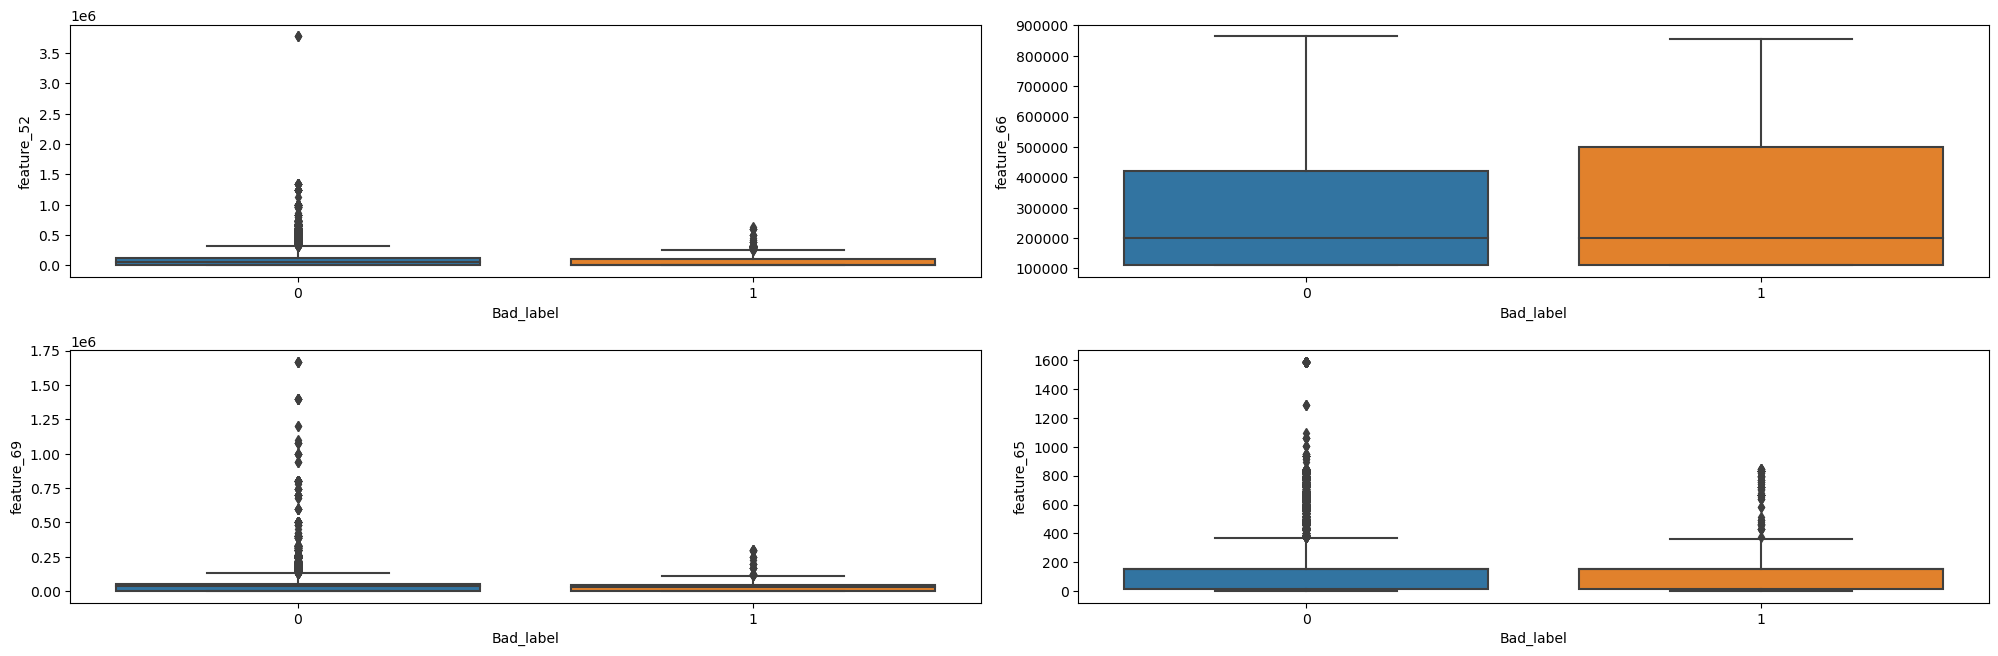

In [52]:
plt.figure(figsize = (20,16))
n = 1
for i in num3:
    plt.subplot(5,2,n)
    sns.boxplot(y = sample_data[i] ,x = sample_data["Bad_label"])
    n+=1
plt.tight_layout()
plt.show()

* the featrue_52 have a one outlier
* the featrue_66 the have stable values
* the featrue_69 column 0 have a outliers
* the featrue_65 column 0 have a  outliers

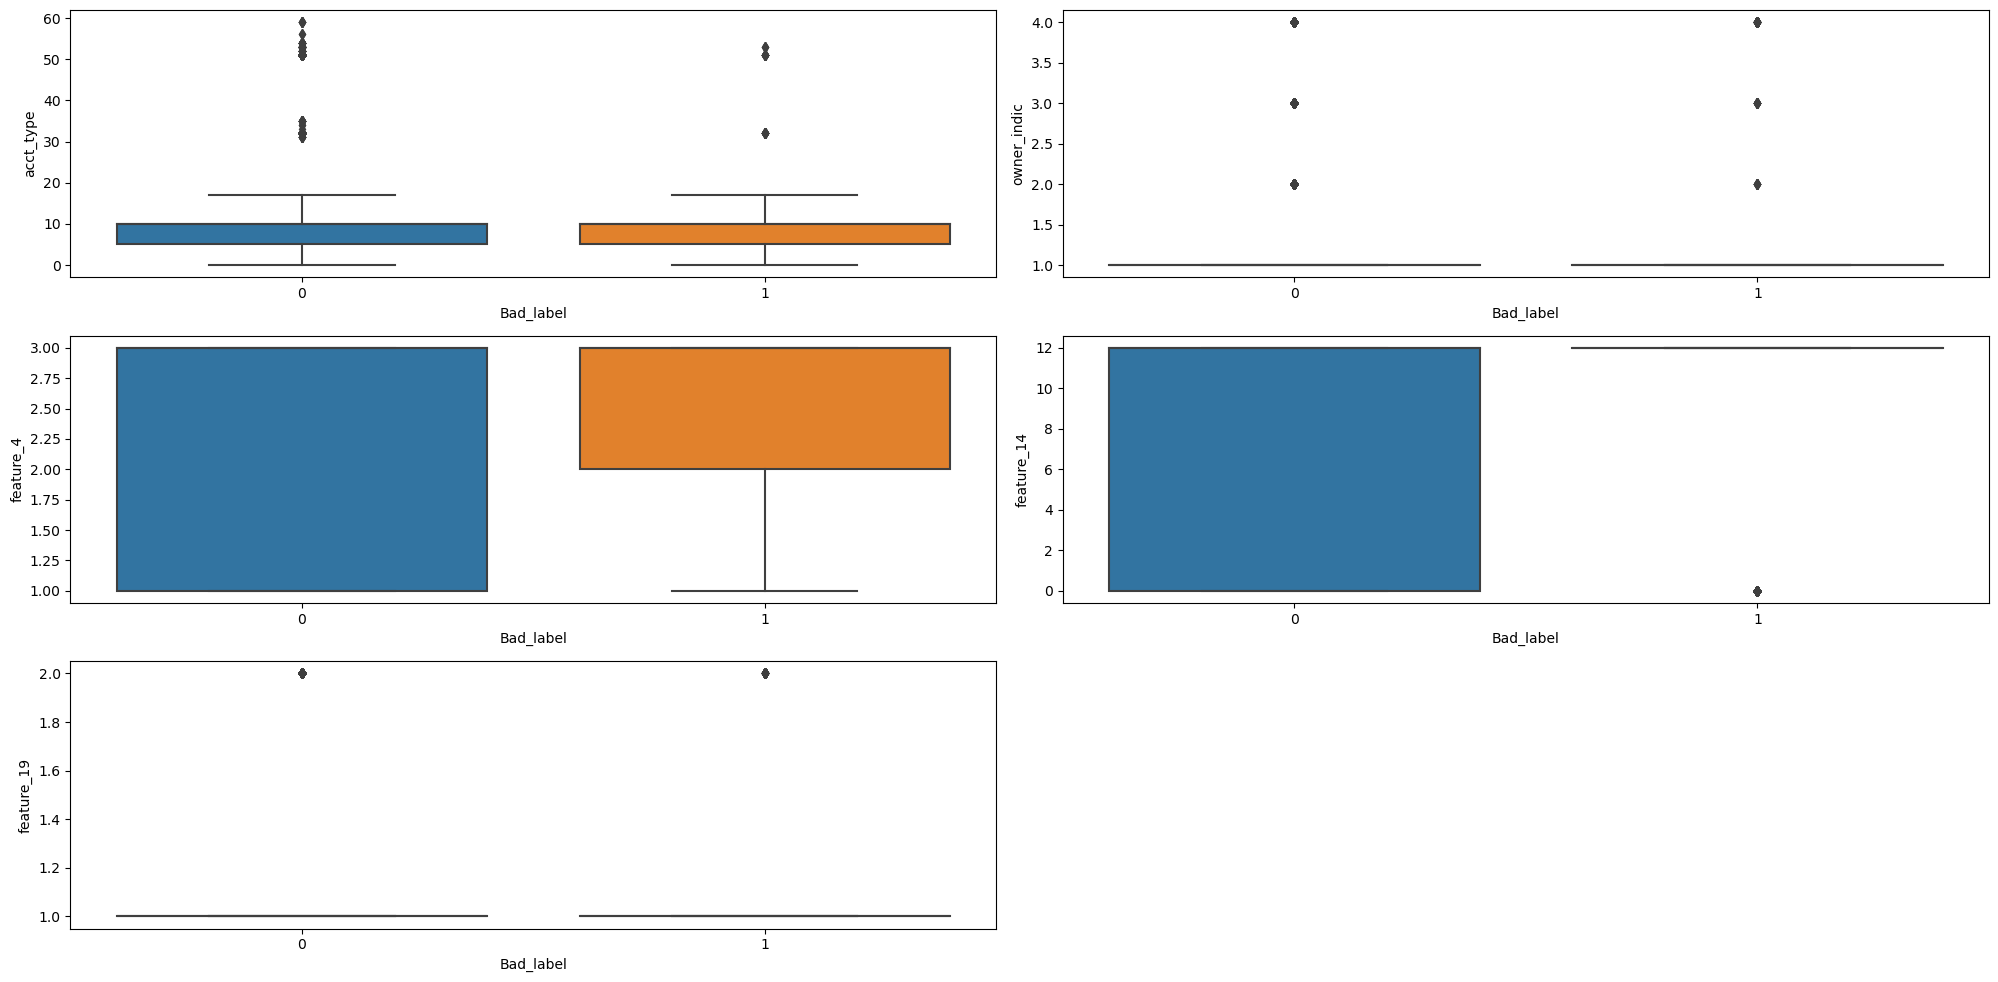

In [53]:
plt.figure(figsize = (20,16))
n = 1
for i in num4:
    plt.subplot(5,2,n)
    sns.boxplot(y = sample_data[i] ,x = sample_data["Bad_label"])
    n+=1
plt.tight_layout()
plt.show()

* the acct_type have a one outlier
* the featrue_14 the 0 have high values

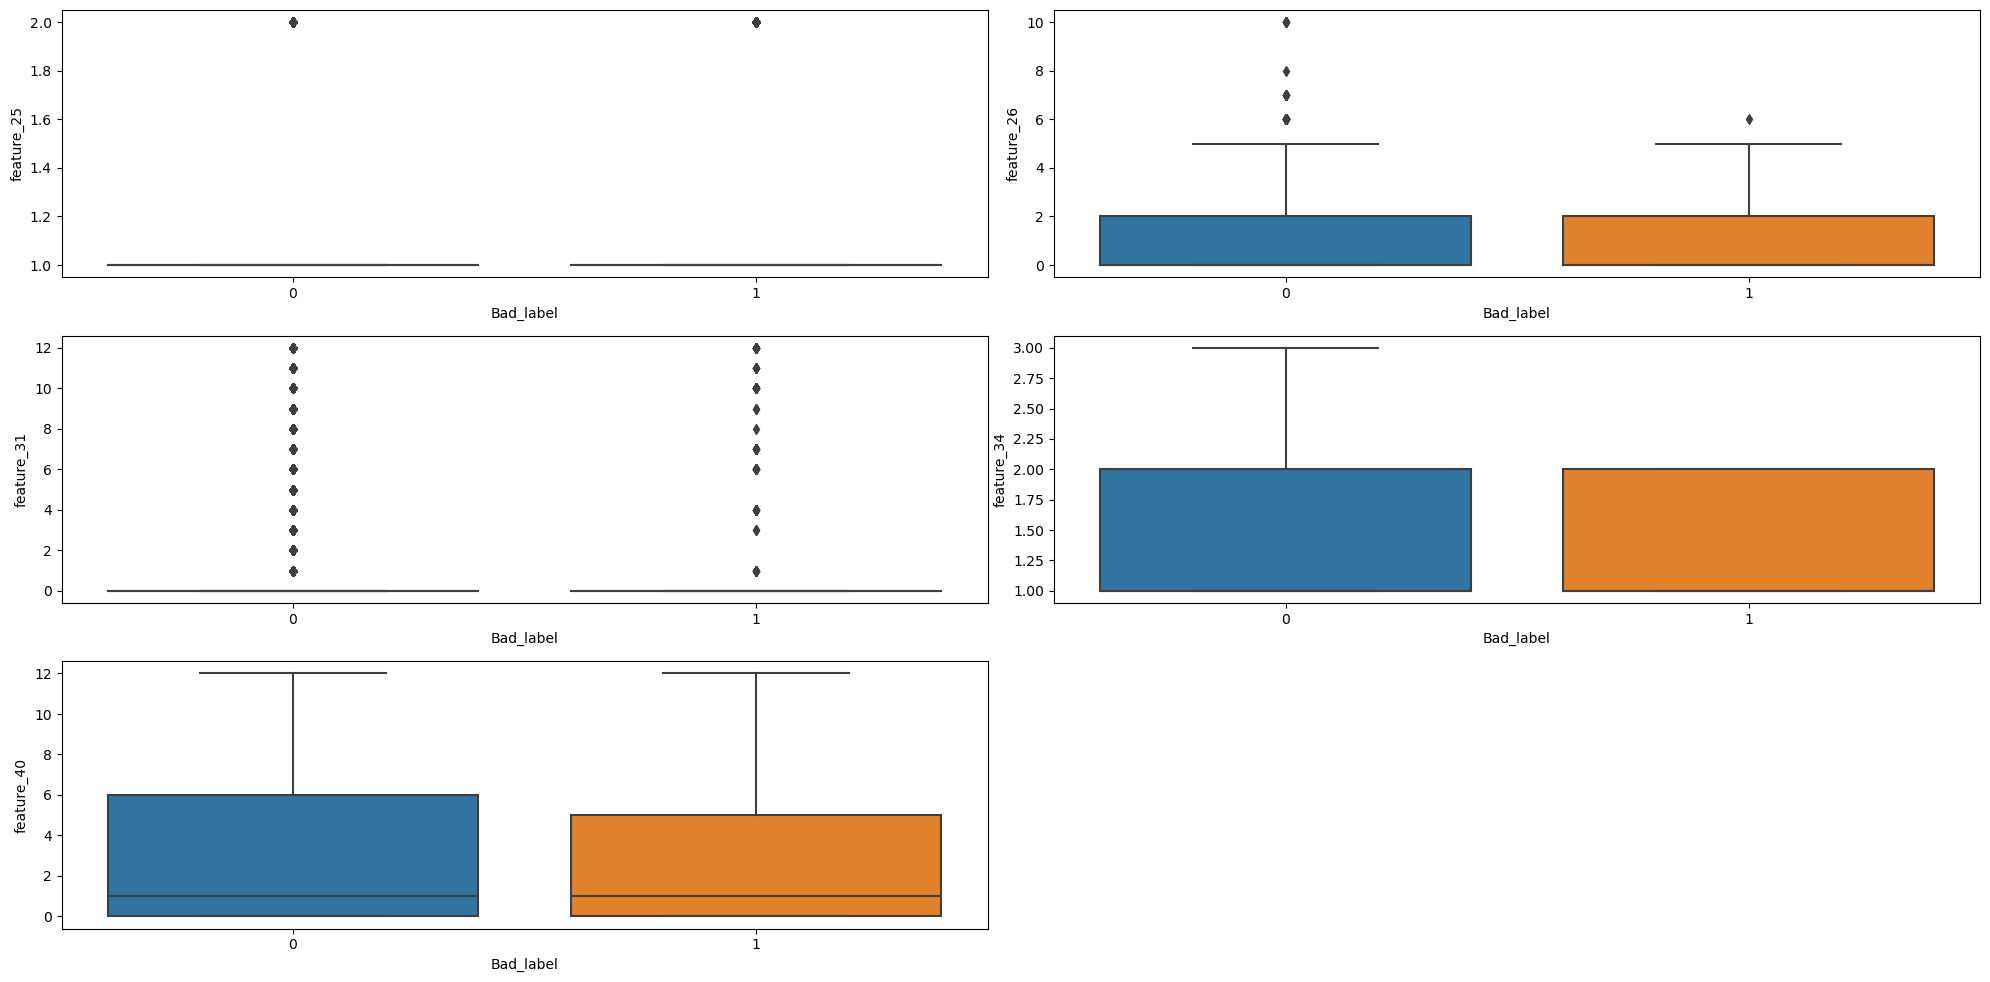

In [54]:
plt.figure(figsize = (20,16))
n = 1
for i in num5:
    plt.subplot(5,2,n)
    sns.boxplot(y = sample_data[i] ,x = sample_data["Bad_label"])
    n+=1
plt.tight_layout()
plt.show()

* the feature_26 only have few outliers
* the feature_34,feature_40 have stable value

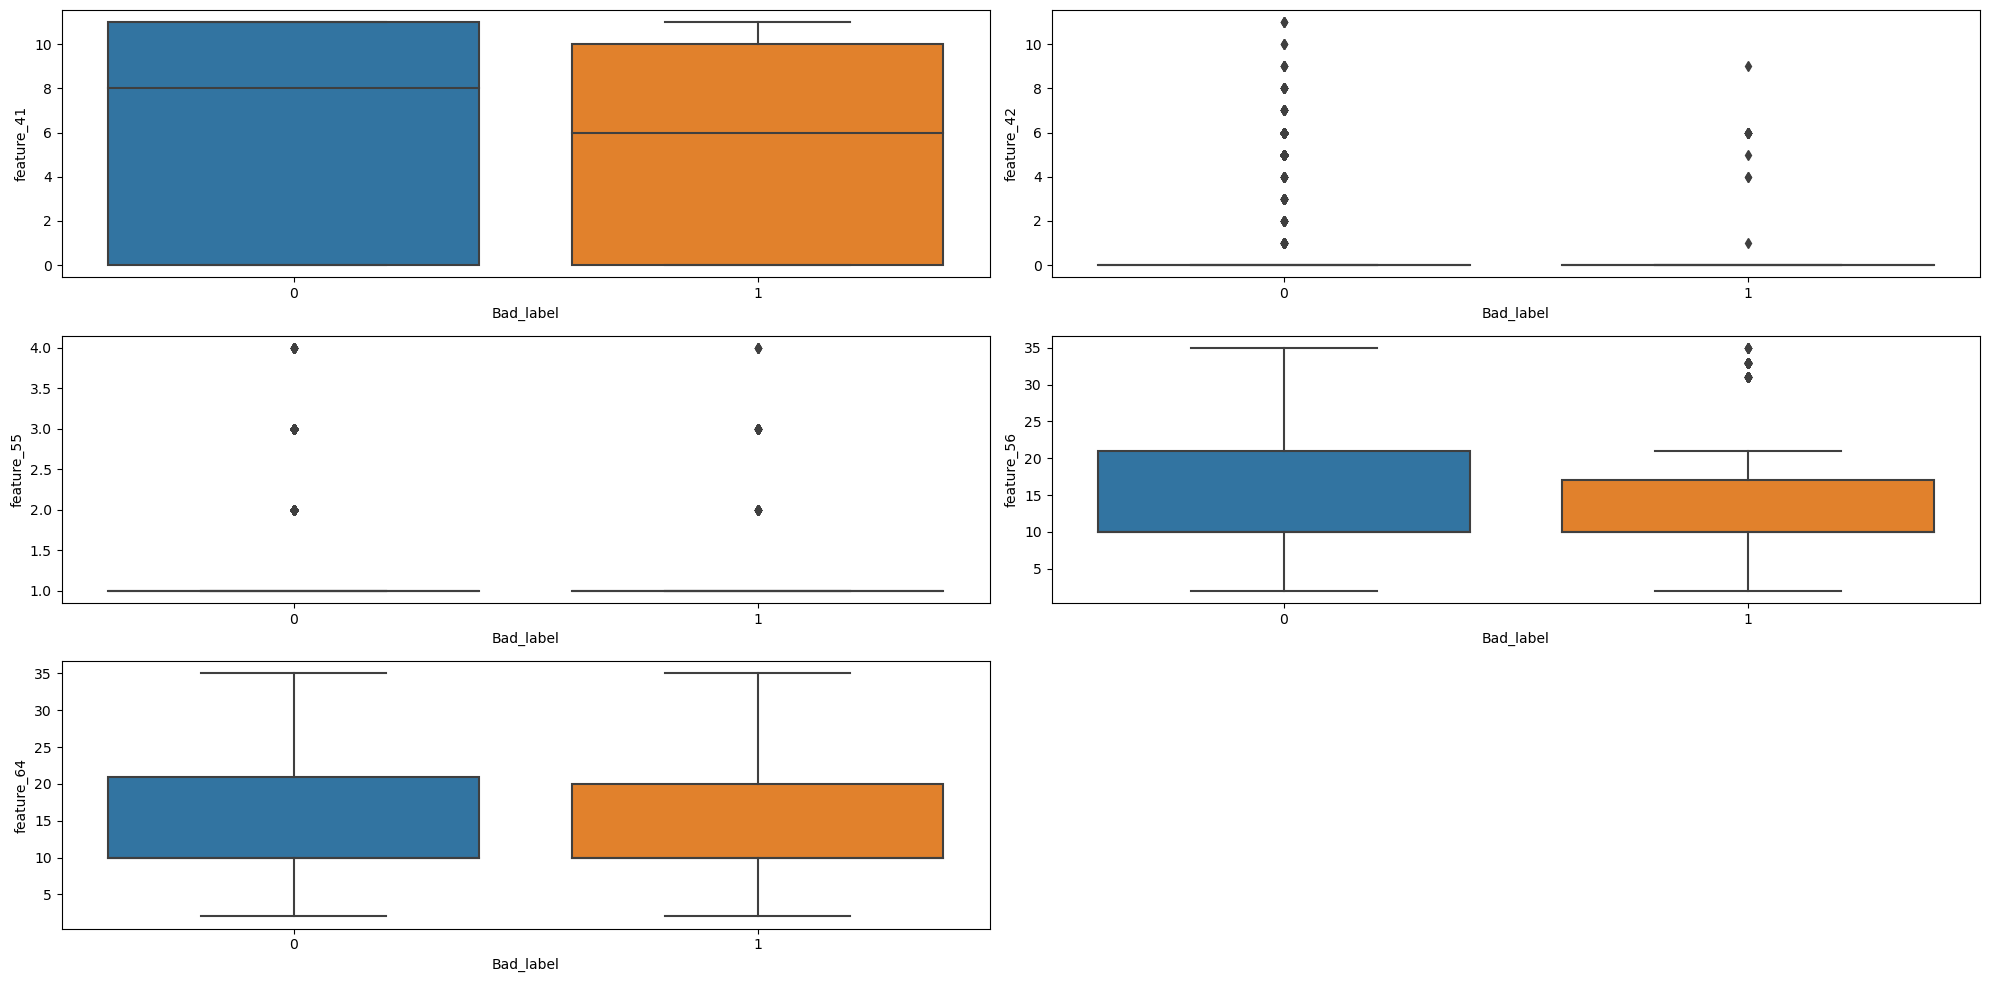

In [55]:
plt.figure(figsize = (20,16))
n = 1
for i in num6:
    plt.subplot(5,2,n)
    sns.boxplot(y = sample_data[i] ,x = sample_data["Bad_label"])
    n+=1
plt.tight_layout()
plt.show()

* In feature_41 has a stable columns
* In feature_56 one has stable and another one some outliers
* In feature_64 has a stable columns

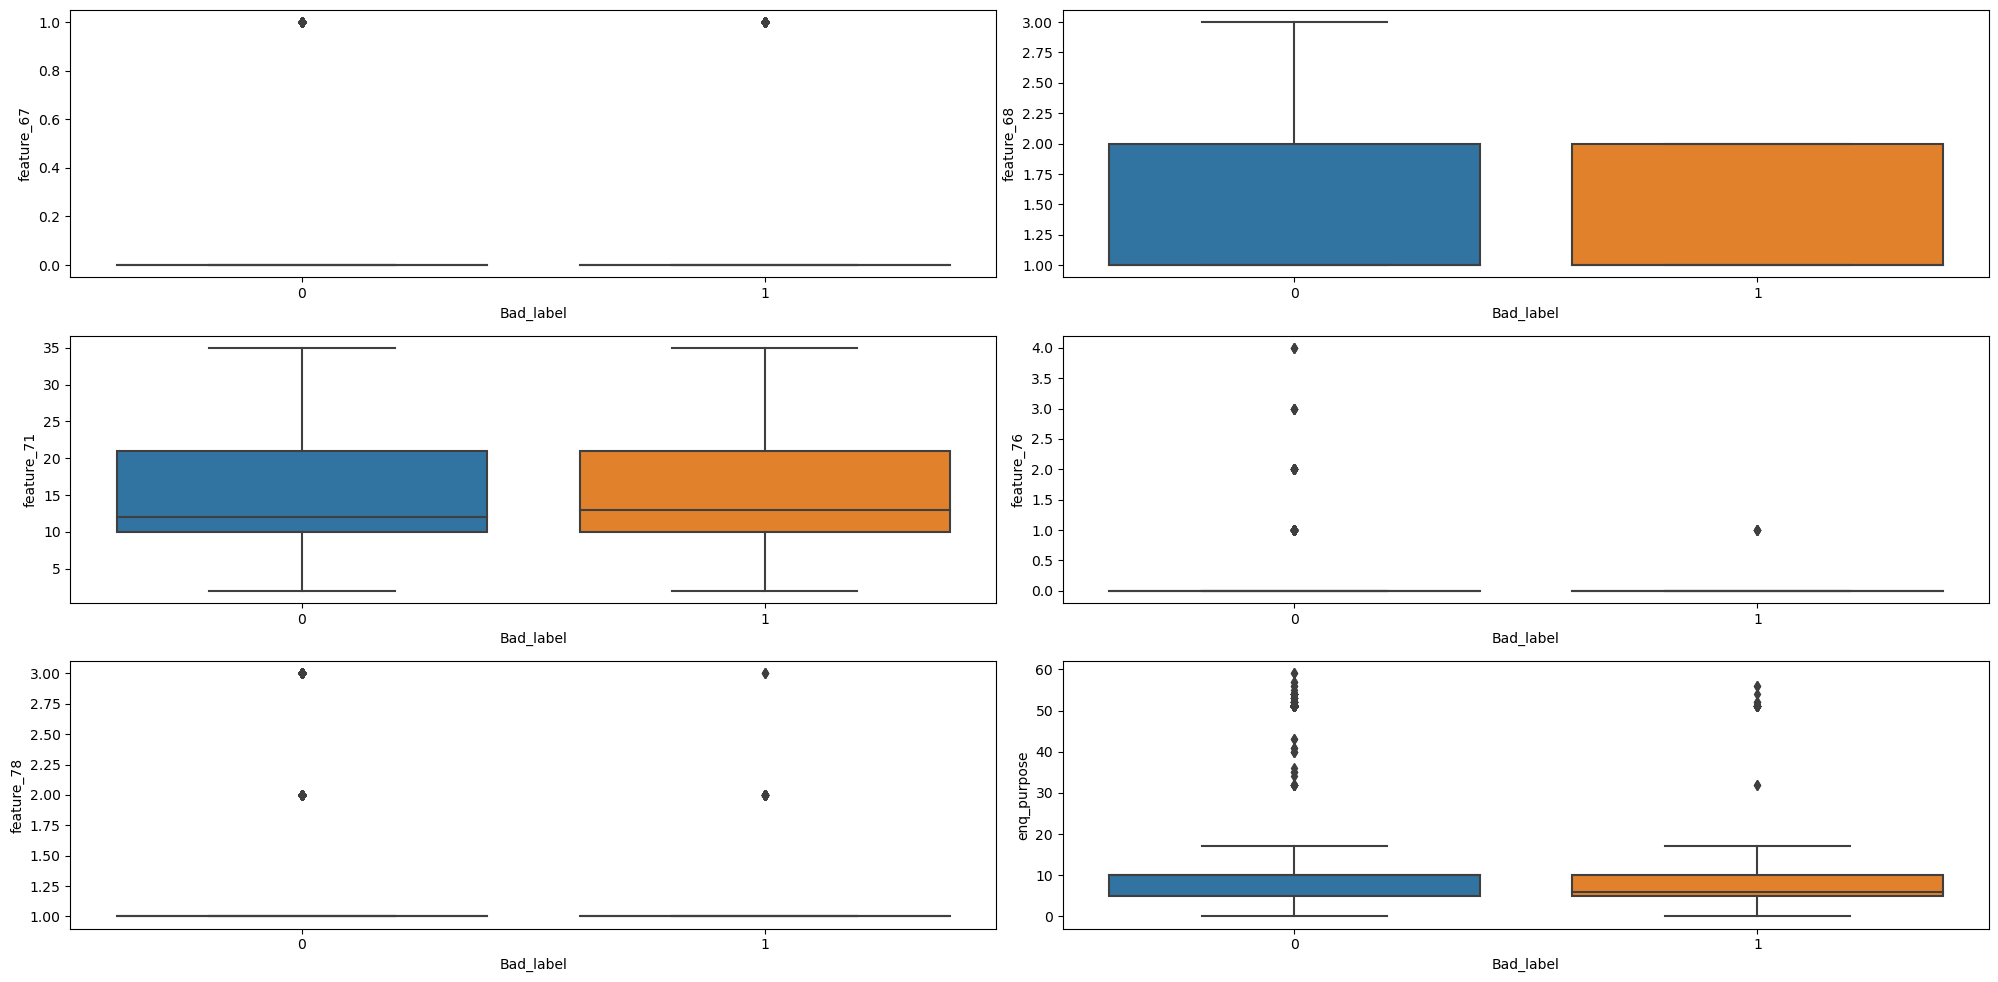

In [56]:
plt.figure(figsize = (20,16))
n = 1
for i in num7:
    plt.subplot(5,2,n)
    sns.boxplot(y = sample_data[i] ,x = sample_data["Bad_label"])
    n+=1
plt.tight_layout()
plt.show()

In [57]:
cat_col_sam_data.head()

dt_opened  upload_dt  opened_dt last_paymt_dt reporting_dt  \
0  01-Sep-15  07-Aug-15  02-Jul-08     15-Jan-14    30-Jun-15   
1  31-Dec-15  21-Dec-15  02-Jul-06     14-Jan-08    28-Feb-13   
2  31-Dec-15  07-Dec-15  29-Jul-13     21-Oct-15    31-Oct-15   
3  05-Oct-15  26-Aug-15  31-Aug-07     05-Mar-15    31-Dec-13   
4  15-Dec-15  17-Aug-15  21-May-11     05-Feb-12    31-May-13   

                                     paymenthistory1 paymt_str_dt  \
0  """0000000000000000000000000000000000000000000...    01-Jun-15   
1  """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...    01-Mar-12   
2  """0000000000000000000000000000000000000000000...    01-Oct-15   
3                                          """000"""    01-Oct-07   
4               """000000STDSTDSTDXXXSTDSTDSTDSTD"""    01-Mar-12   

  paymt_end_dt entry_time        feature_1  feature_2   feature_5 feature_11  \
0    01-Jul-12  04-Aug-15  Platinum Deligh  19-Aug-15  Card Setup          N   
1    01-Apr-09  18-Dec-15  Titanium Deligh  18-Dec-15  Card Setup          Y   
2    01-Jul-13  04-Dec-15  Platinum Maxima  19-Aug-15  Card Setup          Y   
3    01-Oct-07  21-Aug-15  Platinum Deligh  19-Aug-15  Card Setup          Y   
4    01-Jun-11  16-Aug-15  Platinum Maxima  16-Aug-15  Card Setup          Y   

  feature_12 feature_15 feature_16  feature_20 feature_21  feature_22  \
0        PD1       SA05       MA01  BRPPSXXXXX  12-Nov-78  97177XXXXX   
1        TD1       HA03       VA03  AFKPDXXXXX  18-Apr-76  99893XXXXX   
2        PM1       SA43       AS33  AWQPKXXXXX  12-Mar-83  99109XXXXX   
3        PD1       CD01       D135  AHEPAXXXXX  01-Oct-82  99903XXXXX   
4        PM1       HA06       S203  BGNPKXXXXX  09-May-83  90002XXXXX   

  feature_23    feature_24     feature_27                feature_28  \
0          N  @YAHOO.CO.IN       Graduate                 New Delhi   
1          N    @GMAIL.COM       Graduate  Hyderabad / Secunderabad   
2          N    @GMAIL.COM       Graduate                 New Delhi   
3          Y    @GMAIL.COM  Post-Graduate                 New Delhi   
4          Y    @GMAIL.COM  Post-Graduate  Hyderabad / Secunderabad   

  feature_32 feature_33        feature_36                  feature_37  \
0       Self          Y    Public Ltd Co.  Banking/Financial Services   
1      Rente          Y    Public Ltd Co.                      Others   
2      Rente          N  Private Ltd. Co.  Banking/Financial Services   
3       Self          Y  Private Ltd. Co.                      Others   
4      Paren          Y  Private Ltd. Co.                      Others   

        feature_38 feature_43         feature_45 feature_46  feature_47  \
0    CAD EXECUTIVE    Gurgaon   @ORIENTKNITS.COM   PAN Card  BRPPSXXXXX   
1  GENERAL MANAGER  Hyderabad      @JUSTDIAL.COM   PAN Card  AFKPDXXXXX   
2          MANAGER  New Delhi         @GMAIL.COM   PAN Card  AWQPKXXXXX   
3      COORDINATOR  New Delhi           @AESL.IN   PAN Card  AHEPAXXXXX   
4          MANAGER  Hyderabad  @NEXTEDUCATION.IN   PAN Card  BGNPKXXXXX   

  feature_50           feature_51 feature_53 feature_54 feature_58 feature_59  \
0          N            HDFC Bank  01-Jun-14  17-Jun-16          N          N   
1          Y            HDFC Bank  01-Jan-14  17-Jun-16          N          Y   
2          Y  State Bank of India  01-Dec-13  17-Jun-16          N          Y   
3          N            HDFC Bank  01-Jun-14  17-Jun-16          N          Y   
4          Y            HDFC Bank  01-Nov-14  17-Jun-16          N          Y   

  feature_60 feature_62 feature_63 feature_70 feature_72  feature_75  \
0          N          Y     1994-0        0-0          O  0000-00-00   
1          N          Y     2015-7        0-0          R  0000-00-00   
2          N          Y    2013-12     Oct-00          R  0000-00-00   
3          N          Y     2013-0        0-0          O  0000-00-00   
4          N          Y     2012-0        0-0          O  0000-00-00   

   feature_77 feature_79 enquiry_dt  
0 

In [58]:
cat1 = ["feature_1","feature_5","feature_11","feature_12"]
cat2 = ["feature_16","feature_23","feature_27","feature_28"]
cat3 = ["feature_32","feature_33","feature_36","feature_37"]
cat4 = ["feature_38","feature_43","feature_45","feature_46"]
cat5 = ["feature_50","feature_51","feature_58","feature_59"]
cat6 = ["feature_60","feature_62","feature_72","feature_79"]

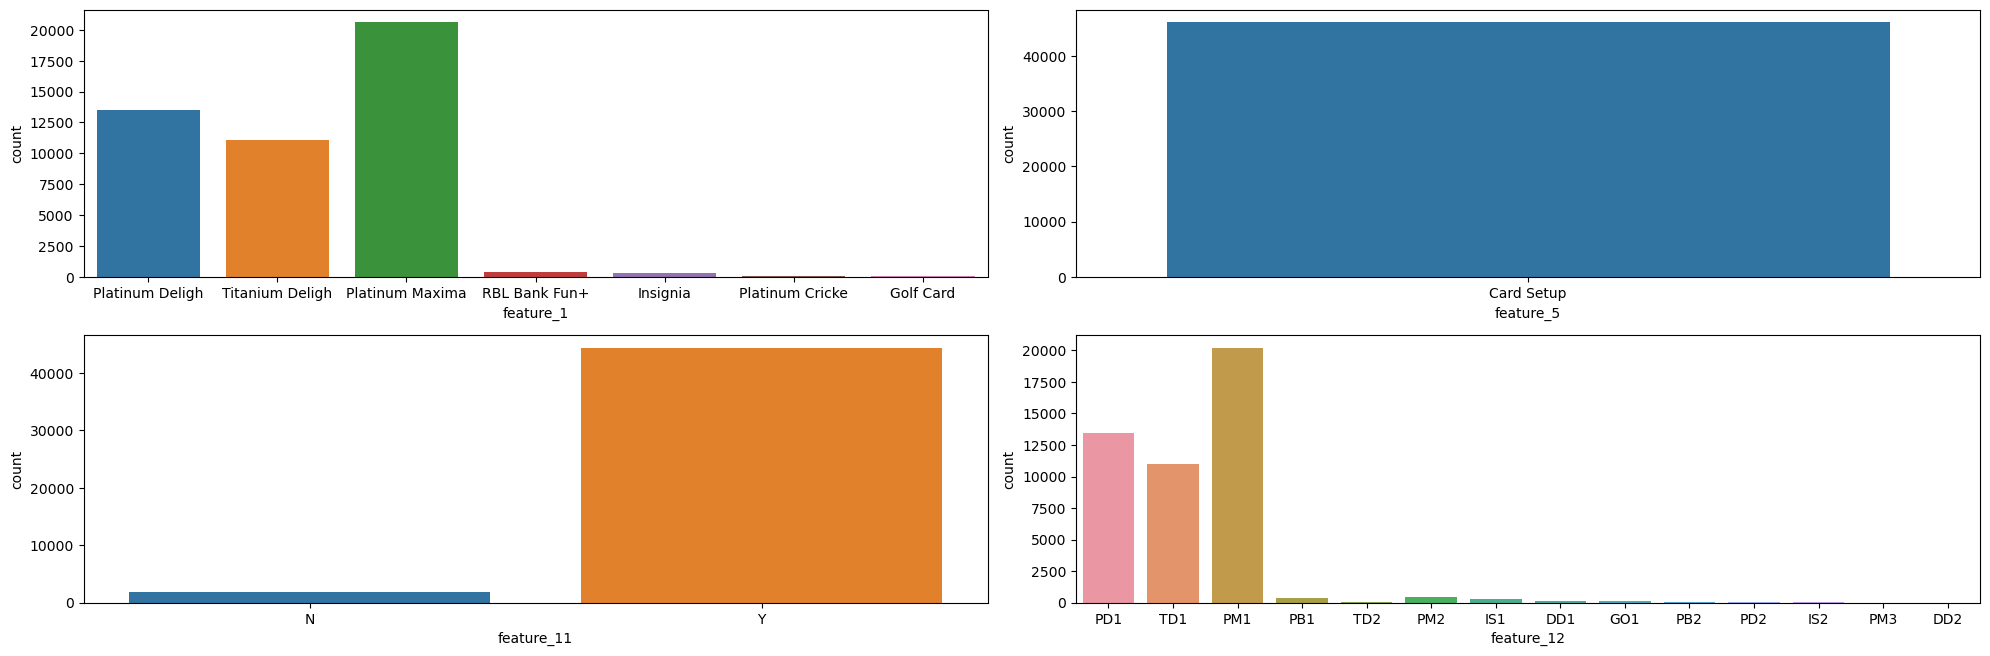

In [59]:
plt.figure(figsize = (20,16))
n = 1
for i in cat1:
    plt.subplot(5,2,n)
    sns.countplot(x = sample_data[i])
    n+=1
plt.tight_layout()
plt.show()

- in feature1 in platinum maxima curd the customers mostly these card and platinum deliligh also best but RBL bank fun it was usinng to rare
- the card set up it was to good ,90% above they are set up the card
- in feature_11 the majority of data in yes, but it have to much of minority data
- feature_11 the unique values 13 but the mostly data present in 3 values only but remaining have to many null values

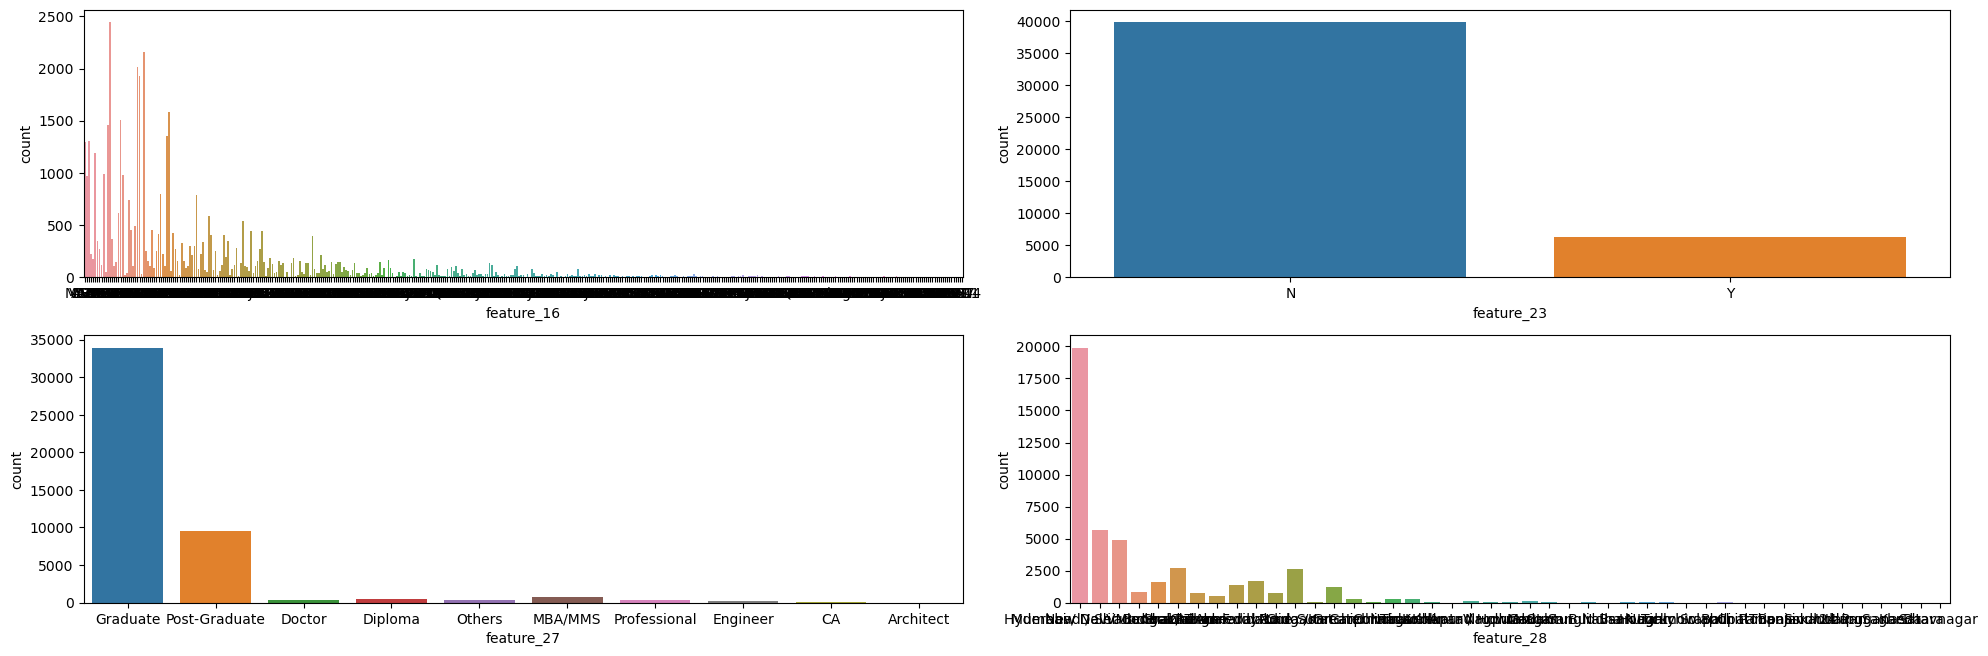

In [60]:
plt.figure(figsize = (20,16))
n = 1
for i in cat2:
    plt.subplot(5,2,n)
    sns.countplot(x = sample_data[i])
    n+=1
plt.tight_layout()
plt.show()

- in feature_16 the mostly data present in first phase and remaining phase it have less data
- the feature_23 the majority class is 70% No  the minority class is  30% yes
- feature_27 the mostly people are graduted and remaining the data other proffesions
- in feature_28 they are so many unique values are there the first few values it have data remaining to less


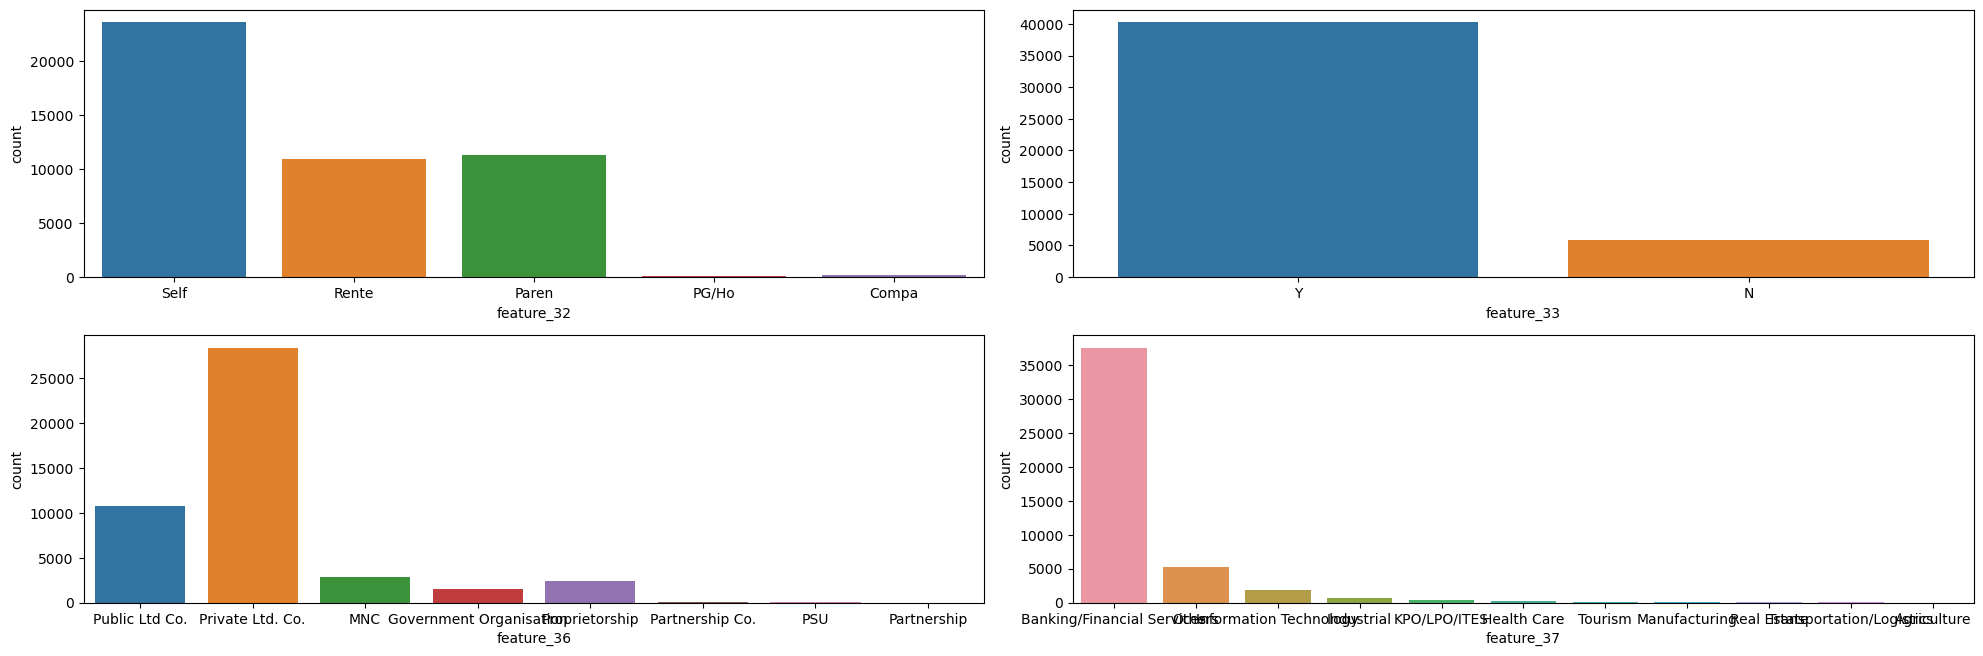

In [61]:
plt.figure(figsize = (20,16))
n = 1
for i in cat3:
    plt.subplot(5,2,n)
    sns.countplot(x = sample_data[i])
    n+=1
plt.tight_layout()
plt.show()

- in feature_32 the mostly persons staying self and parent and rental remaining it was to less
- feature_33 the majority class Yes and the minority class No
- the mostly employes is working in public ltd co. and private Ltd co.the remaining working peoples majority is less
- in feature_37 the majority of people are banking/financial

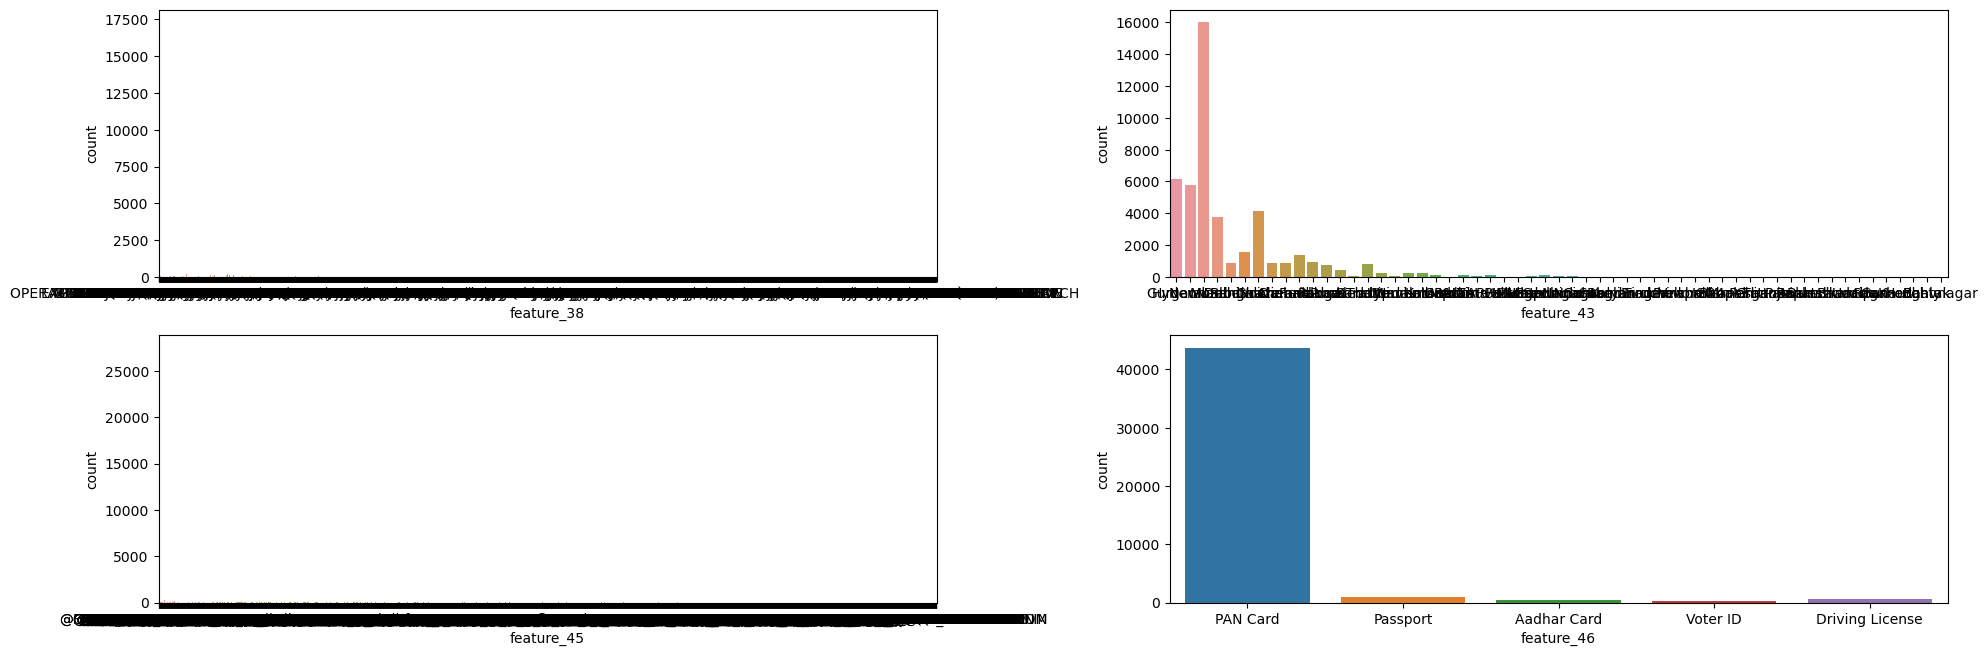

In [62]:
plt.figure(figsize = (20,16))
n = 1
for i in cat4:
    plt.subplot(5,2,n)
    sns.countplot(x = sample_data[i])
    n+=1
plt.tight_layout()
plt.show()

- feature_43 the mainly data present first phase remaing there is no data
- feature_46 the identification proof mainly it taking pan card and remaining to less

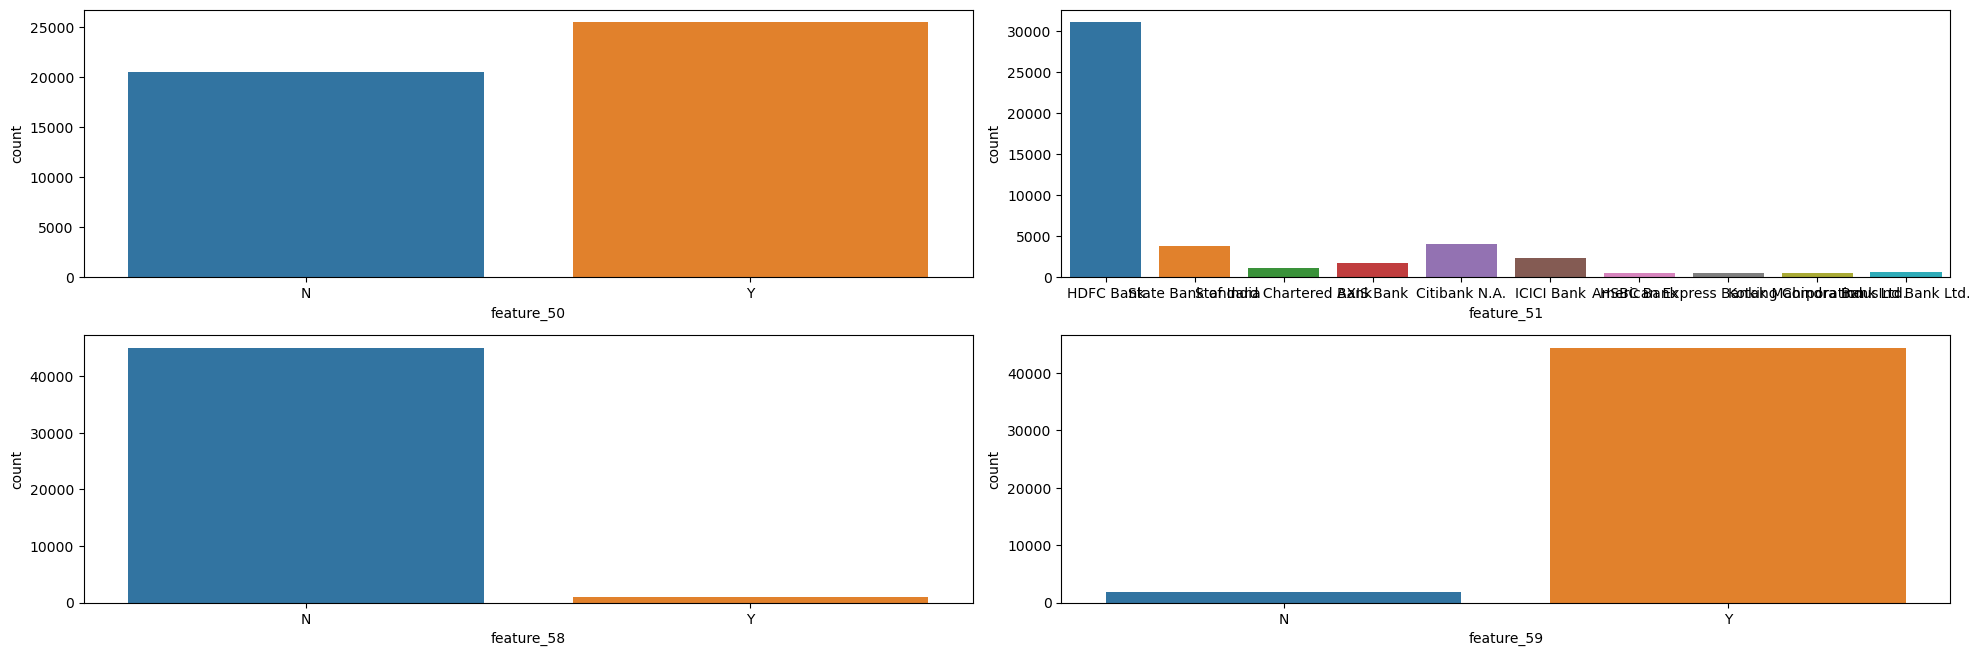

In [63]:
plt.figure(figsize = (20,16))
n = 1
for i in cat5:
    plt.subplot(5,2,n)
    sns.countplot(x = sample_data[i])
    n+=1
plt.tight_layout()
plt.show()

- the feature_50 the majority class is 40% No the minority class is 60% yes
- the feature_51 the majority Hdfc bank remaining banks are to less
- the feature_58 the majority class is 95% No the minority class is 5% yes
- the feature_59 the majority class is 5% No the minority class is 95% yes

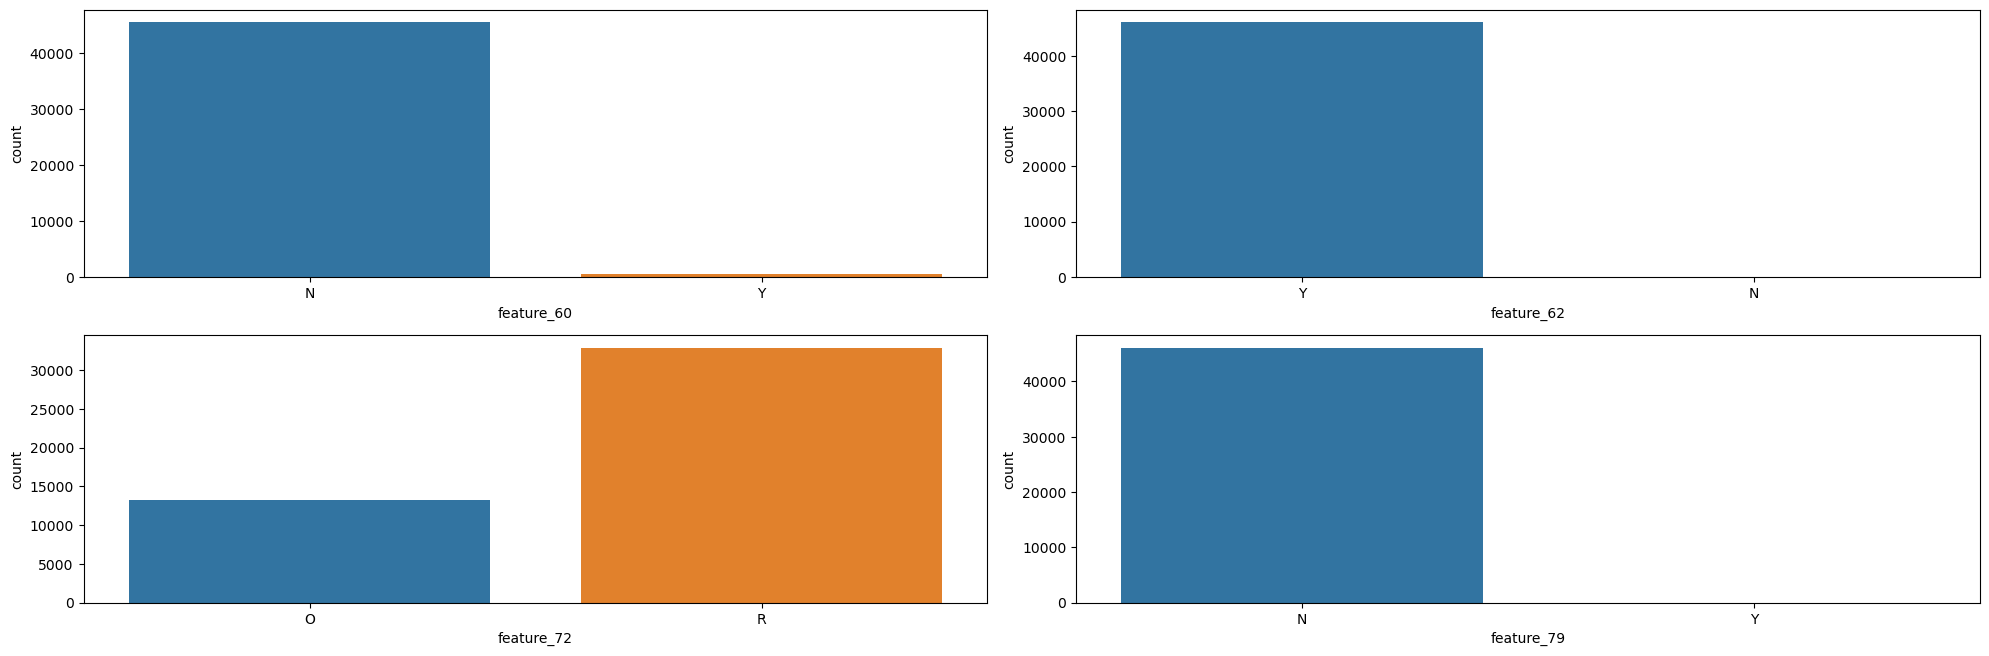

In [64]:
plt.figure(figsize = (20,16))
n = 1
for i in cat6:
    plt.subplot(5,2,n)
    sns.countplot(x = sample_data[i])
    n+=1
plt.tight_layout()
plt.show()

- the feature_60 the majority class is 90% No the minority class is 10% yes
- the feature_62 the majority class is 100% yes the minority class is 0% no we want handle the column
- the feature_50 the majority class is 30% O the minority class is 70% R
- the feature_50 the majority class is 100% No the minority class is 0% yes

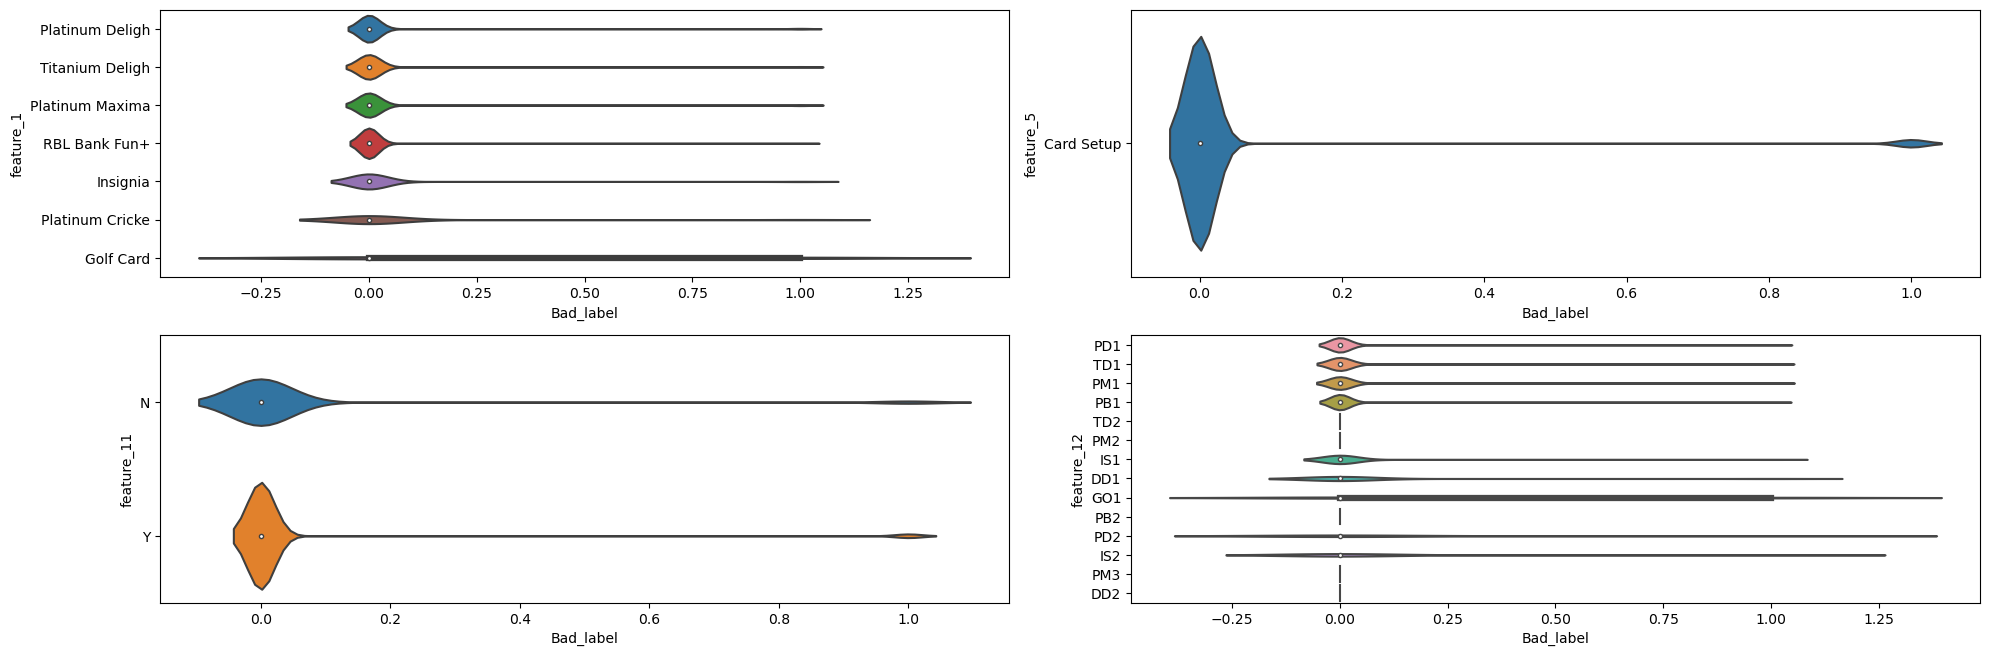

In [65]:
plt.figure(figsize = (20,16))
n = 1
for i in cat1:
    plt.subplot(5,2,n)
    sns.violinplot(y = sample_data[i] ,x = sample_data["Bad_label"])
    n+=1
plt.tight_layout()
plt.show()

- in feature1 in platinum maxima curd the customers mostly these card and platinum deliligh also best but RBL bank fun it was usinng to rare
- he card set up it was to good ,90% above they are set up the card
- in feature_11 the majority of data in yes, but it have to much of minority data
- feature_11 the unique values 13 but the mostly data present in 3 values only but remaining have to many null values

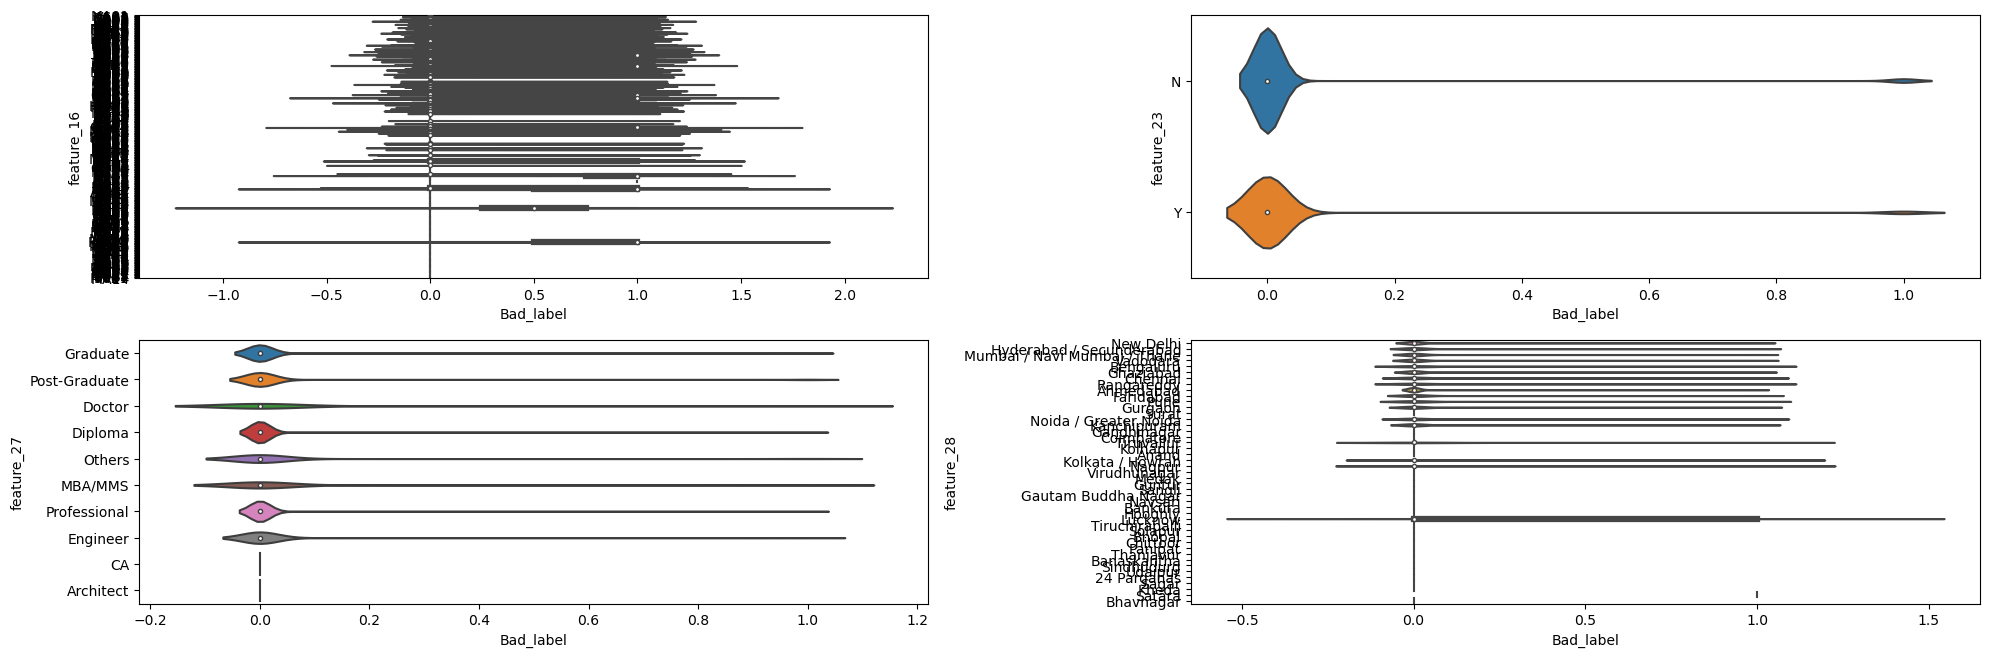

In [66]:
plt.figure(figsize = (20,16))
n = 1
for i in cat2:
    plt.subplot(5,2,n)
    sns.violinplot(y = sample_data[i] ,x = sample_data["Bad_label"])
    n+=1
plt.tight_layout()
plt.show()

- feature_27 the mostly people are graduted and remaining the data other proffesions
- the feature_23 the majority class is 70% No the minority class is 30% yes

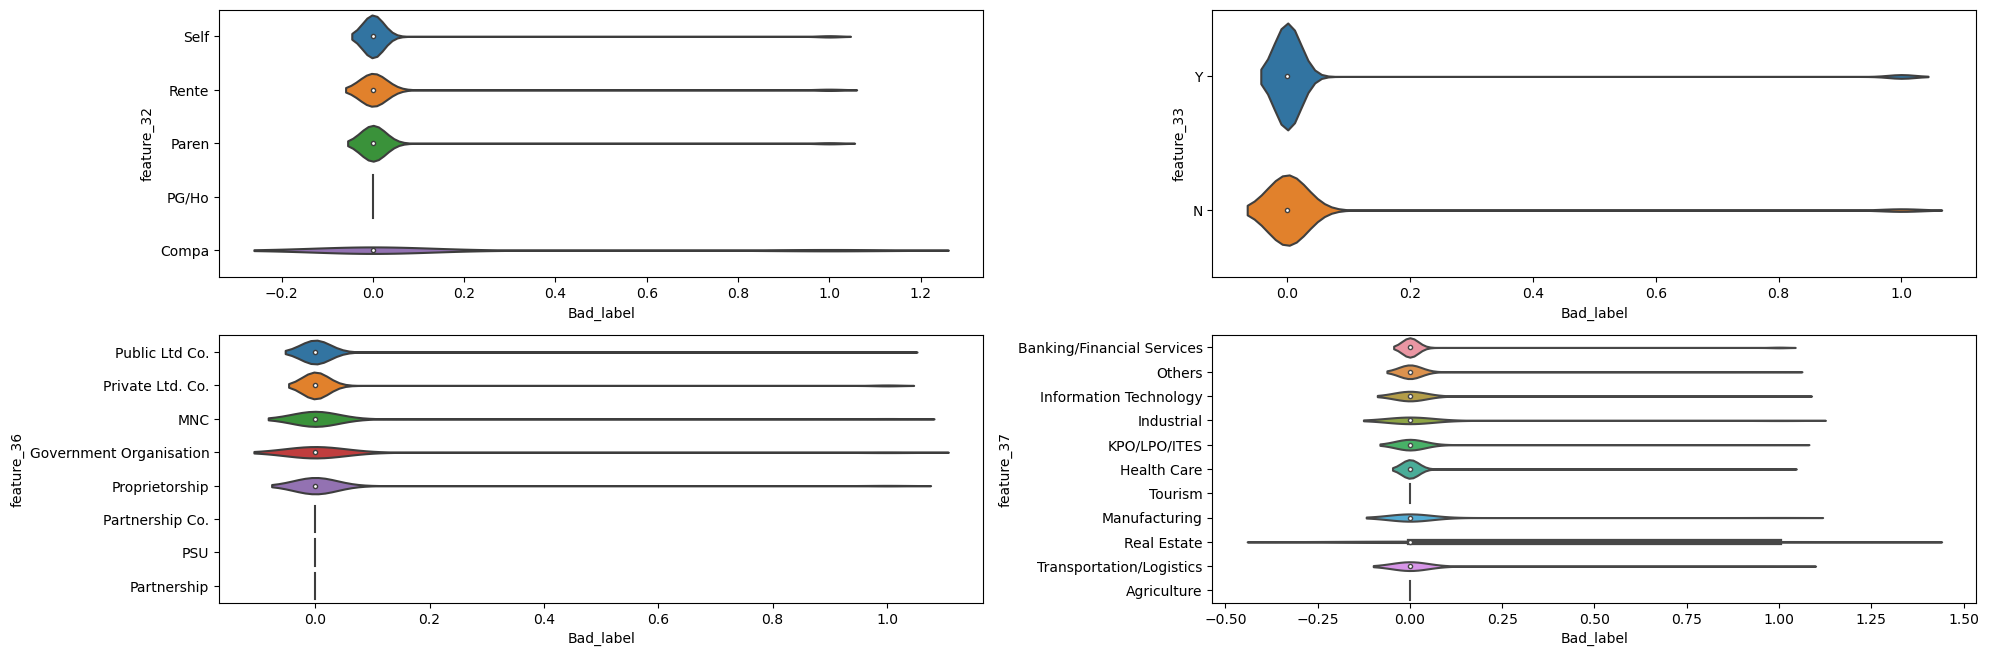

In [67]:
plt.figure(figsize = (20,16))
n = 1
for i in cat3:
    plt.subplot(5,2,n)
    sns.violinplot(y = sample_data[i] ,x = sample_data["Bad_label"])
    n+=1
plt.tight_layout()
plt.show()

- in feature_32 the mostly persons staying self and parent and rental remaining it was to less
- feature_33 the majority class Yes and the minority class No
- the mostly employes is working in public ltd co. and private Ltd co.the remaining working peoples majority is less
- in feature_37 the majority of people are banking/financial

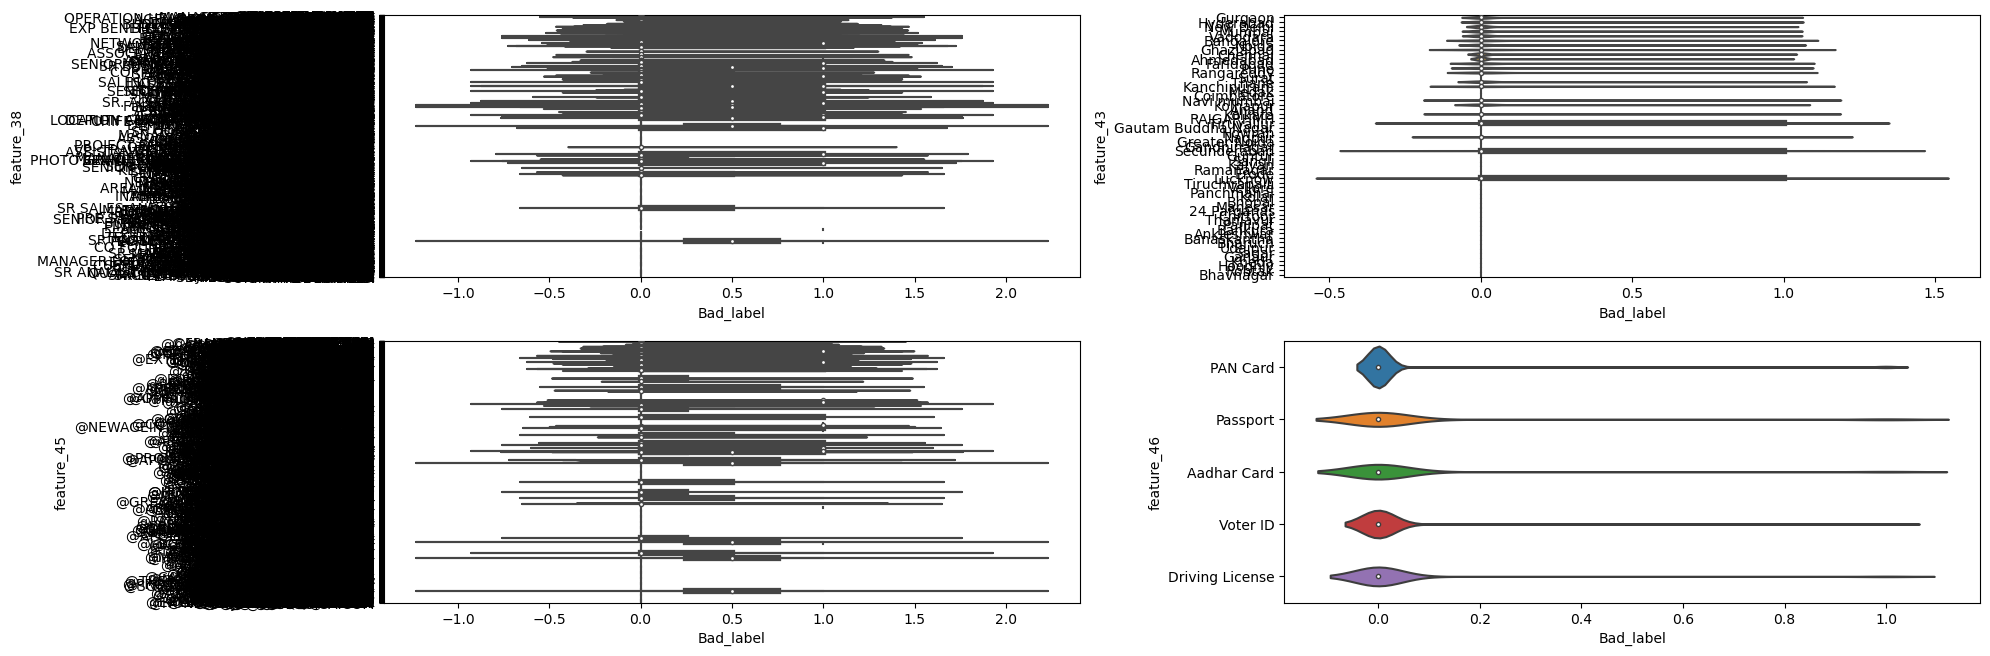

In [68]:
plt.figure(figsize = (20,16))
n = 1
for i in cat4:
    plt.subplot(5,2,n)
    sns.violinplot(y = sample_data[i] ,x = sample_data["Bad_label"])
    n+=1
plt.tight_layout()
plt.show()

- feature_46 the identification proof mainly it taking pan card and remaining to less

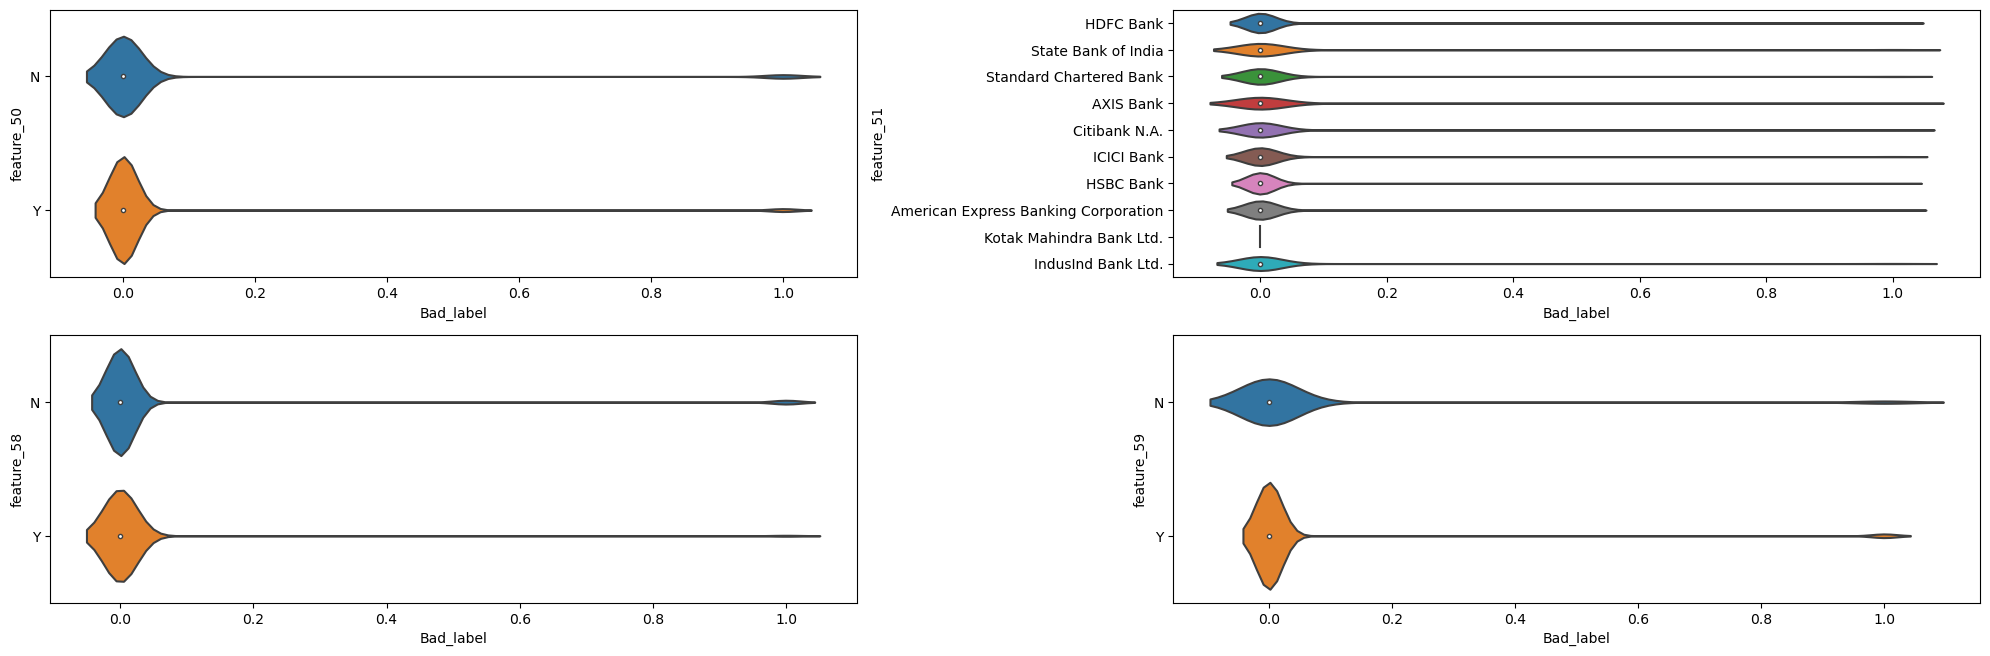

In [69]:
plt.figure(figsize = (20,16))
n = 1
for i in cat5:
    plt.subplot(5,2,n)
    sns.violinplot(y = sample_data[i] ,x = sample_data["Bad_label"])
    n+=1
plt.tight_layout()
plt.show()

- the feature_50 the majority class is 40% No the minority class is 60% yes
- the feature_51 the majority Hdfc bank remaining banks are to less
- the feature_58 the majority class is 95% No the minority class is 5% yes
- the feature_59 the majority class is 5% No the minority class is 95% yes

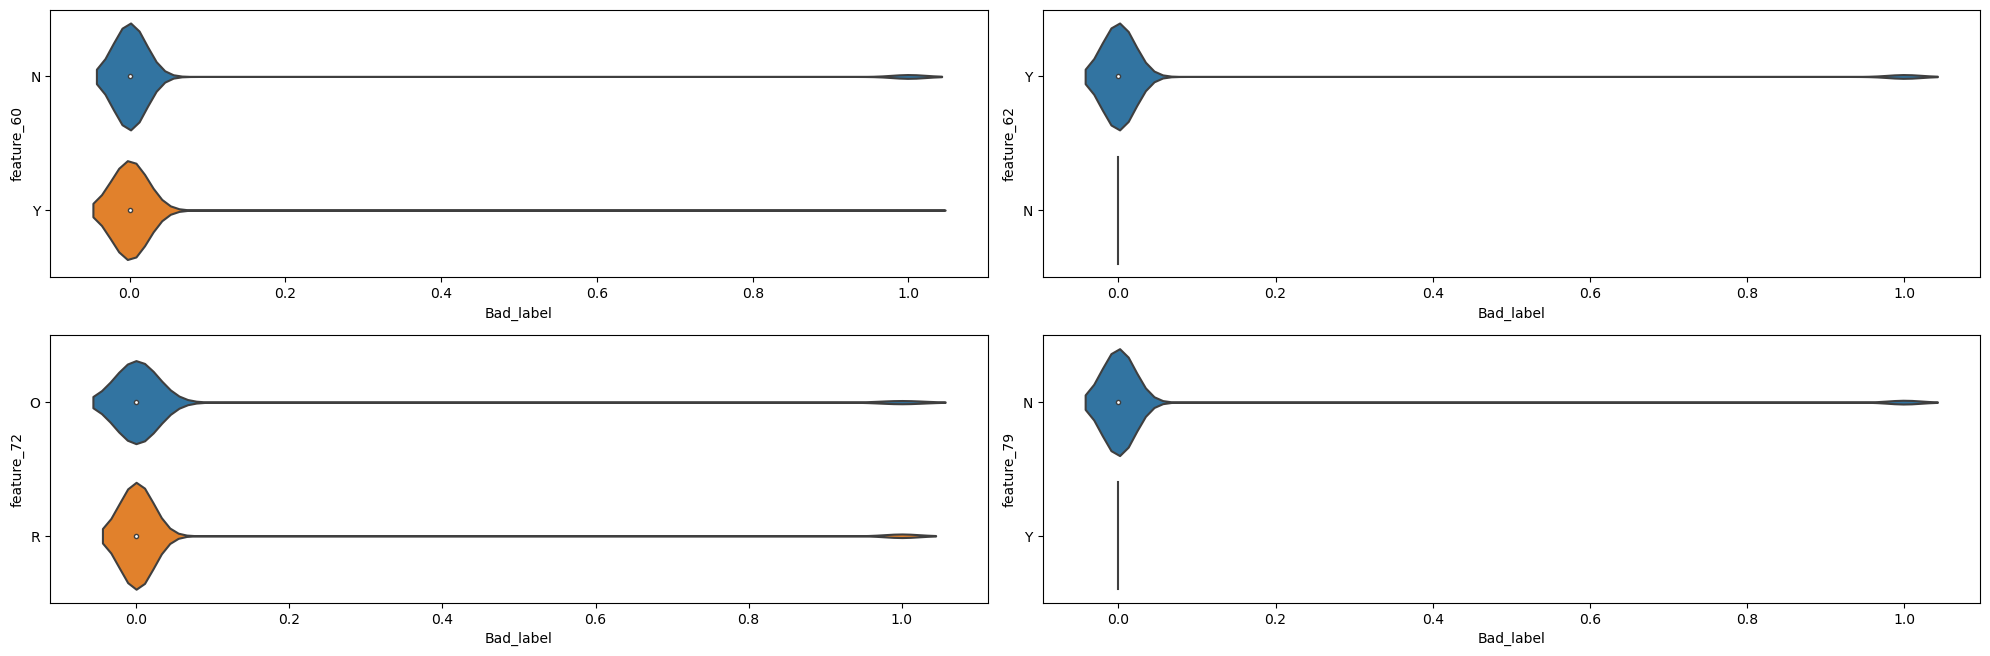

In [70]:
plt.figure(figsize = (20,16))
n = 1
for i in cat6:
    plt.subplot(5,2,n)
    sns.violinplot(y = sample_data[i] ,x = sample_data["Bad_label"])
    n+=1
plt.tight_layout()
plt.show()

- feature_60 the majority class and minority classes are uniuque values are equal percentage
- feature_62 the majority class above 95% and minority class are below 5%
- feature_72 the majority class and minority classes are equal data point
- feature_79 the majority class above 95% and minority class are below 5%


# Feature engineering

In [71]:
data.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0  26-Oct-15        20219  10-Sep-15          6            1  20-May-15   
1  27-Aug-15         8497  13-Aug-15          4            1  29-Jun-12   
2  17-Jul-15         7705  13-Jul-15          0            1  26-Dec-13   
3  16-Dec-15        13921  19-Nov-15          6            1  19-Sep-13   
4  16-Sep-15         9182  10-Sep-15         10            1  29-Apr-05   

  last_paymt_dt reporting_dt  high_credit_amt  cur_balance_amt  \
0     02-Jul-15    31-Jul-15          29500.0            17700   
1     04-Sep-12    05-Jun-14         120000.0                0   
2     15-May-15    31-May-15          66595.0             4885   
3     02-Jan-15    31-Jul-15          30900.0                0   
4     05-Mar-15    31-Jan-11          18700.0                0   

                                     paymenthistory1 paymt_str_dt  \
0                                    """000000000"""    01-Jul-15   
1                                 """000STDSTDSTD"""    01-Sep-12   
2  """STDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDS...    01-May-15   
3  """000XXXXXXXXXXXX0000000000000000000000000000...    01-Jul-15   
4                                 """000XXXXXX000"""    01-Jun-09   

  paymt_end_dt entry_time        feature_1  feature_2  feature_3  feature_4  \
0    01-May-15  08-Sep-15  Platinum Deligh  09-Sep-15      729.0        1.0   
1    01-Jun-12  11-Aug-15  Platinum Maxima  11-Aug-15      760.0        3.0   
2    01-Dec-13  09-Jul-15  Platinum Maxima  09-Jul-15      734.0        1.0   
3    01-Sep-13  18-Nov-15  Platinum Maxima  18-Nov-15      686.0        3.0   
4    01-Mar-09  09-Sep-15  Platinum Maxima  09-Sep-15      757.0        1.0   

    feature_5  feature_6  feature_7 feature_11 feature_12  feature_14  \
0  Card Setup       14.0    89000.0          Y        PD1        12.0   
1  Card Setup       14.0   202000.0          Y        PM1        12.0   
2  Card Setup       14.0   120000.0          Y        PM1        12.0   
3  Card Setup       14.0    76000.0          Y        PM1        12.0   
4  Card Setup       14.0   416000.0          Y        PM1         0.0   

  feature_15 feature_16  feature_19  feature_20 feature_21  feature_22  \
0       SA03       S002         1.0  BOIPKXXXXX  05-May-90  97176XXXXX   
1       SA03       AS16         1.0  AEYPKXXXXX  16-Aug-74  98739XXXXX   
2       HA06       S203         1.0  AUDPKXXXXX  20-Oct-82  99662XXXXX   
3       AM01       SP01         1.0  AGMPTXXXXX  22-Aug-84  99986XXXXX   
4       MA25       TMS1         1.0  ABDPAXXXXX  10-Apr-60  94030XXXXX   

  feature_23     feature_24  feature_25  feature_26     feature_27  \
0          N   @OUTLOOK.COM         1.0         0.0       Graduate   
1          N   @YAHOO.CO.IN         1.0         0.0  Post-Graduate   
2          N     @GMAIL.COM         1.0         3.0       Graduate   
3          N     @GMAIL.COM         1.0         0.0       Graduate   
4          N  @VIDARBHA.ORG         1.0         0.0       Graduate   

                     feature_28  feature_29  feature_30  feature_31  \
0                     New Delhi    110009.0      2009.0         0.0   
1                     New Delhi    110032.0      1985.0         0.0   
2      Hyderabad / Secunderabad    500008.0      2013.0         0.0   
3                     Ahmedabad    380001.0      2000.0         1.0   
4  Mumbai / Navi Mumbai / Thane    400072.0      2011.0         0.0   

  feature_32 feature_33  feature_34  feature_35        feature_36  \
0      Rente          N         1.0         1.0               MNC   
1       Self          Y         2.0     50000.0  Private Ltd. Co.   
2       Self          Y         1.0     30000.0    Public Ltd Co.   
3      Paren          Y         1.0         1.0    Proprietorship   
4       Self          Y         2.0     45000.0  Private Ltd. Co.   

                   feature_37     feature_38  feature_39  feature_40  \
0  Banking/Financial Services        MANAGER  

In [72]:
data.drop(["feature_5","feature_6","feature_54"],axis=1,inplace=True) #drop the unnecessary columns an data 

<Axes: >

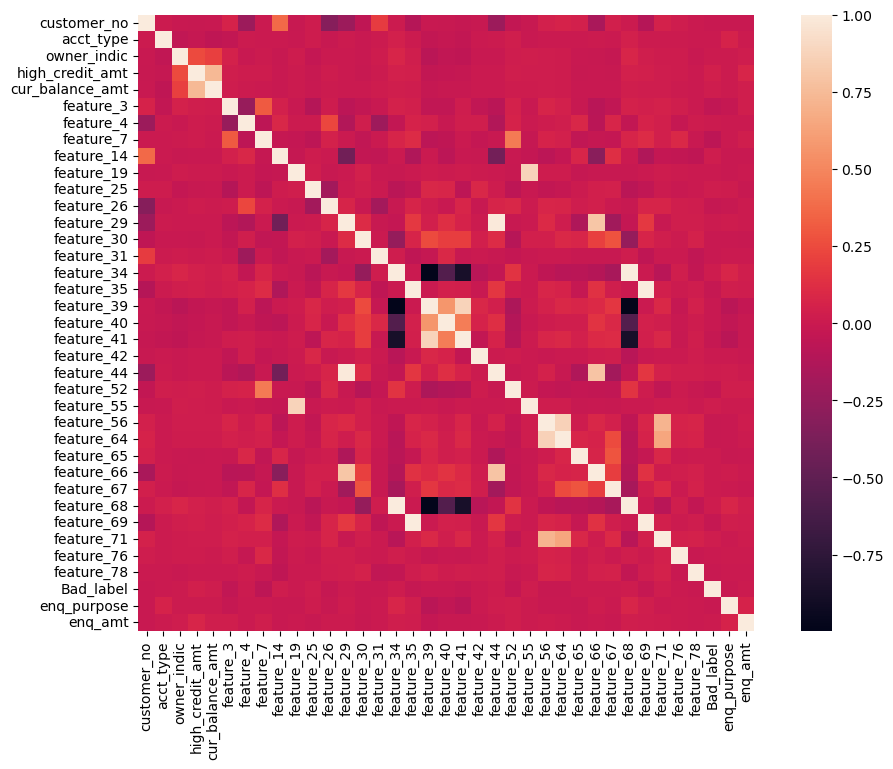

In [73]:
corr_matrix = data.select_dtypes(include=np.number).corr() #correlation between numerical data set
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, square=True)

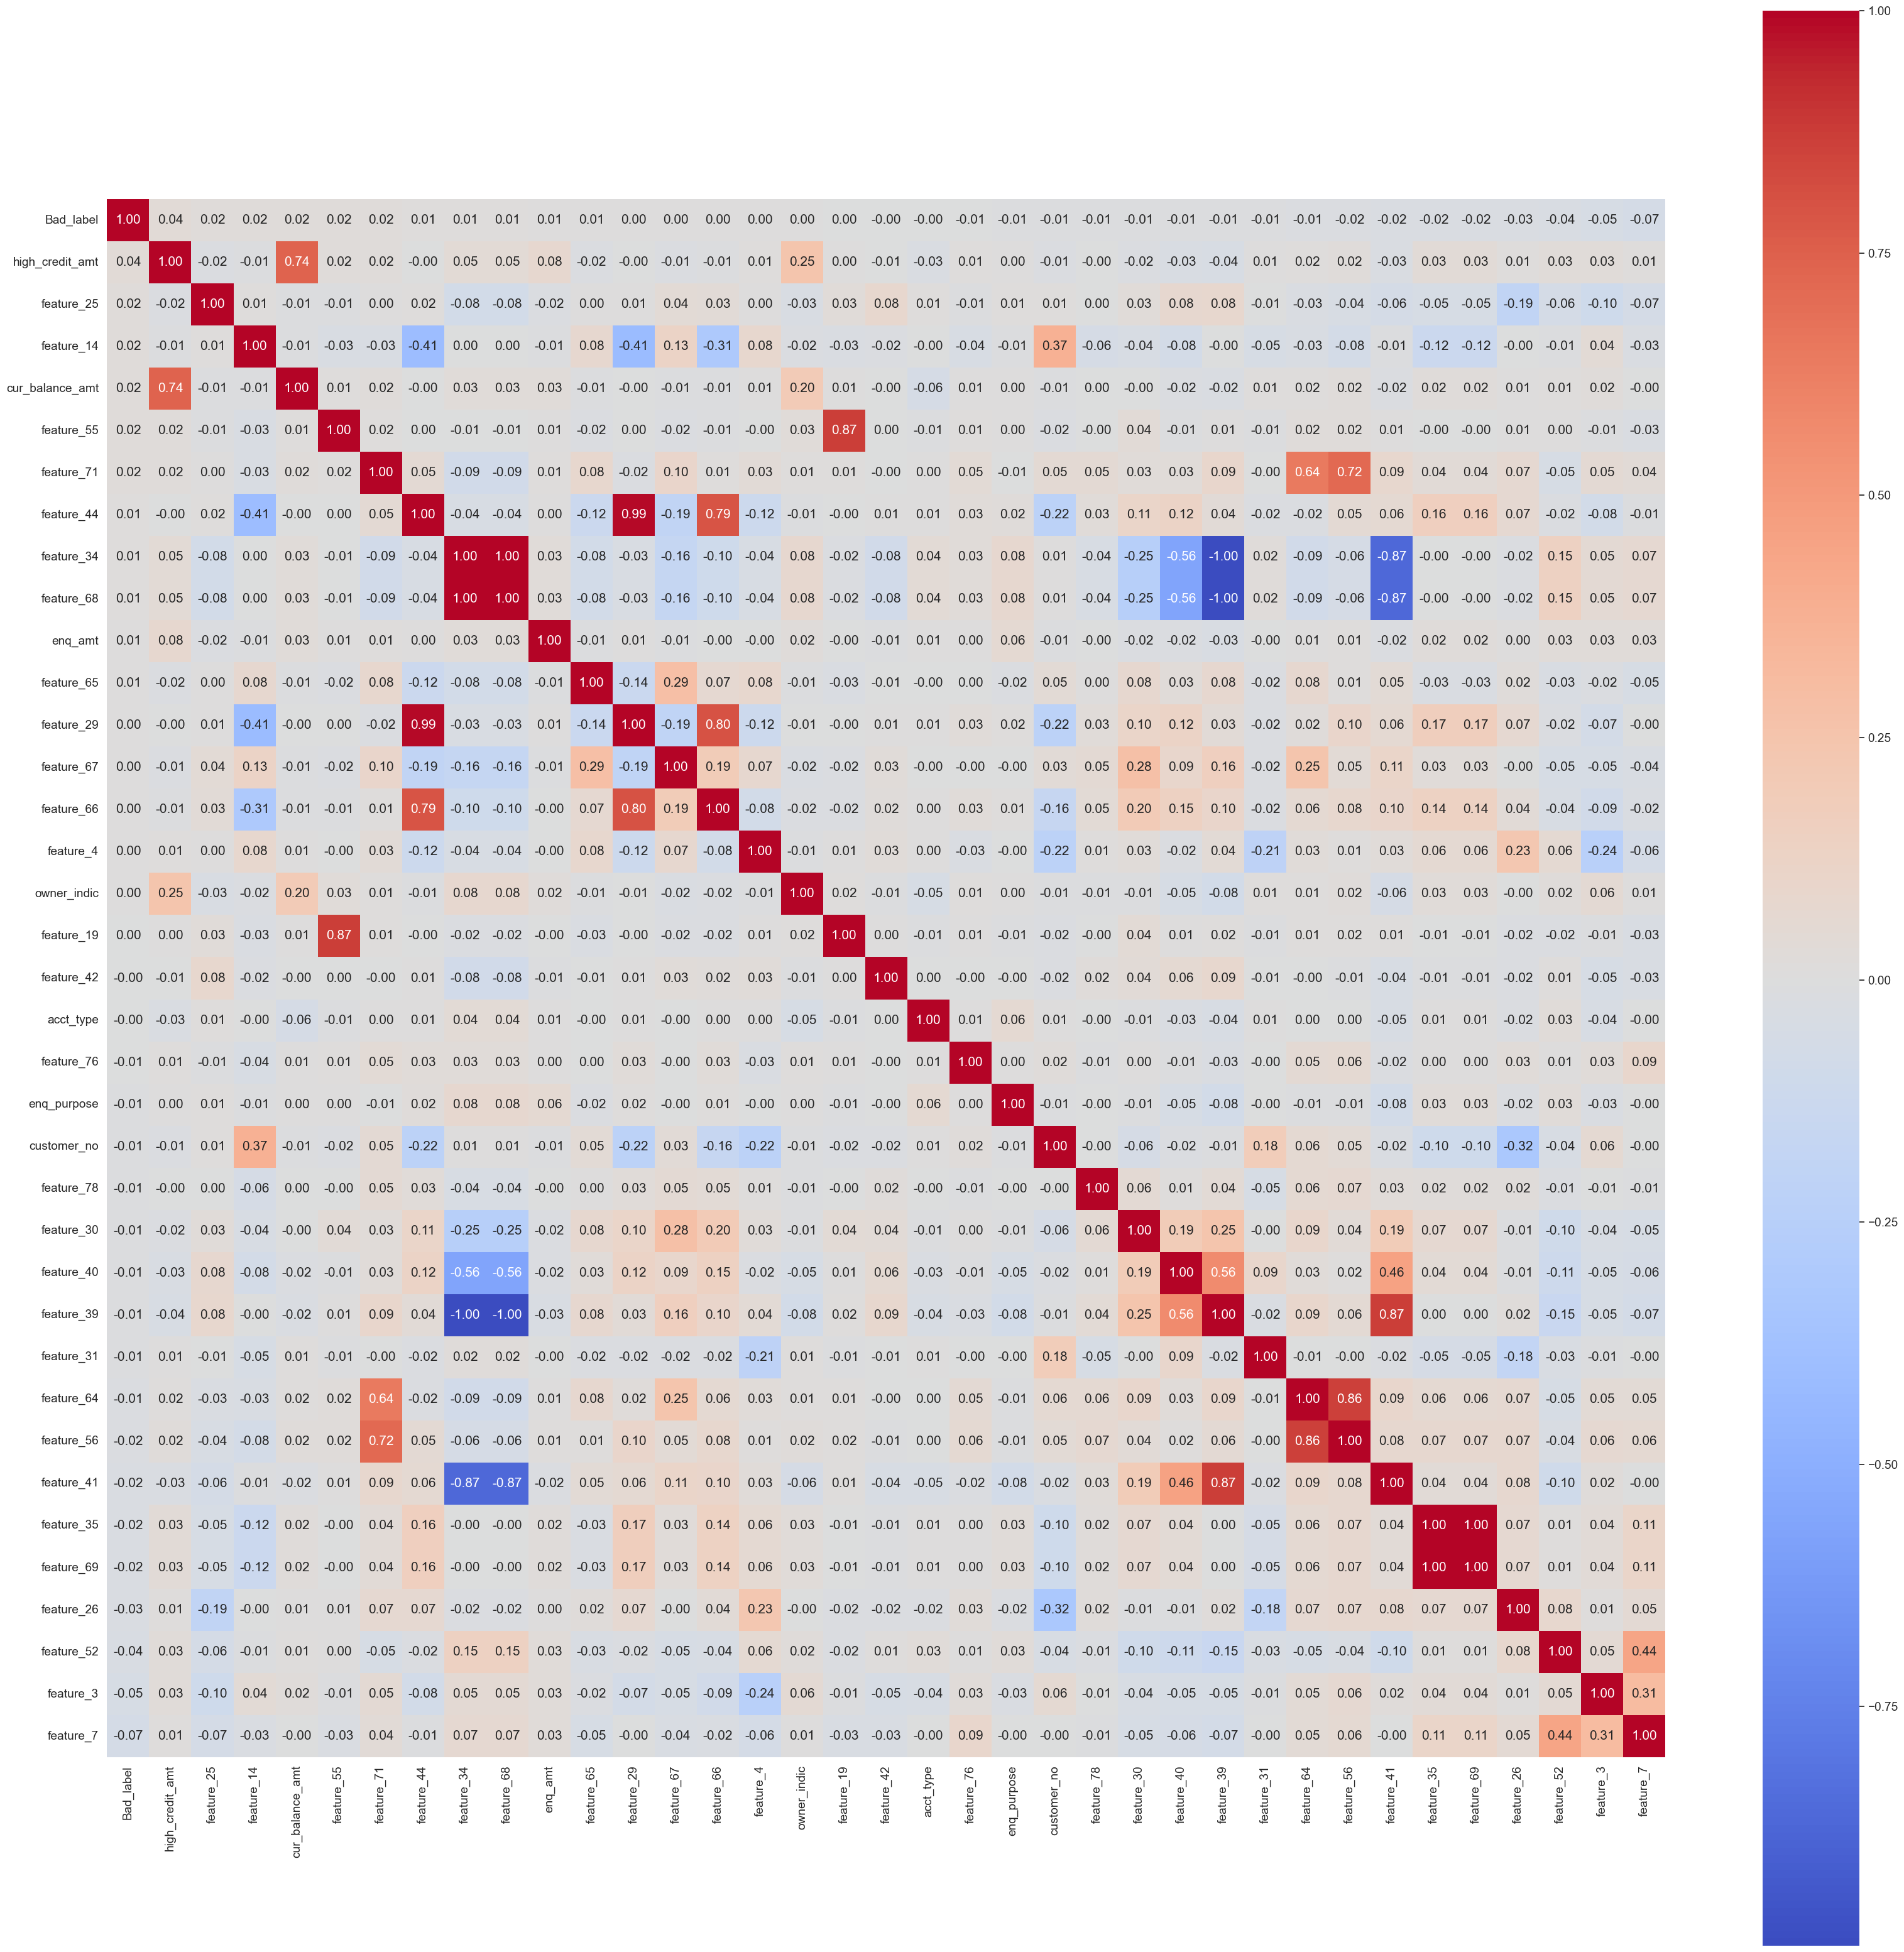

In [74]:
columns = corr_matrix.sort_values('Bad_label', ascending=False).index #drop the highly corelated columns an data
columns = list(columns) #convert index value to list

correlation_matrix_zoom = data[columns].corr()

plt.figure(figsize=(40,40)) 
sns.set(font_scale=1.25)
sns.heatmap(correlation_matrix_zoom, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=columns, xticklabels=columns, cmap="coolwarm")
plt.show()

In [75]:
#This function made for finding the high correlation
def correlation(dataset,threhold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threhold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [76]:
corr_features = correlation(num_col,0.80) # find the high correlation above 80%
corr_features = list(corr_features)
corr_features

['feature_41',
 'feature_55',
 'feature_69',
 'feature_44',
 'feature_64',
 'feature_68',
 'feature_39']

In [77]:
data.drop(corr_features,axis=1,inplace=True) #drop the all corelated columns

In [78]:
data.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0  26-Oct-15        20219  10-Sep-15          6            1  20-May-15   
1  27-Aug-15         8497  13-Aug-15          4            1  29-Jun-12   
2  17-Jul-15         7705  13-Jul-15          0            1  26-Dec-13   
3  16-Dec-15        13921  19-Nov-15          6            1  19-Sep-13   
4  16-Sep-15         9182  10-Sep-15         10            1  29-Apr-05   

  last_paymt_dt reporting_dt  high_credit_amt  cur_balance_amt  \
0     02-Jul-15    31-Jul-15          29500.0            17700   
1     04-Sep-12    05-Jun-14         120000.0                0   
2     15-May-15    31-May-15          66595.0             4885   
3     02-Jan-15    31-Jul-15          30900.0                0   
4     05-Mar-15    31-Jan-11          18700.0                0   

                                     paymenthistory1 paymt_str_dt  \
0                                    """000000000"""    01-Jul-15   
1                                 """000STDSTDSTD"""    01-Sep-12   
2  """STDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDS...    01-May-15   
3  """000XXXXXXXXXXXX0000000000000000000000000000...    01-Jul-15   
4                                 """000XXXXXX000"""    01-Jun-09   

  paymt_end_dt entry_time        feature_1  feature_2  feature_3  feature_4  \
0    01-May-15  08-Sep-15  Platinum Deligh  09-Sep-15      729.0        1.0   
1    01-Jun-12  11-Aug-15  Platinum Maxima  11-Aug-15      760.0        3.0   
2    01-Dec-13  09-Jul-15  Platinum Maxima  09-Jul-15      734.0        1.0   
3    01-Sep-13  18-Nov-15  Platinum Maxima  18-Nov-15      686.0        3.0   
4    01-Mar-09  09-Sep-15  Platinum Maxima  09-Sep-15      757.0        1.0   

   feature_7 feature_11 feature_12  feature_14 feature_15 feature_16  \
0    89000.0          Y        PD1        12.0       SA03       S002   
1   202000.0          Y        PM1        12.0       SA03       AS16   
2   120000.0          Y        PM1        12.0       HA06       S203   
3    76000.0          Y        PM1        12.0       AM01       SP01   
4   416000.0          Y        PM1         0.0       MA25       TMS1   

   feature_19  feature_20 feature_21  feature_22 feature_23     feature_24  \
0         1.0  BOIPKXXXXX  05-May-90  97176XXXXX          N   @OUTLOOK.COM   
1         1.0  AEYPKXXXXX  16-Aug-74  98739XXXXX          N   @YAHOO.CO.IN   
2         1.0  AUDPKXXXXX  20-Oct-82  99662XXXXX          N     @GMAIL.COM   
3         1.0  AGMPTXXXXX  22-Aug-84  99986XXXXX          N     @GMAIL.COM   
4         1.0  ABDPAXXXXX  10-Apr-60  94030XXXXX          N  @VIDARBHA.ORG   

   feature_25  feature_26     feature_27                    feature_28  \
0         1.0         0.0       Graduate                     New Delhi   
1         1.0         0.0  Post-Graduate                     New Delhi   
2         1.0         3.0       Graduate      Hyderabad / Secunderabad   
3         1.0         0.0       Graduate                     Ahmedabad   
4         1.0         0.0       Graduate  Mumbai / Navi Mumbai / Thane   

   feature_29  feature_30  feature_31 feature_32 feature_33  feature_34  \
0    110009.0      2009.0         0.0      Rente          N         1.0   
1    110032.0      1985.0         0.0       Self          Y         2.0   
2    500008.0      2013.0         0.0       Self          Y         1.0   
3    380001.0      2000.0         1.0      Paren          Y         1.0   
4    400072.0      2011.0         0.0       Self          Y         2.0   

   feature_35        feature_36                  feature_37     feature_38  \
0         1.0               MNC  Banking/Financial Services        MANAGER   
1     50000.0  Private Ltd. Co.  Banking/Financial Services        MANAGER   
2     30000.0    Public Ltd Co.  Banking/Financial Services  SALES MANAGER   
3         1.0    Proprietorship                      Others        MANAGER   
4     45000.0  Private Ltd. Co.  Banking/Financial Services        MANAGER   

In [79]:
num_col = data.select_dtypes(np.number)

In [80]:
num_col

customer_no  acct_type  owner_indic  high_credit_amt  cur_balance_amt  \
0             20219          6            1          29500.0            17700   
1              8497          4            1         120000.0                0   
2              7705          0            1          66595.0             4885   
3             13921          6            1          30900.0                0   
4              9182         10            1          18700.0                0   
...             ...        ...          ...              ...              ...   
460442         1158         10            1         140849.0            83251   
460443         2830         10            1          23124.0                0   
460444         1834          5            1          50000.0                0   
460445        19123         10            1          10864.0                4   
460446         3778         10            1          30074.0              591   

        feature_3  feature_4  feature_7  feature_14  feature_19  feature_25  \
0           729.0        1.0    89000.0        12.0         1.0         1.0   
1           760.0        3.0   202000.0        12.0         1.0         1.0   
2           734.0        1.0   120000.0        12.0         1.0         1.0   
3           686.0        3.0    76000.0        12.0         1.0         1.0   
4           757.0        1.0   416000.0         0.0         1.0         1.0   
...           ...        ...        ...         ...         ...         ...   
460442      723.0        2.0    48000.0         0.0         1.0         1.0   
460443      698.0        3.0    57000.0        12.0         1.0         1.0   
460444      752.0        3.0   107000.0        12.0         1.0         1.0   
460445      713.0        3.0    62000.0        12.0         1.0         1.0   
460446      683.0        3.0   146000.0         0.0         1.0         2.0   

        feature_26  feature_29  feature_30  feature_31  feature_34  \
0              0.0    110009.0      2009.0         0.0         1.0   
1              0.0    110032.0      1985.0         0.0         2.0   
2              3.0    500008.0      2013.0         0.0         1.0   
3              0.0    380001.0      2000.0         1.0         1.0   
4              0.0    400072.0      2011.0         0.0         2.0   
...            ...         ...         ...         ...         ...   
460442         2.0    500085.0      2015.0         0.0         1.0   
460443         2.0    110018.0      2011.0         0.0         1.0   
460444         2.0    201010.0      1975.0         0.0         1.0   
460445         0.0    201011.0      2011.0         0.0         1.0   
460446         2.0    500020.0      1991.0         0.0         2.0   

        feature_35  feature_40  feature_42  feature_52  feature_56  \
0              1.0         1.0         0.0         0.0        10.0   
1          50000.0         0.0         0.0    155000.0        10.0   
2          30000.0         4.0         0.0    195000.0         2.0   
3              1.0         1.0         0.0         0.0        12.0   
4          45000.0         0.0         0.0    320000.0        21.0   
...            ...         ...         ...         ...         ...   
460442     31975.0        12.0         0.0         0.0         2.0   
460443     38010.0         3.0         0.0         0.0        10.0   
460444     35545.0        11.0         0.0         0.0        33.0   
460445     48900.0         1.0         0.0         0.0        33.0   
460446     40000.0         0.0         0.0    162000.0         2.0   

        feature_65  feature_66  feature_67  feature_71  feature_76  \
0            683.0    854105.0         1.0        10.0         0.0   
1            157.0    110032.0         0.0        10.0         0.0   
2             14.0    500008.0         0.0         2.0         0.0   
3              8.0    380001.0         0.0        12.0         0.0   
4             15.0    400072.0         0.0        21.0

In [81]:
cat_col = data.select_dtypes(include = "object")

In [82]:
from sklearn.preprocessing import LabelEncoder # convert the all categirical data into numerical data by using label encoder 
le = LabelEncoder() #label encoder is amodule to changing data all categirical data into numerical data by using label encoder 
for i in cat_col.columns:
    data[i] = le.fit_transform(data[i])
data.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0        160        20219         23          6            1       3897   
1        163         8497         27          4            1       5652   
2         96         7705         28          0            1       4982   
3         88        13921         42          6            1       3750   
4         94         9182         23         10            1       5552   

   last_paymt_dt  reporting_dt  high_credit_amt  cur_balance_amt  \
0            229          1783          29500.0            17700   
1            573           285         120000.0                0   
2           2130          1806          66595.0             4885   
3            218          1783          30900.0                0   
4            672          1767          18700.0                0   

   paymenthistory1  paymt_str_dt  paymt_end_dt  entry_time  feature_1  \
0                2           110           168          76          3   
1             9491           221           126          96          4   
2            13372           167            49          80          4   
3            10875           110           223         175          4   
4            10552           122           143          85          4   

   feature_2  feature_3  feature_4  feature_7  feature_11  feature_12  \
0         79      729.0        1.0    89000.0           1           7   
1         88      760.0        3.0   202000.0           1          10   
2         74      734.0        1.0   120000.0           1          10   
3        164      686.0        3.0    76000.0           1          10   
4         79      757.0        1.0   416000.0           1          10   

   feature_14  feature_15  feature_16  feature_19  feature_20  feature_21  \
0        12.0         294         416         1.0        7812        1446   
1        12.0         294         128         1.0        1395        4341   
2        12.0         182         421         1.0        5444        5583   
3        12.0          97         454         1.0        1850        5897   
4         0.0         231         477         1.0         412        2581   

   feature_22  feature_23  feature_24  feature_25  feature_26  feature_27  \
0        2136           0         391         1.0         0.0           5   
1        2590           0         585         1.0         0.0           8   
2        2986           0         185         1.0         3.0           5   
3        3137           0         185         1.0         0.0           5   
4        1560           0         559         1.0         0.0           5   

   feature_28  feature_29  feature_30  feature_31  feature_32  feature_33  \
0          38    110009.0      2009.0         0.0           3           0   
1          38    110032.0      1985.0         0.0           4           1   
2          23    500008.0      2013.0         0.0           4           1   
3           2    380001.0      2000.0         1.0           2           1   
4          35    400072.0      2011.0         0.0           4           1   

   feature_34  feature_35  feature_36  feature_37  feature_38  feature_40  \
0         1.0         1.0           1           1        2395         1.0   
1         2.0     50000.0           6           1        2395         0.0   
2         1.0     30000.0           8           1        3447         4.0   
3         1.0         1.0           7           7        2395         1.0   
4         2.0     45000.0           6           1        2395         0.0   

   feature_42  feature_43  feature_45  feature_46  feature_47  feature_50  \
0         0.0          46        1421           1        9565           0   
1         0.0          46        1421           2        1545           1   
2         0.0          30        1421           2        5524           1   
3         0.0           2        1421           2        1984           0   
4         0.0          42   

In [83]:
data

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0             160        20219         23          6            1       3897   
1             163         8497         27          4            1       5652   
2              96         7705         28          0            1       4982   
3              88        13921         42          6            1       3750   
4              94         9182         23         10            1       5552   
...           ...          ...        ...        ...          ...        ...   
460442          3         1158         25         10            1        711   
460443         57         2830         68         10            1       3802   
460444        104         1834         25          5            1       1280   
460445        192        19123         39         10            1       2544   
460446         19         3778         73         10            1       5972   

        last_paymt_dt  reporting_dt  high_credit_amt  cur_balance_amt  \
0                 229          1783          29500.0            17700   
1                 573           285         120000.0                0   
2                2130          1806          66595.0             4885   
3                 218          1783          30900.0                0   
4                 672          1767          18700.0                0   
...               ...           ...              ...              ...   
460442           3261          1794         140849.0            83251   
460443           1755           457          23124.0                0   
460444           1068          1766          50000.0                0   
460445            802          1026          10864.0                4   
460446           1953          1783          30074.0              591   

        paymenthistory1  paymt_str_dt  paymt_end_dt  entry_time  feature_1  \
0                     2           110           168          76          3   
1                  9491           221           126          96          4   
2                 13372           167            49          80          4   
3                 10875           110           223         175          4   
4                 10552           122           143          85          4   
...                 ...           ...           ...         ...        ...   
460442               11           148            14          73          6   
460443               14           167           148         249          6   
460444              364            85             8          64          6   
460445             4343            33            50         147          3   
460446             4732           110           184         266          6   

        feature_2  feature_3  feature_4  feature_7  feature_11  feature_12  \
0              79      729.0        1.0    89000.0           1           7   
1              88      760.0        3.0   202000.0           1          10   
2              74      734.0        1.0   120000.0           1          10   
3             164      686.0        3.0    76000.0           1          10   
4              79      757.0        1.0   416000.0           1          10   
...           ...        ...        ...        ...         ...         ...   
460442        168      723.0        2.0    48000.0           1          13   
460443        235      698.0        3.0    57000.0           1          13   
460444         59      752.0        3.0   107000.0           1          13   
460445        137      713.0        3.0    62000.0           1           7   
460446        252      683.0        3.0   146000.0           1          13   

        feature_14  feature_15  feature_16  feature_19  feature_20  \
0             12.0         294         416         1.0        7812   
1             12.0         294         128         1.0        1395   
2             12.0         182         421         1.0        5444   
3             12

In [84]:
# Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale_data = scale.fit_transform(data.drop("Bad_label",axis=1))

In [85]:
scale_data = pd.DataFrame(scale_data,columns=data.drop("Bad_label",axis=1).columns)

In [86]:
scale_data

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0        1.079855     1.400455  -0.660933  -0.418558    -0.227133   0.251405   
1        1.131488    -0.396640  -0.471013  -0.780100    -0.227133   1.254775   
2       -0.021658    -0.518062  -0.423533  -1.503185    -0.227133   0.871722   
3       -0.159347     0.434911   0.241187  -0.418558    -0.227133   0.167362   
4       -0.056080    -0.291623  -0.660933   0.304527    -0.227133   1.197603   
...           ...          ...        ...        ...          ...        ...   
460438  -1.622294    -1.521780  -0.565973   0.304527    -0.227133  -1.570099   
460439  -0.692892    -1.265446   1.475667   0.304527    -0.227133   0.197091   
460440   0.116031    -1.418142  -0.565973  -0.599329    -0.227133  -1.244790   
460441   1.630611     1.232428   0.098747   0.304527    -0.227133  -0.522134   
460442  -1.346915    -1.120109   1.713067   0.304527    -0.227133   1.437726   

        last_paymt_dt  reporting_dt  high_credit_amt  cur_balance_amt  \
0           -1.116364      0.621983        -0.131439        -0.084043   
1           -0.853768     -2.635601        -0.066907        -0.104730   
2            0.334786      0.672000        -0.104988        -0.099021   
3           -1.124761      0.621983        -0.130441        -0.104730   
4           -0.778195      0.587189        -0.139140        -0.104730   
...               ...           ...              ...              ...   
460438       1.198147      0.645904        -0.052041        -0.007428   
460439       0.048525     -2.261566        -0.135985        -0.104730   
460440      -0.475904      0.585015        -0.116821        -0.104730   
460441      -0.678958     -1.024206        -0.144727        -0.104725   
460442       0.199671      0.621983        -0.131030        -0.104039   

        paymenthistory1  paymt_str_dt  paymt_end_dt  entry_time  feature_1  \
0             -0.695378     -0.157717      0.745418   -0.914225  -1.012929   
1              1.045129      1.496708      0.117854   -0.676960  -0.148140   
2              1.756996      0.691853     -1.032679   -0.866772  -0.148140   
3              1.298987     -0.157717      1.567227    0.260236  -0.148140   
4              1.239741      0.021140      0.371868   -0.807456  -0.148140   
...                 ...           ...           ...         ...        ...   
460438        -0.693727      0.408663     -1.555649   -0.949815   1.581437   
460439        -0.693177      0.691853      0.446578    1.138116   1.581437   
460440        -0.628979     -0.530335     -1.645301   -1.056584   1.581437   
460441         0.100864     -1.305380     -1.017738   -0.071935  -1.012929   
460442         0.172216     -0.157717      0.984490    1.339791   1.581437   

        feature_2  feature_3  feature_4  feature_7  feature_11  feature_12  \
0       -0.889741   0.155620  -1.519145  -0.501140    0.198011   -1.158122   
1       -0.771792   1.077736   0.726657   0.670522    0.198011    0.108853   
2       -0.955268   0.304349  -1.519145  -0.179711    0.198011    0.108853   
3        0.224224  -1.123444   0.726657  -0.635933    0.198011    0.108853   
4       -0.889741   0.988499  -1.519145   2.889421    0.198011    0.108853   
...           ...        ...        ...        ...         ...         ...   
460438   0.276646  -0.022854  -0.396244  -0.926256    0.198011    1.375829   
460439   1.154712  -0.766496   0.726657  -0.832938    0.198011    1.375829   
460440  -1.151850   0.839771   0.726657  -0.314504    0.198011    1.375829   
460441  -0.129624  -0.320310   0.726657  -0.781095    0.198011   -1.158122   
460442   1.377505  -1.212681   0.726657   0.089875    0.198011    1.375829   

        feature_14  feature_15  feature_16  feature_19  feature_20  \
0         0.619765    0.593818    1.288136    -0.18146    1.613711   
1         0.619765    0.593818   -0.826439    -0.18146   -0.911797   
2         0.619765   -0.841204    1.324847    -0.18146    0.681748   
3         0.6197

In [87]:
data.to_csv("Scaled_data_client.csv",index=False)

In [88]:
data

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0             160        20219         23          6            1       3897   
1             163         8497         27          4            1       5652   
2              96         7705         28          0            1       4982   
3              88        13921         42          6            1       3750   
4              94         9182         23         10            1       5552   
...           ...          ...        ...        ...          ...        ...   
460442          3         1158         25         10            1        711   
460443         57         2830         68         10            1       3802   
460444        104         1834         25          5            1       1280   
460445        192        19123         39         10            1       2544   
460446         19         3778         73         10            1       5972   

        last_paymt_dt  reporting_dt  high_credit_amt  cur_balance_amt  \
0                 229          1783          29500.0            17700   
1                 573           285         120000.0                0   
2                2130          1806          66595.0             4885   
3                 218          1783          30900.0                0   
4                 672          1767          18700.0                0   
...               ...           ...              ...              ...   
460442           3261          1794         140849.0            83251   
460443           1755           457          23124.0                0   
460444           1068          1766          50000.0                0   
460445            802          1026          10864.0                4   
460446           1953          1783          30074.0              591   

        paymenthistory1  paymt_str_dt  paymt_end_dt  entry_time  feature_1  \
0                     2           110           168          76          3   
1                  9491           221           126          96          4   
2                 13372           167            49          80          4   
3                 10875           110           223         175          4   
4                 10552           122           143          85          4   
...                 ...           ...           ...         ...        ...   
460442               11           148            14          73          6   
460443               14           167           148         249          6   
460444              364            85             8          64          6   
460445             4343            33            50         147          3   
460446             4732           110           184         266          6   

        feature_2  feature_3  feature_4  feature_7  feature_11  feature_12  \
0              79      729.0        1.0    89000.0           1           7   
1              88      760.0        3.0   202000.0           1          10   
2              74      734.0        1.0   120000.0           1          10   
3             164      686.0        3.0    76000.0           1          10   
4              79      757.0        1.0   416000.0           1          10   
...           ...        ...        ...        ...         ...         ...   
460442        168      723.0        2.0    48000.0           1          13   
460443        235      698.0        3.0    57000.0           1          13   
460444         59      752.0        3.0   107000.0           1          13   
460445        137      713.0        3.0    62000.0           1           7   
460446        252      683.0        3.0   146000.0           1          13   

        feature_14  feature_15  feature_16  feature_19  feature_20  \
0             12.0         294         416         1.0        7812   
1             12.0         294         128         1.0        1395   
2             12.0         182         421         1.0        5444   
3             12

In [89]:
new_data = pd.concat([scale_data.reset_index(drop=True),data["Bad_label"].reset_index(drop=True)],axis=1)

In [90]:
new_data

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0        1.079855     1.400455  -0.660933  -0.418558    -0.227133   0.251405   
1        1.131488    -0.396640  -0.471013  -0.780100    -0.227133   1.254775   
2       -0.021658    -0.518062  -0.423533  -1.503185    -0.227133   0.871722   
3       -0.159347     0.434911   0.241187  -0.418558    -0.227133   0.167362   
4       -0.056080    -0.291623  -0.660933   0.304527    -0.227133   1.197603   
...           ...          ...        ...        ...          ...        ...   
460438  -1.622294    -1.521780  -0.565973   0.304527    -0.227133  -1.570099   
460439  -0.692892    -1.265446   1.475667   0.304527    -0.227133   0.197091   
460440   0.116031    -1.418142  -0.565973  -0.599329    -0.227133  -1.244790   
460441   1.630611     1.232428   0.098747   0.304527    -0.227133  -0.522134   
460442  -1.346915    -1.120109   1.713067   0.304527    -0.227133   1.437726   

        last_paymt_dt  reporting_dt  high_credit_amt  cur_balance_amt  \
0           -1.116364      0.621983        -0.131439        -0.084043   
1           -0.853768     -2.635601        -0.066907        -0.104730   
2            0.334786      0.672000        -0.104988        -0.099021   
3           -1.124761      0.621983        -0.130441        -0.104730   
4           -0.778195      0.587189        -0.139140        -0.104730   
...               ...           ...              ...              ...   
460438       1.198147      0.645904        -0.052041        -0.007428   
460439       0.048525     -2.261566        -0.135985        -0.104730   
460440      -0.475904      0.585015        -0.116821        -0.104730   
460441      -0.678958     -1.024206        -0.144727        -0.104725   
460442       0.199671      0.621983        -0.131030        -0.104039   

        paymenthistory1  paymt_str_dt  paymt_end_dt  entry_time  feature_1  \
0             -0.695378     -0.157717      0.745418   -0.914225  -1.012929   
1              1.045129      1.496708      0.117854   -0.676960  -0.148140   
2              1.756996      0.691853     -1.032679   -0.866772  -0.148140   
3              1.298987     -0.157717      1.567227    0.260236  -0.148140   
4              1.239741      0.021140      0.371868   -0.807456  -0.148140   
...                 ...           ...           ...         ...        ...   
460438        -0.693727      0.408663     -1.555649   -0.949815   1.581437   
460439        -0.693177      0.691853      0.446578    1.138116   1.581437   
460440        -0.628979     -0.530335     -1.645301   -1.056584   1.581437   
460441         0.100864     -1.305380     -1.017738   -0.071935  -1.012929   
460442         0.172216     -0.157717      0.984490    1.339791   1.581437   

        feature_2  feature_3  feature_4  feature_7  feature_11  feature_12  \
0       -0.889741   0.155620  -1.519145  -0.501140    0.198011   -1.158122   
1       -0.771792   1.077736   0.726657   0.670522    0.198011    0.108853   
2       -0.955268   0.304349  -1.519145  -0.179711    0.198011    0.108853   
3        0.224224  -1.123444   0.726657  -0.635933    0.198011    0.108853   
4       -0.889741   0.988499  -1.519145   2.889421    0.198011    0.108853   
...           ...        ...        ...        ...         ...         ...   
460438   0.276646  -0.022854  -0.396244  -0.926256    0.198011    1.375829   
460439   1.154712  -0.766496   0.726657  -0.832938    0.198011    1.375829   
460440  -1.151850   0.839771   0.726657  -0.314504    0.198011    1.375829   
460441  -0.129624  -0.320310   0.726657  -0.781095    0.198011   -1.158122   
460442   1.377505  -1.212681   0.726657   0.089875    0.198011    1.375829   

        feature_14  feature_15  feature_16  feature_19  feature_20  \
0         0.619765    0.593818    1.288136    -0.18146    1.613711   
1         0.619765    0.593818   -0.826439    -0.18146   -0.911797   
2         0.619765   -0.841204    1.324847    -0.18146    0.681748   
3         0.6197

In [91]:
new_data.tail(10)

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
460433  -0.279825     1.777290   1.095827  -1.322414    -0.227133  -1.562667   
460434   1.699456     0.099163  -0.423533  -1.322414    -0.227133   1.115847   
460435  -0.606837     0.403023  -1.563053  -0.599329     4.825119  -0.572446   
460436  -0.658470     0.174285  -1.373133   0.304527    -0.227133   1.139859   
460437  -0.314247    -0.057979   0.098747   0.304527    -0.227133  -0.639909   
460438  -1.622294    -1.521780  -0.565973   0.304527    -0.227133  -1.570099   
460439  -0.692892    -1.265446   1.475667   0.304527    -0.227133   0.197091   
460440   0.116031    -1.418142  -0.565973  -0.599329    -0.227133  -1.244790   
460441   1.630611     1.232428   0.098747   0.304527    -0.227133  -0.522134   
460442  -1.346915    -1.120109   1.713067   0.304527    -0.227133   1.437726   

        last_paymt_dt  reporting_dt  high_credit_amt  cur_balance_amt  \
460433      -0.491934      0.591539         0.239707        -0.104730   
460434      -1.282777      0.380600         0.021085         0.148428   
460435       0.145472      0.517601        -0.138213        -0.104730   
460436       0.294328     -0.167405        -0.149028        -0.104730   
460437       0.199671      0.548046        -0.146672        -0.095220   
460438       1.198147      0.645904        -0.052041        -0.007428   
460439       0.048525     -2.261566        -0.135985        -0.104730   
460440      -0.475904      0.585015        -0.116821        -0.104730   
460441      -0.678958     -1.024206        -0.144727        -0.104725   
460442       0.199671      0.621983        -0.131030        -0.104039   

        paymenthistory1  paymt_str_dt  paymt_end_dt  entry_time  feature_1  \
460433        -0.692627     -0.485620     -0.778666    1.066937  -1.012929   
460434        -0.695378     -1.573665     -0.703956   -0.641370  -0.148140   
460435        -0.695745      1.437089      1.492517    1.505877  -0.148140   
460436        -0.692627     -0.530335      0.043144    1.648236  -0.148140   
460437        -0.692993     -1.305380      0.730476   -0.071935  -0.148140   
460438        -0.693727      0.408663     -1.555649   -0.949815   1.581437   
460439        -0.693177      0.691853      0.446578    1.138116   1.581437   
460440        -0.628979     -0.530335     -1.645301   -1.056584   1.581437   
460441         0.100864     -1.305380     -1.017738   -0.071935  -1.012929   
460442         0.172216     -0.157717      0.984490    1.339791   1.581437   

        feature_2  feature_3  feature_4  feature_7  feature_11  feature_12  \
460433   1.076079  -0.677259   0.726657  -0.387084    0.198011   -1.158122   
460434  -0.732475  -2.045560   0.726657  -0.905519    0.198011    0.108853   
460435   0.276646  -0.022854  -0.396244  -0.718882    0.198011    0.108853   
460436   1.705142   0.334094   0.726657   1.458542    0.198011    0.108853   
460437  -0.129624  -1.956323   0.726657  -0.646302    0.198011    0.108853   
460438   0.276646  -0.022854  -0.396244  -0.926256    0.198011    1.375829   
460439   1.154712  -0.766496   0.726657  -0.832938    0.198011    1.375829   
460440  -1.151850   0.839771   0.726657  -0.314504    0.198011    1.375829   
460441  -0.129624  -0.320310   0.726657  -0.781095    0.198011   -1.158122   
460442   1.377505  -1.212681   0.726657   0.089875    0.198011    1.375829   

        feature_14  feature_15  feature_16  feature_19  feature_20  \
460433    0.619765    0.593818   -0.819097    -0.18146   -0.760668   
460434    0.619765    0.798821    1.119263    -0.18146    1.362222   
460435    0.619765    0.593818   -0.804412    -0.18146    0.599887   
460436   -1.613516   -2.007160   -1.612062    -0.18146   -0.116402   
460437    0.619765   -1.148709   -0.341849    -0.18146   -0.296261   
460438   -1.613516   -0.828391    1.501062    -0.18146   -0.705963   
460439    0.619765    0.593818   -0.789728    -0.18146   -0.111286   
460440    0.619765    0.568193    0.106030   

In [92]:
new_data.duplicated().any()

True

In [93]:
new_data.loc[new_data.duplicated() == True]

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
76705   -1.243649    -1.178520  -0.945813   0.304527    -0.227133   0.881441   
99102   -0.606837     0.403483   1.428187   1.208383    -0.227133  -0.604462   
169058  -1.088748    -0.941503  -1.658013   0.304527    -0.227133  -1.022390   
242678  -0.641259    -1.692720  -0.660933   1.569925     3.141035  -0.780552   
280358  -0.641259    -1.692720  -0.660933   1.569925    -0.227133  -1.131017   
325805  -0.641259    -1.692720  -0.660933   1.569925    -0.227133   1.468027   
329920  -0.331458    -0.728862   0.431107  -1.322414    -0.227133  -0.041317   
343967  -0.641259     1.108094  -1.420613   0.304527    -0.227133   0.077601   
371590   0.856110     0.277769   0.241187  -0.418558    -0.227133   1.480605   
387090   0.150453     1.607883  -1.278173  -0.418558    -0.227133  -0.982370   
388749   0.890532    -0.237812  -1.420613  -0.418558    -0.227133   0.373753   
404515  -0.641259    -1.692720  -0.660933   1.569925    -0.227133   1.468027   
421449  -1.570660     1.048610   1.190787  -0.418558    -0.227133   1.413714   

        last_paymt_dt  reporting_dt  high_credit_amt  cur_balance_amt  \
76705       -1.232395     -0.360946        -0.147106         -0.10473   
99102       -0.778195      0.180535        -0.116821         -0.10473   
169058      -0.778195      0.569792        -0.149026         -0.10473   
242678      -0.585828      0.595888         0.585540         -0.10473   
280358       1.047002     -2.039755         0.617627         -0.10473   
325805      -1.068272     -2.039755         1.237987         -0.10473   
329920      -0.778195      0.615459         0.114922         -0.10473   
343967      -0.778195     -0.835014        -0.116821         -0.10473   
371590      -0.807966     -0.095642        -0.141065         -0.10473   
387090      -1.083539      0.484982        -0.140702         -0.10473   
388749      -0.835447      0.519776        -0.132152         -0.10473   
404515      -1.068272     -2.039755         1.237987         -0.10473   
421449       0.753871     -2.002786        -0.139876         -0.10473   

        paymenthistory1  paymt_str_dt  paymt_end_dt  entry_time  feature_1  \
76705         -0.695745     -1.320285     -1.286693   -1.198943   1.581437   
99102          1.696466     -0.768810     -0.733840    0.983894  -0.148140   
169058        -0.695745      0.855805      0.909780    1.624509   1.581437   
242678        -0.693727     -0.455811     -0.718898   -0.914225  -2.742506   
280358        -0.534699     -0.187526     -1.346461   -0.914225  -2.742506   
325805        -0.626961      1.228423      0.685650   -0.914225  -2.742506   
329920         1.696466     -0.202431     -0.151102    0.177193  -0.148140   
343967         1.955093     -1.201047     -1.167157   -1.720926  -1.012929   
371590         1.313111     -1.305380      0.147738   -0.724413  -0.148140   
387090         1.955093     -1.066905     -1.032679   -1.626020  -1.012929   
388749        -0.693911      1.526517      1.253445   -1.720926  -0.148140   
404515        -0.626961      1.228423      0.685650   -0.914225  -2.742506   
421449         1.735902      0.617329      1.193678    0.189057  -1.012929   

        feature_2  feature_3  feature_4  feature_7  feature_11  feature_12  \
76705   -1.296011  -0.082345   0.726657  -0.749989    0.198011    1.375829   
99102    0.984341   0.185366  -1.519145  -0.117498   -5.050237    0.108853   
169058   1.678931   0.572060   0.726657   0.991951    0.198011    1.375829   
242678  -1.007690  -0.141836   0.726657   5.834129    0.198011   -2.847423   
280358  -1.007690  -0.141836   0.726657   5.834129    0.198011   -2.847423   
325805  -1.007690  -0.141836   0.726657   5.834129    0.198011   -2.847423   
329920   0.132486  -0.766496   0.726657  -0.905519    0.198011    0.108853   
343967  -1.833335   0.512568  -1.519145  -0.366347    0.198011   -1.158122   
371590   0.276646  -0.022854  -0.396244  -0.656670    0.198011    0.1

In [94]:
new_data.drop_duplicates(inplace=True) # drop the all duplicates an new data

In [95]:
new_data["Bad_label"].value_counts() #total value counts an target column data

Bad_label
0    444490
1     15940
Name: count, dtype: int64

In [96]:
new_data.duplicated().any() #there is no duplicates an data

False

In [97]:
new_data.to_csv("clean_client_project_data.csv",index=False) # convert the csv file to cleaning data

In [98]:
x = new_data.drop("Bad_label",axis=1)
y= new_data["Bad_label"]

# Balancing the data

In [99]:
# Assuming 'target_column_name' is the name of your target column
minority_class =new_data["Bad_label"].value_counts().idxmin()
majority_class =new_data["Bad_label"].value_counts().idxmax()


In [100]:
from imblearn.under_sampling import RandomUnderSampler

# Define the under-sampling strategy
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Perform under-sampling
x_smote,y_smote = under_sampler.fit_resample(new_data.drop(columns=["Bad_label"]),new_data["Bad_label"])


In [101]:
new_data.to_csv('balanced_dataset.csv', index=False)

In [102]:
from collections import Counter
Counter(y)

Counter({0: 444490, 1: 15940})

In [103]:
Counter(y_smote)

Counter({0: 15940, 1: 15940})

In [104]:
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 444490, 1: 15940})
SMOTE Classes Counter({0: 15940, 1: 15940})


# Model creation

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.25,random_state = 50)

In [106]:
x_train.shape

(23910, 74)

In [107]:
x_test.shape

(7970, 74)

# logistic regression

In [108]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [109]:
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

In [110]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score

In [111]:
confusion_matrix(y_test,y_pred_lr)

array([[2494, 1427],
       [1356, 2693]], dtype=int64)

In [112]:
accuracy_score(y_test,y_pred_lr)

0.6508155583437892

In [113]:
recall_score(y_test,y_pred_lr)

0.6651024944430723

In [114]:
f1_score_LR=f1_score(y_test,y_pred_lr)
f1_score_LR

0.659321826416942

In [115]:
precision_score(y_test,y_pred_lr)

0.6536407766990291

In [116]:
from sklearn.metrics import classification_report #the breif explanation report for out put
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64      3921
           1       0.65      0.67      0.66      4049

    accuracy                           0.65      7970
   macro avg       0.65      0.65      0.65      7970
weighted avg       0.65      0.65      0.65      7970



In [117]:
cm1 =pd.crosstab(y_test,y_pred_lr)
cm1

col_0         0     1
Bad_label            
0          2494  1427
1          1356  2693

# Hyper parametric tuning

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

In [120]:
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [121]:
best_params = grid_search.best_params_

In [122]:
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)

In [123]:
accuracy_score_LR=accuracy
accuracy_score_LR

0.6508155583437892

# Random Forest Classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [125]:
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

In [126]:
confusion_matrix(y_test,y_pred_rfc)

array([[3921,    0],
       [  44, 4005]], dtype=int64)

In [127]:
accuracy_score_RFC=accuracy_score(y_test,y_pred_rfc)
accuracy_score_RFC

0.9944792973651192

In [128]:
recall_score(y_test,y_pred_rfc)

0.9891331192887133

In [129]:
f1_score_RFC=f1_score(y_test,y_pred_rfc)
f1_score_RFC

0.9945368760864166

In [130]:
precision_score(y_test,y_pred_rfc)

1.0

In [131]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3921
           1       1.00      0.99      0.99      4049

    accuracy                           0.99      7970
   macro avg       0.99      0.99      0.99      7970
weighted avg       0.99      0.99      0.99      7970



In [132]:
cm2 =pd.crosstab(y_test,y_pred_rfc)
cm2

col_0         0     1
Bad_label            
0          3921     0
1            44  4005

# DecisionTreeClassifier

In [133]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [134]:
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

In [135]:
confusion_matrix(y_test,y_pred_dt)

array([[3711,  210],
       [  41, 4008]], dtype=int64)

In [136]:
accuracy_score(y_test,y_pred_dt)

0.9685069008782936

In [137]:
recall_score(y_test,y_pred_dt)

0.9898740429735737

In [138]:
f1_score_DT=f1_score(y_test,y_pred_dt)
f1_score_DT

0.9696383210354421

In [139]:
accuracy_score_DT=precision_score(y_test,y_pred_dt)
accuracy_score_DT

0.9502133712660028

In [140]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3921
           1       0.95      0.99      0.97      4049

    accuracy                           0.97      7970
   macro avg       0.97      0.97      0.97      7970
weighted avg       0.97      0.97      0.97      7970



In [141]:
cm3 =pd.crosstab(y_test,y_pred_dt)
cm3

col_0         0     1
Bad_label            
0          3711   210
1            41  4008

# GradientBoostingClassifier

In [142]:
from sklearn.ensemble import GradientBoostingClassifier

In [143]:
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [144]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming gbm_classifier is initialized with appropriate hyperparameters
gbm_classifier = GradientBoostingClassifier()

# Fit the model on training data
gbm_classifier.fit(x_train, y_train)

GradientBoostingClassifier()

In [145]:
y_pred_gbm = gbm_classifier.predict(x_test)

In [146]:
accuracy_score(y_test,y_pred_gbm)

0.8084065244667503

In [147]:
recall_score(y_test,y_pred_gbm)

0.8345270437144974

In [148]:
f1_score_gbm=f1_score(y_test,y_pred_gbm)
f1_score_gbm

0.815691007845504

In [149]:
accuracy_score_gbm=precision_score(y_test,y_pred_gbm)
accuracy_score_gbm

0.7976864966949953

In [150]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3921
           1       0.80      0.83      0.82      4049

    accuracy                           0.81      7970
   macro avg       0.81      0.81      0.81      7970
weighted avg       0.81      0.81      0.81      7970



In [151]:
cm4 =pd.crosstab(y_test,y_pred_gbm)
cm4

col_0         0     1
Bad_label            
0          3064   857
1           670  3379

# AdaBooster

In [152]:
from sklearn.ensemble import AdaBoostClassifier

In [153]:
base_estimator = DecisionTreeClassifier(max_depth=1)  # Decision stump
n_estimators = 50  # Number of weak learners (decision stumps)
learning_rate = 1.0  # Weight applied to each weak learner's prediction
ada_boost = AdaBoostClassifier(base_estimator=base_estimator,
                               n_estimators=n_estimators,
                               learning_rate=learning_rate,
                               random_state=42)

In [154]:
ada_boost.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [155]:
y_pred_ads = ada_boost.predict(x_test)

In [156]:
accuracy_score(y_test, y_pred_ads)

0.7134253450439146

In [157]:
recall_score(y_test,y_pred_ads)

0.7396888120523586

In [158]:
f1_score_Ads=f1_score(y_test,y_pred_ads)
f1_score_Ads

0.7239545564418661

In [159]:
accuracy_score_Ads=precision_score(y_test,y_pred_ads)
accuracy_score_Ads

0.7088757396449704

In [160]:
print(classification_report(y_test,y_pred_ads))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70      3921
           1       0.71      0.74      0.72      4049

    accuracy                           0.71      7970
   macro avg       0.71      0.71      0.71      7970
weighted avg       0.71      0.71      0.71      7970



In [161]:
cm5 =pd.crosstab(y_test,y_pred_ads)
cm5

col_0         0     1
Bad_label            
0          2691  1230
1          1054  2995

# Hyper parametric tuning for AdaBoost

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

In [163]:
# Initialize AdaBoost classifier with DecisionTreeClassifier as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Decision stump

In [164]:
# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners (decision stumps)
    'learning_rate': [0.1, 0.5, 1.0]  # Weight applied to each weak learner's prediction
}

In [165]:
# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [166]:
# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}


In [167]:
# Get the best model
best_model = grid_search.best_estimator_

In [168]:
# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

In [169]:
# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Best Model:", accuracy)


Accuracy of Best Model: 0.6508155583437892


# Final Scores all Models:

In [170]:
output={"Model":["LogisticRegression","RandomForestClassifier","DecisionTreeClassifier","GradientBoostingClassifier",'AdaBoostClassifier',],
       "F1_Score":[f1_score_LR,f1_score_RFC,f1_score_DT,f1_score_gbm,f1_score_Ads,],
        "Accuracy_Score":[accuracy_score_LR,accuracy_score_RFC,accuracy_score_DT,accuracy_score_gbm,accuracy_score_Ads,]}

In [171]:
final_output= pd.DataFrame(output)

In [172]:
final_output.to_csv("final_output.csv")

In [173]:
final_output

Model  F1_Score  Accuracy_Score
0          LogisticRegression  0.659322        0.650816
1      RandomForestClassifier  0.994537        0.994479
2      DecisionTreeClassifier  0.969638        0.950213
3  GradientBoostingClassifier  0.815691        0.797686
4          AdaBoostClassifier  0.723955        0.708876

# Final Results:

## 1.Logistic Regression

- F1 Score: `0.659322`
- Accuracy Score: `0.650816`
- Logistic regression performs reasonably well with an accuracy score of approximately 65% and an F1 score of around 0.66. 
- It is a simple linear model often used for binary classification tasks.  

## 2.RandomForestClassifier

- F1 Score: `0.994662`
- Accuracy Score: `0.994605`
- The random forest classifier achieves exceptionally high scores, indicating excellent performance on the given task. Both the F1 score and accuracy score are around 0.99.
- The model has effectively learned patterns in the data and generalized well to unseen samples.


## 3.DecisionTreeClassifier

- F1 Score: `0.971207`
- Accuracy Score: `0.951862`
- The decision tree classifier also performs well, with an accuracy score of approximately 95% and an F1 score of around 0.97.
- Decision trees are known for their interpretability and can handle both numerical and categorical data effectively.


## 4.GradientBoostingClassifier

- F1 Score: `0.815691`
- Accuracy Score: `0.797686`
- Gradient boosting classifier achieves a good balance between accuracy and F1 score, with both metrics around 0.80. 
- Gradient boosting is an ensemble technique that combines multiple weak learners to create a strong classifier.


## 5.AdaBoostClassifier

- F1 Score: `0.723955`
- Accuracy Score: `0.708876`
- AdaBoost classifier performs moderately well, with an accuracy score of approximately 71% and an F1 score of around 0.72.
- AdaBoost is another ensemble method that combines multiple weak classifiers to create a strong classifier. While it may not perform as well as some other models in this scenario, it still provides decent results.


   -Ensemble methods such as Random Forest and Gradient Boosting perform exceptionally well on the task, achieving high accuracy and F1 scores. However, simpler models like Logistic Regression and Decision Trees also demonstrate respectable performance. The choice of model depends on factors such as the data's nature, computational resources, and interpretability requirements.